# Bayesian Analysis of ARPAV time series on temperatures 
The aim of the project is to analyze the data available in three stations from 1993 to 2021, where the
environment is quite different, and study the evolution over time. The stations are located in:
- Auronzo di Cadore ( Lat: 46◦ 330 3300 N, Long: 12◦ 250 2800 E, Alt over sea level: 887 m);
- Castelfranco Veneto ( Lat: 45◦ 400 0000 N, Long: 11◦ 550 0000 E, Alt over sea level: 46 m);
- Roverchiara ( Lat: 45◦ 160 1000 N, Long: 11◦ 140 4100 E, Alt over sea level: 20 m).
- Porto Tolle ( Lat: 44◦ 560 5800 N, Long: 12◦ 190 2800 E, Alt over sea level: -22 m);

Auronzo di Cadore has a mountainous climate, Castelfranco Veneto has a temperate climate, Roverechiara experiences variable conditions, and Porto Tolle enjoys a maritime climate.

# 0 - Preliminary study of the data

The preliminary investigation focuses on the temporal evolution of minimum, maximum, and average temperatures calculated on a monthly basis. For clarity, it is advisable to establish the initial notation. The data that has been analyzed is contained within files, where the initial part of the name indicates the city, and the final "min max mean" signifies whether the temperatures represent minimum, maximum, or mean values.

### 0.1 -  Loading the data

In [2]:
library(readr) #load data
library(lubridate) #date management
library(ggplot2) #creating graphs
library(dplyr) # data manipulation
library(tidyr) # data tidying
library(patchwork) #combining separate ggplots into a single graphic
library(gridExtra)
library(cowplot) #combined plot with title

In [3]:
C <- read_csv("102_Castelfranco Veneto_Temperatura aria a 2m.csv", 
                 col_names = c("Date", "tmin", "tmean", "tmax"),
                 skip = 1828,
                 col_types = cols(
                   Date = col_date(format = "%Y-%m-%d"),
                   tmin = col_double(),
                   tmean = col_double(),
                   tmax = col_double()
                 ))
C <- na.omit(C)

P <- read_csv("101_Porto_Tolle-Pradon_Temperatura_aria_2m.csv", 
                 col_names = c("Date", "tmin", "tmean", "tmax"),
                 skip = 1,
                 col_types = cols(
                   Date = col_date(format = "%Y-%m-%d"),
                   tmin = col_double(),
                   tmean = col_double(),
                   tmax = col_double()
                 ))
P <- na.omit(P)

A <- read_csv("53_Auronzo_Temperatura aria a 2m.csv", 
                 col_names = c("Date", "tmin", "tmean", "tmax"),
                 skip = 3654,
                 col_types = cols(
                   Date = col_date(format = "%Y-%m-%d"),
                   tmin = col_double(),
                   tmean = col_double(),
                   tmax = col_double()
                 ))
A <- na.omit(A)

R <- read_csv("119_Roverchiara_Temperatura aria a 2m.csv", 
                 col_names = c("Date", "tmin", "tmean", "tmax"),
                 skip = 1097,
                 col_types = cols(
                   Date = col_date(format = "%Y-%m-%d"),
                   tmin = col_double(),
                   tmean = col_double(),
                   tmax = col_double()
                 ))
R <- na.omit(R)

In [4]:
C[1:5,]
A[1:5,]
P[1:5,]
R[1:5,]

Date       tmin tmean   tmax
1 1993-01-01 -7.5 -2.5677  4.7
2 1993-01-02 -9.3 -5.2000 -0.7
3 1993-01-03 -5.3 -0.9927  2.2
4 1993-01-04 -7.8 -2.4781  3.6
5 1993-01-05 -9.6 -3.8760  5.3

Date       tmin  tmean   tmax
1 1993-01-01 -11.9 -7.8469 -0.4
2 1993-01-02 -12.3 -8.3115 -4.0
3 1993-01-03  -8.9 -4.7698 -1.2
4 1993-01-04 -12.7 -8.7177 -2.4
5 1993-01-05 -13.5 -9.1125  0.0

Date       tmin tmean   tmax
1 1993-01-01 -0.3  2.6604 4.7 
2 1993-01-02 -2.3 -1.1208 0.7 
3 1993-01-03 -1.5 -0.4698 1.2 
4 1993-01-04 -4.4 -1.1708 2.0 
5 1993-01-05 -5.8 -2.6427 2.7

Date       tmin tmean   tmax
1 1993-01-01 -4.9 -1.3302  3.9
2 1993-01-02 -7.8 -3.5844 -0.7
3 1993-01-03 -4.5 -0.7406  1.9
4 1993-01-04 -4.2 -1.4000  2.0
5 1993-01-05 -9.7 -3.3542  2.5

### 0.2 - Average temperatures from 1993 to 2022

To conduct a preliminary study of the data, the minimum, maximum, and average temperatures are represented in a graph. These values are averaged over the course of a whole year within the time span of 1985 to 2022, depending on the available data.

In [4]:
#compute annual mean of the tmin, tmax, tmean
calcola_media_annuale <- function(dataframe) {
  result <- dataframe %>%
    mutate(year = year(Date),
           month = month(Date)) %>%
    group_by(year) %>%
    summarize(tmin_annual_avg = mean(tmin, na.rm = TRUE),
              tmean_annual_avg = mean(tmean, na.rm = TRUE),
              tmax_annual_avg = mean(tmax, na.rm = TRUE)) %>%
    ungroup()
  
  return(result)
}

C_medio_annuale <- calcola_media_annuale(C)
A_medio_annuale <- calcola_media_annuale(A)
P_medio_annuale <- calcola_media_annuale(P)
R_medio_annuale <- calcola_media_annuale(R)


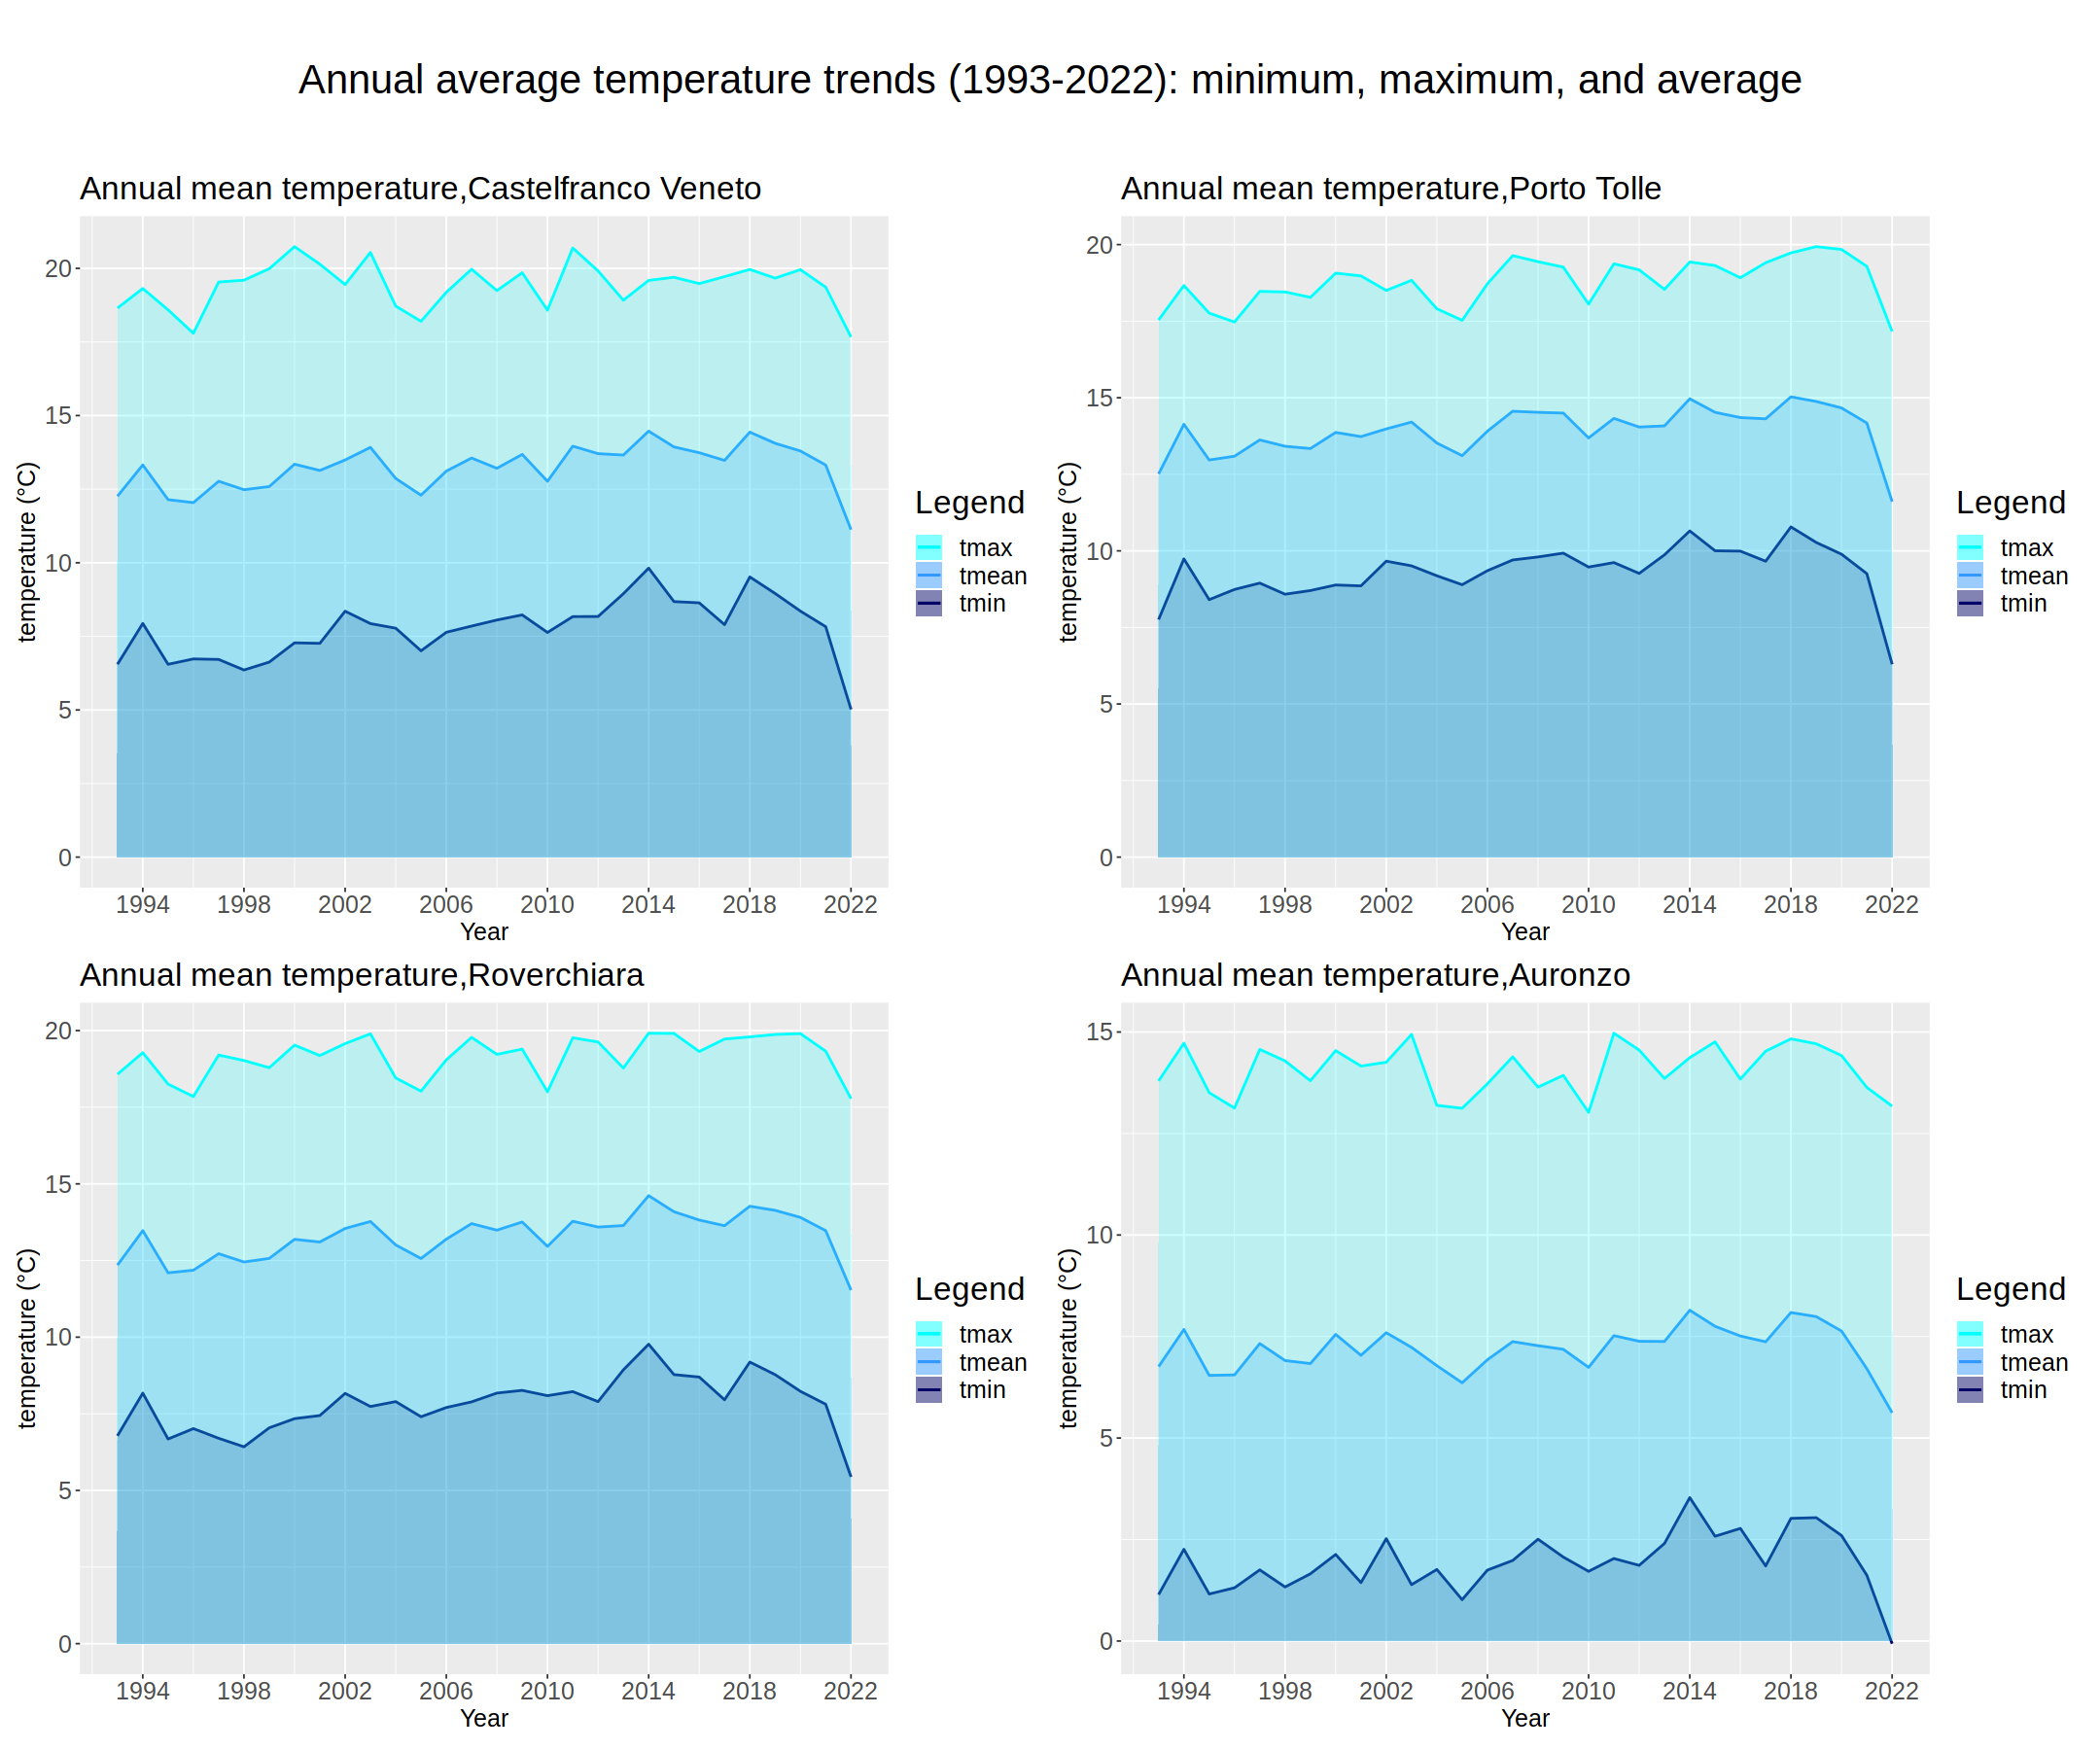

In [248]:
cities <- c("C", "P", "R", "A")  # Names of the cities
cities_complete <- c( 'C' = 'Castelfranco Veneto','P' = 'Porto Tolle',
                      'R' = 'Roverchiara','A' = 'Auronzo')

# list to store the plots 
plots <- list()

# for loop over the cities
for (city in cities) {
    
city_plot <- ggplot(get(paste0(city, "_medio_annuale")), aes(x = year)) +
    geom_line(aes(y = tmin_annual_avg, color = "tmin"), linewidth = 0.8) +
    geom_line(aes(y = tmean_annual_avg, color = "tmean"), linewidth = 0.8) +
    geom_line(aes(y = tmax_annual_avg, color = "tmax"), linewidth = 0.8) +
    geom_area(aes(y = tmin_annual_avg, fill = "tmin"), alpha = 0.2) +
    geom_area(aes(y = tmean_annual_avg, fill = "tmean"), alpha = 0.2) +
    geom_area(aes(y = tmax_annual_avg, fill = "tmax"), alpha = 0.2) +
    scale_fill_manual(values = c("tmin" = "#000066", "tmax" = "cyan",
                                 "tmean" = "#3399FF"), name = "Legend ") +
    scale_color_manual(values = c("tmin" = "#000066", "tmax" = "cyan",
                                 "tmean" = "#3399FF"), name = "Legend ") +
    scale_x_continuous(breaks = seq(1990, 2022, by = 4)) +
    labs(x = "Year", y = "temperature (°C)", title = paste0('Annual mean temperature,',cities_complete[[city]])) +
    theme(
      axis.text.x = element_text(size = 15),
      axis.text.y = element_text(size = 15),
      plot.title = element_text(size = 20),
      axis.title.x = element_text(size = 15),
      axis.title.y = element_text(size = 15),
      legend.position = "right",              # This places the legend inside the plot
      legend.title = element_text(size = 20),
      legend.text = element_text(size = 15),
      legend.key = element_rect(fill = "white", color = "white") # Adjust legend background color
    )
  # add the plot to the list
  plots[[city]] <- city_plot
}

# put the plot in a grid
combined_plots <- wrap_plots(plots, ncol = 2)
title <- ggdraw() + draw_label("Annual average temperature trends (1993-2022): minimum, maximum, and average", fontface = "plain", 
                               x = 0.5, hjust = 0.5, size = 25)

# Show final plot
options(repr.plot.width = 18, repr.plot.height = 15)
final_plot <- plot_grid(title, combined_plots, ncol = 1, rel_heights = c(0.1, 1))
final_plot
ggsave("0_combined_plot_2.png", combined_plots, width = 18, height = 10, dpi = 300)

### 0.3 - Average anomalies from 1993 to 2022

To complete the preliminary data analysis, it is interesting to plot the anomaly in the average temperature compared to the mean of the period 1993-2022 for each of the four cities under consideration. This is interesting because it offers a comprehensive view of how temperature dynamics vary across these diverse locations through years.
Notice that to analyze the state and trend of the indicator, increases are considered negative, and decreases are considered positive. 

Below, a dataframe is created for each city containing the year, as well as the annual minimum, maximum, and average temperatures averaged across all months of the year. To visualize the average temperature anomalies graphically, the obtained values are subtracted from the mean temperature over the range of years spanning from 1993 to 2022.

In [5]:
compute_anomalies <- function(data) {
    result <- data %>%
    mutate(across(starts_with("t"), ~ . - mean(.))) %>% #subtract the mean
    slice(1:(n() - 1))                                  #remove last (incomplete row)
  
  return(result)
}

# Assuming you have a data frame named C_medio_annuale
C_annual_averages_var <- compute_anomalies(C_medio_annuale)
A_annual_averages_var <- compute_anomalies(A_medio_annuale)
P_annual_averages_var <- compute_anomalies(P_medio_annuale)
R_annual_averages_var <- compute_anomalies(R_medio_annuale)

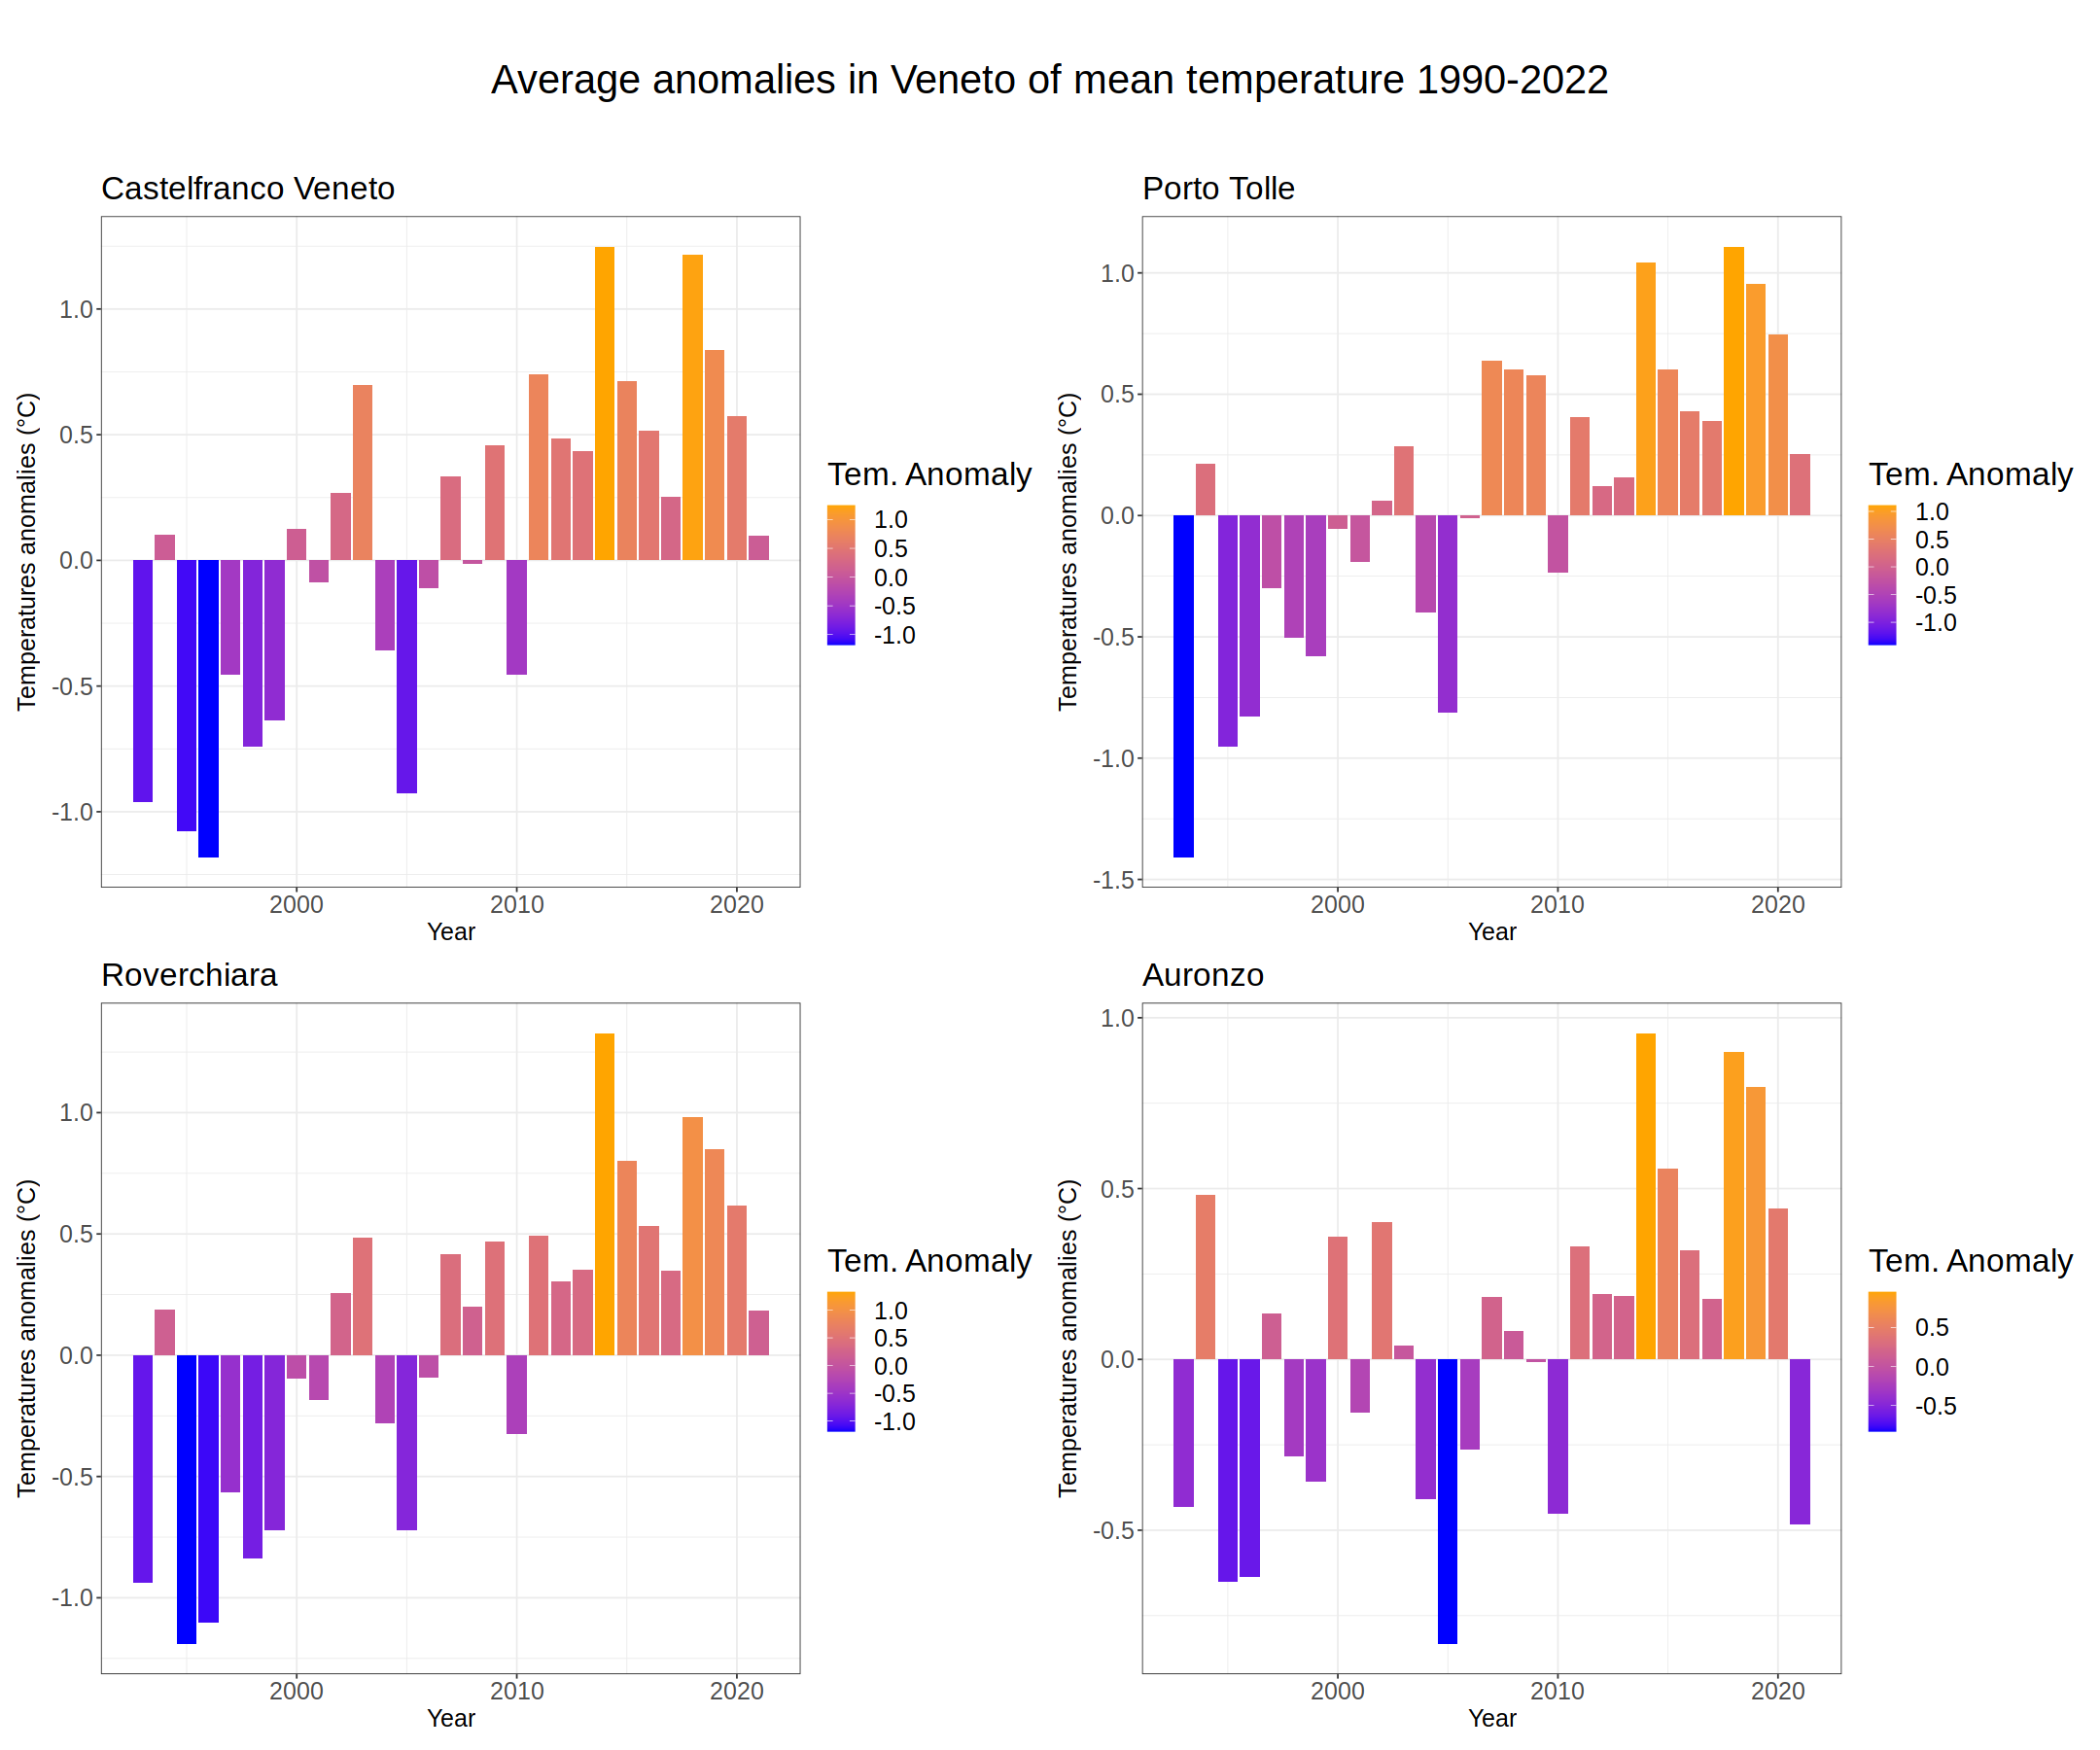

In [48]:
cities <- c("C", "P", "R", "A")  # Names of the cities
cities_complete <- c( 'C' = 'Castelfranco Veneto','P' = 'Porto Tolle',
                      'R' = 'Roverchiara','A' = 'Auronzo')

# list to store the plots 
plots <- list()

# for loop over the cities
for (city in cities) {
    
city_plot <-ggplot(data = get(paste0(city, "_annual_averages_var")), aes(x = year, y = tmean_annual_avg, fill = tmean_annual_avg)) + 
    geom_bar(stat = "identity") +
    scale_fill_gradient(low = "blue", high = "orange") +
    theme_bw() +
    labs(x = "Year", y = "Temperatures anomalies (°C)", title = paste0(cities_complete[[city]])) +
    labs(fill = "Tem. Anomaly") +  # Set the legend title for scale_fill_gradient
    theme( axis.text.x = element_text(size = 15),
    axis.text.y = element_text(size = 15),
    plot.title = element_text(size = 20),
    axis.title.x = element_text(size = 15),
    axis.title.y = element_text(size = 15),
    legend.position = "right", 
    legend.title = element_text(size = 20),
    legend.text = element_text(size = 15)) 

  # add the plot to the list
  plots[[city]] <- city_plot
}

# put the plot in a grid
combined_plots <- wrap_plots(plots, ncol = 2)
title <- ggdraw() + draw_label("Average anomalies in Veneto of mean temperature 1990-2022", fontface = "plain", 
                               x = 0.5, hjust = 0.5, size = 25)

# Show final plot
options(repr.plot.width = 18, repr.plot.height = 15)
final_plot <- plot_grid(title, combined_plots, ncol = 1, rel_heights = c(0.1, 1))
final_plot
#ggsave("0_anomalies_plot_2.png", combined_plots, width = 18, height = 10, dpi = 300)

## 1 - Analyzing Changes in Annual Average Temperatures (1993 - 2021)

In this section the trend of the annual averages is studied and compared with a constant value and a rising (linear) trend.

### 1.1 - Examine Trend Patterns

We investigate the trend exhibited by the annual averages and we juxtapose them with a constant value or an ascending trend. By scrutinizing whether the observed averages align with a constant baseline or exhibit a discernible upward trajectory, such as a linear trend, one can gain insights into the underlying patterns driving temperature fluctuations over time.

In [6]:
#remove last, inclomplete, row
C_medio_annuale <- C_medio_annuale[-nrow(C_medio_annuale), ] 
A_medio_annuale <- A_medio_annuale[-nrow(A_medio_annuale), ] 
P_medio_annuale <- P_medio_annuale[-nrow(P_medio_annuale), ] 
R_medio_annuale <- R_medio_annuale[-nrow(R_medio_annuale), ] 

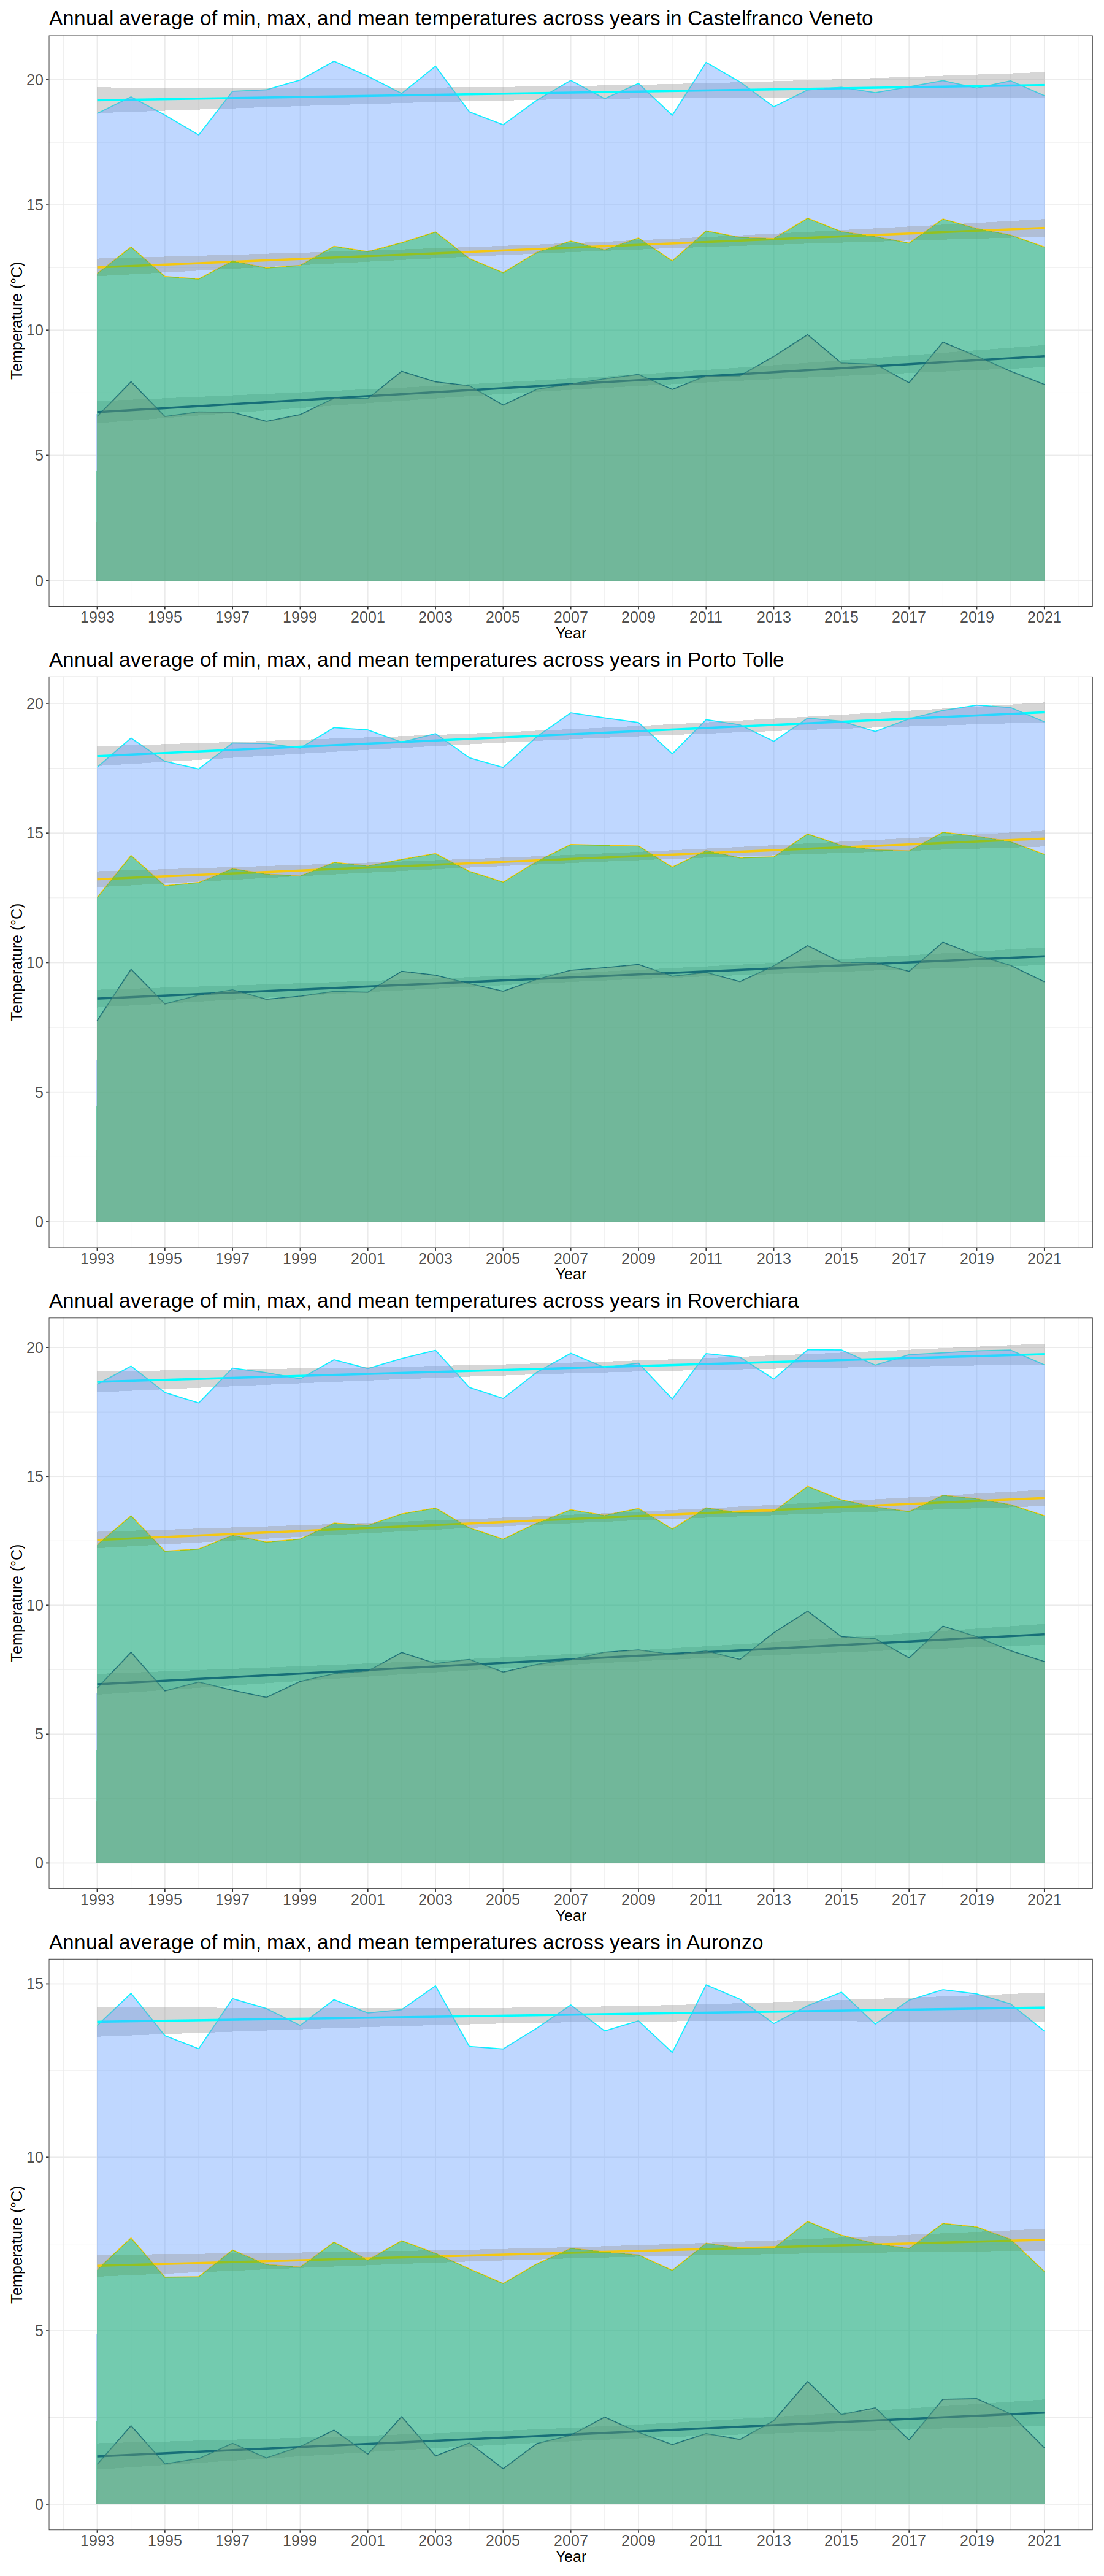

In [252]:
cities <- c("C", "P", "R", "A")  # Names of the cities
cities_complete <- c( 'C' = 'Castelfranco Veneto','P' = 'Porto Tolle',
                      'R' = 'Roverchiara','A' = 'Auronzo')

# list to store the plots 
plots <- list()

# for loop over the cities
for (city in cities) {
    
  # Reconstruct the file names for each city
  dataset <- get(paste0(city, "_medio_annuale"))

  # Do the current city plot 
city_plot <- ggplot(dataset, aes(x = year)) +
          geom_line(aes(y = tmin_annual_avg), color = "#000066") +
          geom_smooth(aes(y = tmin_annual_avg), method = 'lm',formula = y ~ x, color = "#000066") +
          geom_area(aes(y = tmin_annual_avg, fill = "#000066"), alpha = 0.4) +
          geom_line(aes(y = tmax_annual_avg), color = "cyan") +
          geom_smooth(aes(y = tmax_annual_avg), method = 'lm', formula = y ~ x, color = "cyan") +
          geom_area(aes(y = tmax_annual_avg, fill = "cyan"), alpha = 0.4) +
          geom_line(aes(y = tmean_annual_avg), color = "3399FF") +
          geom_smooth(aes(y = tmean_annual_avg), method = 'lm',formula = y ~ x, color = "3399FF") +
          geom_area(aes(y = tmean_annual_avg, fill = "3399FF"), alpha = 0.4) +
          theme_bw() +
          labs(x = "Year", y = "Temperature (°C)", title = paste("Annual average of min, max, and mean temperatures across years in",cities_complete[city])) +
          guides(fill = 'none') +
          theme(
              axis.text.x = element_text(size = 15),
              axis.text.y = element_text(size = 15),
              plot.title = element_text(size = 20),
              axis.title.x = element_text(size = 15),
              axis.title.y = element_text(size = 15),
              legend.position = "right", # This places the legend inside the plot
              legend.title = element_text(size = 20),
              legend.text = element_text(size = 15),
              legend.key = element_rect(fill = "white", color = "white") # Adjust legend background color
          ) +
          scale_x_continuous(breaks = seq(1993, 2022, by = 2))
  
  # add the plot to the list
  plots[[city]] <- city_plot
}

# put the plot in a grid
final_plot <- wrap_plots(plots, ncol = 1)

# Show final plot
options(repr.plot.width = 15, repr.plot.height = 35)
final_plot


### 1.2 - Bayesian Linear Regression with STAN

A comprehensive analysis can be initiated by utilizing Bayesian linear regression techniques through STAN. This software tool offers the opportunity to explore intricate relationships between variables, taking into consideration uncertainties. 

After the Stan model and the parameters to be used have been defined we fit the data to the model $y = \alpha + \beta  x$ and get the final parameters.

In [146]:
library(rstan) #linear and constant regression 

#### Castelfranco Veneto

In [147]:
modelString_Cmin = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal( -100, 20);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.05, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Cmean = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model { 
  a ~ normal( -60, 20);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.03, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Cmax = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal(3.6, 15);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.008, 0.010);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

N = length(C_medio_annuale$tmin_annual_avg)
x = C_medio_annuale$year

y_min <- C_medio_annuale$tmin_annual_avg
y_max <- C_medio_annuale$tmax_annual_avg
y_mean <- C_medio_annuale$tmean_annual_avg
modelStrings <- c(modelString_Cmin,modelString_Cmax,modelString_Cmean)
results_listC <- list() # results

j<-1
for (i in list(y_min,y_max, y_mean)){
    dataList <- list(y = i , N = N, x = x)
    modelString <- modelStrings[j]
    stanDso <- stan_model(model_code = modelString)
    stanFit <- sampling(object = stanDso,
                    data = dataList,
                    chains = 3,
                    iter = 1000,
                    warmup = 200, 
                    thin = 1,
                    control = list(max_treedepth = 20))
    #save the results
    results_listC[[j]] <- stanFit
    j <- j+1
}


SAMPLING FOR MODEL 'f9fcc21ad7da516152f545154c5e26b1' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 9e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 11.6298 seconds (Warm-up)
Chain 1:                0.777947 seconds (Sampling)
Chain 1:

In [148]:
summary(results_listC[[1]])[1] 

$summary
               mean      se_mean           sd          2.5%           25%
a     -107.50366973 0.4865906491 12.456192062 -132.92194704 -115.64058636
b        0.05747268 0.0002425814  0.006207744    0.04587241    0.05314889
sigma    0.64250619 0.0034123956  0.091413571    0.49395992    0.57727340
lp__    -2.06651051 0.0416334210  1.156452699   -5.04416607   -2.62759974
                50%          75%        97.5%    n_eff      Rhat
a     -107.31898204 -98.83485728 -84.22887194 655.3044 0.9992284
b        0.05737527   0.06151722   0.07017472 654.8663 0.9992383
sigma    0.63136588   0.69875915   0.85236974 717.6334 1.0079507
lp__    -1.80135658  -1.18990613  -0.70226786 771.5633 1.0044642

In [149]:
summary(results_listC[[2]])[1]  

$summary
              mean      se_mean           sd          2.5%          25%
a      0.626624130 0.4724814698 11.338602637 -21.113400739 -7.316966654
b      0.009396649 0.0002356213  0.005651988  -0.001876328  0.005542137
sigma  0.720943468 0.0035410909  0.100649454   0.552287288  0.644916840
lp__  -5.132209712 0.0456715860  1.207722525  -8.246680746 -5.691248335
              50%         75%       97.5%    n_eff     Rhat
a      0.62352823  8.36272134 23.15877183 575.9032 1.002188
b      0.00944357  0.01333003  0.02024086 575.4045 1.002190
sigma  0.71641588  0.78858459  0.93550046 807.8834 1.001441
lp__  -4.80690352 -4.22596330 -3.70981562 699.2656 1.000124

In [150]:
summary(results_listC[[3]])[1] 

$summary
              mean      se_mean           sd         2.5%          25%
a     -66.54922504 0.4153467886 12.195240386 -90.36937896 -74.20752782
b       0.03978362 0.0002069405  0.006076279   0.02665441   0.03617797
sigma   0.51339906 0.0032785570  0.074463726   0.38783692   0.46291782
lp__    4.10096985 0.0542210926  1.324230253   0.65492167   3.50754093
              50%          75%        97.5%    n_eff     Rhat
a     -66.7759373 -59.25895244 -40.16239196 862.1027 1.002821
b       0.0398986   0.04361759   0.05166254 862.1535 1.002827
sigma   0.5035642   0.55691621   0.67580120 515.8507 1.008932
lp__    4.4476187   5.08698165   5.59459059 596.4726 1.005104

#### Auronzo

In [253]:
modelString_Amin = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal( -91, 20);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.05, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Amean = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model { 
  a ~ normal( -60, 20);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.03, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Amax = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal(-31, 15);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.022, 0.010);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

N = length(A_medio_annuale$tmin_annual_avg)
x = A_medio_annuale$year

y_min <- A_medio_annuale$tmin_annual_avg
y_max <- A_medio_annuale$tmax_annual_avg
y_mean <- A_medio_annuale$tmean_annual_avg
modelStrings <- c(modelString_Amin,modelString_Amax,modelString_Amean)
results_listA <- list() # results

j<-1
for (i in list(y_min,y_max, y_mean)){
    dataList <- list(y = i , N = N, x = x)
    modelString <- modelStrings[j]
    stanDso <- stan_model(model_code = modelString)
    stanFit <- sampling(object = stanDso,
                    data = dataList,
                    chains = 3,
                    iter = 1000,
                    warmup = 200, 
                    thin = 1,
                    control = list(max_treedepth = 20))
    #save the results
    results_listA[[j]] <- stanFit
    j <- j+1
}


SAMPLING FOR MODEL '639aa8a3f7cabd05d1ae072c00c11ddb' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 6e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 11.2884 seconds (Warm-up)
Chain 1:                0.634006 seconds (Sampling)
Chain 1:

In [254]:
summary(results_listA[[1]])[1] 

$summary
              mean      se_mean          sd          2.5%           25%
a     -93.35918633 0.5721978230 12.16235336 -117.97106797 -101.51043407
b       0.04751865 0.0002850834  0.00605870    0.03582222    0.04339751
sigma   0.52675875 0.0023954581  0.07334737    0.41034390    0.47610506
lp__    3.80545045 0.0636144683  1.27144575    0.27846910    3.30956357
               50%          75%        97.5%    n_eff     Rhat
a     -93.70009576 -85.12198828 -69.89528289 451.7965 1.005340
b       0.04769264   0.05157795   0.05973009 451.6634 1.005351
sigma   0.51872820   0.56810198   0.69591835 937.5445 1.006890
lp__    4.13933523   4.71805923   5.21891243 399.4697 1.012242

In [255]:
summary(results_listA[[2]])[1] 

$summary
              mean      se_mean           sd          2.5%          25%
a     -27.65539767 0.3821276722 10.887273120 -47.857375691 -34.94897416
b       0.02080976 0.0001904949  0.005425101   0.009963312   0.01725318
sigma   0.59776950 0.0031506021  0.081037283   0.464918801   0.53982976
lp__    0.19959307 0.0465835512  1.218115273  -2.883017954  -0.40269879
               50%          75%       97.5%    n_eff      Rhat
a     -27.58740686 -20.54213294 -5.79675388 811.7481 0.9998923
b       0.02075129   0.02443294  0.03089131 811.0527 0.9999132
sigma   0.58549912   0.64708367  0.77694872 661.5804 0.9995918
lp__    0.51618111   1.09377208  1.59079803 683.7724 0.9999766

In [256]:
summary(results_listA[[3]])[1] 

$summary
              mean      se_mean           sd         2.5%          25%
a     -53.16864675 0.3995164869 10.980101938 -75.59175460 -60.94115037
b       0.03010389 0.0001989169  0.005470127   0.01933492   0.02652195
sigma   0.44154497 0.0024448319  0.063973186   0.33968529   0.39327014
lp__    8.96522412 0.0452660922  1.208965219   5.92117038   8.41042571
               50%          75%        97.5%    n_eff      Rhat
a     -52.95810701 -45.97178811 -31.57416293 755.3415 0.9996751
b       0.02999422   0.03395481   0.04130741 756.2258 0.9996736
sigma   0.43575721   0.47512332   0.58658928 684.6963 1.0027750
lp__    9.28097195   9.83041848  10.34566428 713.3154 1.0018613

#### Porto Tolle

In [164]:
modelString_Pmin = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal( -87, 20);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.05, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Pmean = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model { 
  a ~ normal( -87, 20);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.05, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Pmax = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal(-96, 15);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.06, 0.010);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

N = length(P_medio_annuale$tmin_annual_avg)
x = P_medio_annuale$year

y_min <- P_medio_annuale$tmin_annual_avg
y_max <- P_medio_annuale$tmax_annual_avg
y_mean <- P_medio_annuale$tmean_annual_avg
modelStrings <- c(modelString_Pmin,modelString_Pmax,modelString_Pmean)
results_listP <- list() # results

j<-1
for (i in list(y_min,y_max, y_mean)){
    dataList <- list(y = i , N = N, x = x)
    modelString <- modelStrings[j]
    stanDso <- stan_model(model_code = modelString)
    stanFit <- sampling(object = stanDso,
                    data = dataList,
                    chains = 3,
                    iter = 1000,
                    warmup = 200, 
                    thin = 10,
                    control = list(max_treedepth = 20))
    #save the results
    results_listP[[j]] <- stanFit
    j <- j+1
}


SAMPLING FOR MODEL '7ac08eef0b428f82e7a72d4b1934959f' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 7e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 5.84338 seconds (Warm-up)
Chain 1:                0.81454 seconds (Sampling)
Chain 1: 

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”



SAMPLING FOR MODEL 'a3aedc7a77555dfeef0a42db67c18010' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 6e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 3.70841 seconds (Warm-up)
Chain 1:                0.623483 seconds (Sampling)
Chain 1:

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”



SAMPLING FOR MODEL '3d58ee5b5e22eedabf33e6aae0c29556' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 7e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 13.7486 seconds (Warm-up)
Chain 1:                0.832314 seconds (Sampling)
Chain 1:

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”


In [169]:
summary(results_listP[[1]])[1]  

$summary
              mean      se_mean           sd          2.5%           25%
a     -93.67599492 0.9726519775 11.675694353 -115.90809212 -101.66848178
b       0.05136882 0.0004846736  0.005818885    0.04113233    0.04770248
sigma   0.48276144 0.0042253949  0.071399777    0.36203225    0.43508625
lp__    6.31997190 0.0923333830  1.306263782    2.88570343    5.72162488
               50%          75%        97.5%    n_eff      Rhat
a     -93.03046911 -86.21656025 -73.21904932 144.0955 1.0206312
b       0.05107988   0.05532511   0.06247108 144.1387 1.0205585
sigma   0.47931216   0.52583776   0.62657875 285.5348 0.9915082
lp__    6.61901697   7.39278221   7.79092841 200.1448 0.9931497

In [170]:
summary(results_listP[[2]])[1]  

$summary
              mean      se_mean           sd          2.5%           25%
a     -99.26293973 0.7715759299 10.329686954 -120.49960005 -105.95456257
b       0.05883423 0.0003851641  0.005147999    0.04810848    0.05549599
sigma   0.52463150 0.0042594445  0.071840476    0.41737412    0.47231274
lp__    3.73092996 0.0798145043  1.185127162    0.71561454    3.21252575
               50%          75%        97.5%    n_eff      Rhat
a     -99.46657448 -92.58566860 -77.69000659 179.2326 0.9970465
b       0.05894155   0.06218026   0.06937618 178.6427 0.9971138
sigma   0.51716007   0.56551407   0.68708376 284.4674 0.9901173
lp__    4.00905994   4.60961846   5.04565268 220.4785 1.0123337

In [171]:
summary(results_listP[[3]])[1] 

$summary
             mean      se_mean           sd          2.5%          25%
a     -90.3021428 0.6857736263 11.275225368 -111.20856686 -98.39504749
b       0.0519649 0.0003416813  0.005619041    0.03955592   0.04795866
sigma   0.4345236 0.0039099034  0.063613948    0.33758096   0.39024187
lp__    9.5857610 0.0917636631  1.400738865    6.17098900   9.13202592
               50%          75%        97.5%    n_eff      Rhat
a     -90.71529070 -82.23860871 -65.39604862 270.3267 0.9934321
b       0.05216205   0.05599476   0.06240226 270.4469 0.9933537
sigma   0.42362911   0.47059063   0.58190394 264.7114 0.9960823
lp__   10.04217037  10.50376862  11.00135986 233.0091 0.9999651

#### Roverchiara

In [168]:
modelString_Rmin = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal( -70, 20);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.04, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Rmean = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model { 
  a ~ normal( -48, 20);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.03, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Rmax = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal(-5, 15);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.01, 0.010);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

N = length(R_medio_annuale$tmin_annual_avg)
x = R_medio_annuale$year

y_min <- R_medio_annuale$tmin_annual_avg
y_max <- R_medio_annuale$tmax_annual_avg
y_mean <- R_medio_annuale$tmean_annual_avg
modelStrings <- c(modelString_Rmin,modelString_Rmax,modelString_Rmean)
results_listR <- list() # results

j<-1
for (i in list(y_min,y_max, y_mean)){
    dataList <- list(y = i , N = N, x = x)
    modelString <- modelStrings[j]
    stanDso <- stan_model(model_code = modelString)
    stanFit <- sampling(object = stanDso,
                    data = dataList,
                    chains = 3,
                    iter = 1000,
                    warmup = 200, 
                    thin = 10,
                    control = list(max_treedepth = 20))
    #save the results
    results_listR[[j]] <- stanFit
    j <- j+1
}


SAMPLING FOR MODEL 'fcf7454aaeb7dad287028ec661a79f46' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 8e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 11.9513 seconds (Warm-up)
Chain 1:                0.432802 seconds (Sampling)
Chain 1:

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”



SAMPLING FOR MODEL '82bdaaf2496e4fbee357078e922f1ac6' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 8e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 8.29333 seconds (Warm-up)
Chain 1:                0.529361 seconds (Sampling)
Chain 1:

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”



SAMPLING FOR MODEL '714e1371dd5aab5f6719056efd4eef81' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 8e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 20.3175 seconds (Warm-up)
Chain 1:                0.901178 seconds (Sampling)
Chain 1:

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”


In [172]:
summary(results_listR[[1]])[1] 

$summary
              mean      se_mean           sd          2.5%          25%
a     -87.58582653 0.8909027481 13.270607376 -111.30124264 -95.84696773
b       0.04756598 0.0004440529  0.006607231    0.03468823   0.04319178
sigma   0.57528927 0.0066159237  0.096829990    0.43884579   0.50483411
lp__    0.12759916 0.0899066618  1.419916520   -4.08326610  -0.26776252
               50%          75%        97.5%    n_eff      Rhat
a     -87.95452966 -78.85572989 -61.65331733 221.8815 1.0034611
b       0.04779935   0.05169513   0.05930333 221.3959 1.0036479
sigma   0.56646301   0.63915124   0.75069855 214.2095 0.9970207
lp__    0.39682290   1.10698551   1.57391656 249.4261 0.9967466

In [173]:
summary(results_listR[[2]])[1] 

$summary
              mean      se_mean           sd          2.5%          25%
a     -12.69251751 0.6267778808 10.845793848 -34.678005830 -19.96545490
b       0.01589362 0.0003124894  0.005406277   0.005062721   0.01266168
sigma   0.61263999 0.0060739184  0.091790940   0.461261442   0.54842772
lp__   -0.75604948 0.0709570819  1.082741105  -3.193596661  -1.39861339
               50%         75%      97.5%    n_eff      Rhat
a     -12.23271740 -6.11175580 9.03032881 299.4300 0.9981199
b       0.01564881  0.01952134 0.02681859 299.3133 0.9980802
sigma   0.60647672  0.66868824 0.81831245 228.3819 1.0044874
lp__   -0.50127564  0.09220863 0.55454746 232.8401 1.0028514

In [174]:
summary(results_listR[[3]])[1] 

$summary
              mean      se_mean           sd         2.5%          25%
a     -66.85054626 0.9160384107 13.156702572 -91.70663484 -75.57072188
b       0.03995416 0.0004563474  0.006552064   0.02615305   0.03563162
sigma   0.46430500 0.0046130466  0.070797965   0.35896284   0.41777707
lp__    6.06386861 0.0884780173  1.269058110   2.51139766   5.66874441
               50%          75%        97.5%    n_eff      Rhat
a     -66.78387747 -58.20811988 -39.08758442 206.2846 0.9976451
b       0.03991744   0.04427858   0.05232762 206.1413 0.9976241
sigma   0.45122043   0.50449366   0.63313409 235.5407 0.9915096
lp__    6.40409881   6.90071846   7.42388792 205.7275 0.9971146

In [ ]:
# fit linear model
lm_min_A <- lm(tmin_annual_avg ~ year, data = R_medio_annuale)
lm_max_A <- lm(tmax_annual_avg ~ year, data = R_medio_annuale)
lm_mean_A <- lm(tmean_annual_avg ~ year, data = R_medio_annuale)
lm_min_A
lm_mean_A
lm_max_A

### 1.3  - Bayesian constant Regression with STAN

The investigation about temperature trend is extended by conducting a parallel analysis using a constant regression model. This involves exploring the scenario where temperature fluctuations are presumed to be consistently aligned with a fixed baseline value, devoid of any noticeable trends or fluctuations. By juxtaposing this constant regression approach with the previously explored model, one can gauge the validity and significance of any identified trends or deviations, shedding light on the most accurate representation of the temperature dynamics.

#### Castelfranco Veneto

In [182]:
#constant regression 

modelString = "
data {
  int<lower=0> N;      // Number of data points
  vector[N] X;         // predictor
  vector[N] y;         // outcome
}

parameters {
  real alpha;          // intercept
  real<lower=0> sigma; // error standard deviation
}

model {
  y ~ normal(alpha, sigma);  // Likelihood: normal distribution for the response variable with constant regression
}"

# Lista di gruppi di dati (organizzati in base alle tue esigenze)
N = length(C_medio_annuale$tmin_annual_avg)
data_groups <- list(group1 = list(y = C_medio_annuale$tmin_annual_avg, X = C_medio_annuale$year),
                    group2 = list(y = C_medio_annuale$tmax_annual_avg, X = C_medio_annuale$year),
                    group3 = list(y = C_medio_annuale$tmean_annual_avg, X = C_medio_annuale$year))

# Lista per memorizzare i risultati
results_list <- list()

# Loop attraverso i gruppi di dati
for (group_name in names(data_groups)) {
  stanDso <- stan_model(model_code = modelString)
  stanFit <- sampling(object = stanDso,
                      data = data_groups[[group_name]],
                      chains = 4,
                      iter = 10000,
                      warmup = 200,
                      thin = 1,
                      control = list(max_treedepth = 15))
  
  results_list[[group_name]] <- stanFit
}


SAMPLING FOR MODEL '50e5253e9a1a6755d8cedab1bcc4d25e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration:  201 / 10000 [  2%]  (Sampling)
Chain 1: Iteration: 1200 / 10000 [ 12%]  (Sampling)
Chain 1: Iteration: 2200 / 10000 [ 22%]  (Sampling)
Chain 1: Iteration: 3200 / 10000 [ 32%]  (Sampling)
Chain 1: Iteration: 4200 / 10000 [ 42%]  (Sampling)
Chain 1: Iteration: 5200 / 10000 [ 52%]  (Sampling)
Chain 1: Iteration: 6200 / 10000 [ 62%]  (Sampling)
Chain 1: Iteration: 7200 / 10000 [ 72%]  (Sampling)
Chain 1: Iteration: 8200 / 10000 [ 82%]  (Sampling)
Chain 1: Iteration: 9200 / 10000 [ 92%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.001624 seconds (Warm-up)
Chain 1:                0.06395

In [183]:
summary(results_list$group1)$summary

mean        se_mean      sd        2.5%       25%         50%        
alpha   7.8398535 0.0010647967 0.1737624   7.495379   7.7258608   7.8403751
sigma   0.9368846 0.0008710628 0.1333065   0.719255   0.8429111   0.9221631
lp__  -11.9148373 0.0080117331 1.0205726 -14.644577 -12.3141960 -11.5958827
      75%        97.5%      n_eff    Rhat     
alpha   7.955398   8.177035 26630.43 1.0000229
sigma   1.014001   1.242710 23420.91 1.0000254
lp__  -11.185416 -10.917046 16226.87 0.9999741

In [184]:
summary(results_list$group2)$summary

mean       se_mean      sd        2.5%       25%        50%       
alpha 19.4842230 0.0008141686 0.1367573 19.2136399 19.3944089 19.4841877
sigma  0.7379564 0.0006293952 0.1033494  0.5686521  0.6647502  0.7266134
lp__  -5.2203061 0.0078069434 1.0025556 -7.9069703 -5.6213971 -4.9106385
      75%        97.5%      n_eff    Rhat    
alpha 19.5741296 19.7552317 28214.50 1.000090
sigma  0.7986067  0.9715517 26963.04 1.000017
lp__  -4.5045041 -4.2312327 16491.30 1.000188

In [185]:
summary(results_list$group3)$summary

mean       se_mean      sd         2.5%       25%        50%       
alpha 13.2951556 0.0008106114 0.13105127 13.0361319 13.2083315 13.2956366
sigma  0.7001502 0.0006889736 0.09988584  0.5368164  0.6293795  0.6885143
lp__  -3.7377617 0.0082965086 1.03953370 -6.5680641 -4.1347560 -3.4138288
      75%        97.5%      n_eff    Rhat    
alpha 13.3816325 13.5526507 26137.08 1.000030
sigma  0.7583593  0.9273782 21018.55 1.000155
lp__  -2.9957523 -2.7238044 15699.52 1.000073

#### Auronzo

In [186]:
#constant regression 

modelString = "
data {
  int<lower=0> N;      // Number of data points
  vector[N] X;         // predictor
  vector[N] y;         // outcome
}

parameters {
  real alpha;          // intercept
  real<lower=0> sigma; // error standard deviation
}

model {
  y ~ normal(alpha, sigma);  // Likelihood: normal distribution for the response variable with constant regression
}"

# Lista di gruppi di dati (organizzati in base alle tue esigenze)
N = length(A_medio_annuale$tmin_annual_avg)
data_groups <- list(group1 = list(y = A_medio_annuale$tmin_annual_avg, X = A_medio_annuale$year),
                    group2 = list(y = A_medio_annuale$tmax_annual_avg, X = A_medio_annuale$year),
                    group3 = list(y = A_medio_annuale$tmean_annual_avg, X = A_medio_annuale$year))

# Lista per memorizzare i risultati
results_listA <- list()

# Loop attraverso i gruppi di dati
for (group_name in names(data_groups)) {
  stanDso <- stan_model(model_code = modelString)
  stanFit <- sampling(object = stanDso,
                      data = data_groups[[group_name]],
                      chains = 4,
                      iter = 10000,
                      warmup = 200,
                      thin = 1,
                      control = list(max_treedepth = 15))
  
  results_listA[[group_name]] <- stanFit
}


SAMPLING FOR MODEL '50e5253e9a1a6755d8cedab1bcc4d25e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration:  201 / 10000 [  2%]  (Sampling)
Chain 1: Iteration: 1200 / 10000 [ 12%]  (Sampling)
Chain 1: Iteration: 2200 / 10000 [ 22%]  (Sampling)
Chain 1: Iteration: 3200 / 10000 [ 32%]  (Sampling)
Chain 1: Iteration: 4200 / 10000 [ 42%]  (Sampling)
Chain 1: Iteration: 5200 / 10000 [ 52%]  (Sampling)
Chain 1: Iteration: 6200 / 10000 [ 62%]  (Sampling)
Chain 1: Iteration: 7200 / 10000 [ 72%]  (Sampling)
Chain 1: Iteration: 8200 / 10000 [ 82%]  (Sampling)
Chain 1: Iteration: 9200 / 10000 [ 92%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.00105 seconds (Warm-up)
Chain 1:                0.049825

In [187]:
summary(results_listA$group1)$summary

mean       se_mean      sd        2.5%        25%        50%       
alpha  1.8222413 0.0007751061 0.1341239   1.5581899  1.7333552  1.8222854
sigma  0.7764039 0.0006933562 0.1004801   0.6098333  0.7054837  0.7660314
lp__  -7.8720264 0.0082021642 1.0302035 -10.6740515 -8.2653410 -7.5539118
      75%        97.5%     n_eff    Rhat     
alpha  1.9115156  2.085598 29942.64 1.0000950
sigma  0.8354683  1.002336 21001.35 0.9999632
lp__  -7.1407870 -6.872096 15775.72 1.0001654

In [188]:
summary(results_listA$group2)$summary

mean       se_mean      sd         2.5%       25%        50%       
alpha 14.0212634 0.0006518727 0.10453241 13.8137481 13.9521979 14.0216477
sigma  0.6088793 0.0005435749 0.07897149  0.4776927  0.5537062  0.6002091
lp__   0.1464695 0.0081568020 1.01901851 -2.5898382 -0.2506215  0.4592632
      75%        97.5%      n_eff    Rhat    
alpha 14.0915481 14.2254539 25714.39 1.000065
sigma  0.6552231  0.7876149 21106.78 0.999985
lp__   0.8722148  1.1410155 15607.18 1.000219

In [189]:
summary(results_listA$group3)$summary

mean       se_mean      sd         2.5%       25%        50%      
alpha 7.09427025 0.0007058717 0.10544434  6.8865661  7.0251995 7.0942438
sigma 0.61125934 0.0005128940 0.07924535  0.4800147  0.5550006 0.6031675
lp__  0.01624891 0.0081834946 1.01798396 -2.6947691 -0.3975549 0.3275578
      75%       97.5%     n_eff    Rhat    
alpha 7.1640378 7.3031319 22314.90 1.000077
sigma 0.6583657 0.7886625 23872.19 0.999991
lp__  0.7508531 1.0182252 15474.06 1.000071

#### Porto Tolle

In [190]:
#constant regression 

modelString = "
data {
  int<lower=0> N;      // Number of data points
  vector[N] X;         // predictor
  vector[N] y;         // outcome
}

parameters {
  real alpha;          // intercept
  real<lower=0> sigma; // error standard deviation
}

model {
  y ~ normal(alpha, sigma);  // Likelihood: normal distribution for the response variable with constant regression
}"

# Lista di gruppi di dati (organizzati in base alle tue esigenze)
N = length(P_medio_annuale$tmin_annual_avg)
data_groups <- list(group1 = list(y = P_medio_annuale$tmin_annual_avg, X = P_medio_annuale$year),
                    group2 = list(y = P_medio_annuale$tmax_annual_avg, X = P_medio_annuale$year),
                    group3 = list(y = P_medio_annuale$tmean_annual_avg, X = P_medio_annuale$year))

# Lista per memorizzare i risultati
results_listP <- list()

# Loop attraverso i gruppi di dati
for (group_name in names(data_groups)) {
  stanDso <- stan_model(model_code = modelString)
  stanFit <- sampling(object = stanDso,
                      data = data_groups[[group_name]],
                      chains = 4,
                      iter = 10000,
                      warmup = 200,
                      thin = 1,
                      control = list(max_treedepth = 15))
  
  results_listP[[group_name]] <- stanFit
}


SAMPLING FOR MODEL '50e5253e9a1a6755d8cedab1bcc4d25e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.04 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration:  201 / 10000 [  2%]  (Sampling)
Chain 1: Iteration: 1200 / 10000 [ 12%]  (Sampling)
Chain 1: Iteration: 2200 / 10000 [ 22%]  (Sampling)
Chain 1: Iteration: 3200 / 10000 [ 32%]  (Sampling)
Chain 1: Iteration: 4200 / 10000 [ 42%]  (Sampling)
Chain 1: Iteration: 5200 / 10000 [ 52%]  (Sampling)
Chain 1: Iteration: 6200 / 10000 [ 62%]  (Sampling)
Chain 1: Iteration: 7200 / 10000 [ 72%]  (Sampling)
Chain 1: Iteration: 8200 / 10000 [ 82%]  (Sampling)
Chain 1: Iteration: 9200 / 10000 [ 92%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.001081 seconds (Warm-up)
Chain 1:                0.04750

In [191]:
summary(results_listP$group1)$summary

mean       se_mean      sd         2.5%       25%       50%       
alpha  9.4281206 0.0008403980 0.13030568  9.1711210  9.342424  9.4281545
sigma  0.7027965 0.0005909357 0.09984962  0.5413077  0.631851  0.6910548
lp__  -3.8557466 0.0080204316 1.02066823 -6.5880878 -4.249583 -3.5443732
      75%        97.5%      n_eff    Rhat    
alpha  9.5133099  9.6852318 24041.23 1.000075
sigma  0.7613839  0.9306235 28550.41 1.000084
lp__  -3.1278666 -2.8626288 16194.73 1.000565

In [192]:
summary(results_listP$group2)$summary

mean      se_mean      sd        2.5%       25%        50%       
alpha 18.811954 0.0009705488 0.1426355 18.5321223 18.7174878 18.8122389
sigma  0.755341 0.0006397770 0.1082454  0.5791677  0.6779917  0.7436563
lp__  -5.851439 0.0082923162 1.0407928 -8.6612569 -6.2603216 -5.5336926
      75%        97.5%     n_eff    Rhat    
alpha 18.9062096 19.094437 21598.34 1.000043
sigma  0.8190969  1.002786 28626.08 1.000047
lp__  -5.1054444 -4.827226 15753.49 1.000071

In [193]:
summary(results_listP$group3)$summary

mean      se_mean      sd         2.5%      25%        50%       
alpha 14.001209 0.0006946434 0.12468407 13.753770 13.9201460 14.0013621
sigma  0.657124 0.0006699708 0.09412248  0.506457  0.5905704  0.6459109
lp__  -1.950021 0.0086215723 1.05723321 -4.790793 -2.3499234 -1.6277470
      75%        97.5%      n_eff    Rhat     
alpha 14.0829217 14.2477093 32217.97 0.9999387
sigma  0.7121405  0.8732060 19736.72 1.0000014
lp__  -1.2043064 -0.9272473 15037.26 1.0000108

#### Roverchiara

In [194]:
#constant regression 

modelString = "
data {
  int<lower=0> N;      // Number of data points
  vector[N] X;         // predictor
  vector[N] y;         // outcome
}

parameters {
  real alpha;          // intercept
  real<lower=0> sigma; // error standard deviation
}

model {
  y ~ normal(alpha, sigma);  // Likelihood: normal distribution for the response variable with constant regression
}"

# Lista di gruppi di dati (organizzati in base alle tue esigenze)
N = length(R_medio_annuale$tmin_annual_avg)
data_groups <- list(group1 = list(y = R_medio_annuale$tmin_annual_avg, X = R_medio_annuale$year),
                    group2 = list(y = R_medio_annuale$tmax_annual_avg, X = R_medio_annuale$year),
                    group3 = list(y = R_medio_annuale$tmean_annual_avg, X = R_medio_annuale$year))

# Lista per memorizzare i risultati
results_listR <- list()

# Loop attraverso i gruppi di dati
for (group_name in names(data_groups)) {
  stanDso <- stan_model(model_code = modelString)
  stanFit <- sampling(object = stanDso,
                      data = data_groups[[group_name]],
                      chains = 4,
                      iter = 10000,
                      warmup = 200,
                      thin = 1,
                      control = list(max_treedepth = 15))
  
  results_listR[[group_name]] <- stanFit
}


SAMPLING FOR MODEL '50e5253e9a1a6755d8cedab1bcc4d25e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration:  201 / 10000 [  2%]  (Sampling)
Chain 1: Iteration: 1200 / 10000 [ 12%]  (Sampling)
Chain 1: Iteration: 2200 / 10000 [ 22%]  (Sampling)
Chain 1: Iteration: 3200 / 10000 [ 32%]  (Sampling)
Chain 1: Iteration: 4200 / 10000 [ 42%]  (Sampling)
Chain 1: Iteration: 5200 / 10000 [ 52%]  (Sampling)
Chain 1: Iteration: 6200 / 10000 [ 62%]  (Sampling)
Chain 1: Iteration: 7200 / 10000 [ 72%]  (Sampling)
Chain 1: Iteration: 8200 / 10000 [ 82%]  (Sampling)
Chain 1: Iteration: 9200 / 10000 [ 92%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.001169 seconds (Warm-up)
Chain 1:                0.04735

In [195]:
summary(results_listR$group1)$summary

mean       se_mean      sd        2.5%        25%       50%       
alpha  7.9361112 0.0010503796 0.1615682   7.6176343  7.830753  7.9354942
sigma  0.8335624 0.0007432274 0.1233239   0.6345266  0.746140  0.8194023
lp__  -7.9862795 0.0080729399 1.0368404 -10.8114803 -8.381048 -7.6689062
      75%        97.5%     n_eff    Rhat     
alpha  8.0417069  8.257733 23660.25 0.9999964
sigma  0.9045802  1.115631 27532.83 0.9999759
lp__  -7.2500194 -6.980119 16495.31 1.0001555

In [196]:
summary(results_listR$group2)$summary

mean       se_mean      sd         2.5%       25%        50%       
alpha 19.2291289 0.0008425157 0.13092499 18.9708332 19.1431347 19.2289529
sigma  0.6723005 0.0005885605 0.09924888  0.5118554  0.6019688  0.6608784
lp__  -2.4175027 0.0083979195 1.04011259 -5.2216946 -2.8046876 -2.0964222
      75%        97.5%      n_eff    Rhat     
alpha 19.3150007 19.4885910 24148.44 1.0000823
sigma  0.7295377  0.8989917 28436.03 0.9999515
lp__  -1.6844297 -1.4105993 15339.71 1.0001347

In [197]:
summary(results_listR$group3)$summary

mean       se_mean      sd         2.5%       25%        50%      
alpha 13.3808110 0.0009425935 0.13023868 13.1233114 13.2953505 13.380437
sigma  0.6756851 0.0005807983 0.09908847  0.5143034  0.6063688  0.664423
lp__  -2.5449941 0.0080067571 1.01787083 -5.2709281 -2.9318016 -2.236187
      75%        97.5%      n_eff    Rhat     
alpha 13.4670011 13.6360180 19091.10 1.0000492
sigma  0.7329521  0.9028429 29106.87 0.9999388
lp__  -1.8211115 -1.5540396 16161.14 1.0001969

### 1.4 - Bayesian hypothesis test comparing the two results

#### 1.4.1 -  First test: Comparison of average temperature growth factors in different cities of Veneto.

An interesting test involves researching a correlation between the trends of the annual average temperature (minimum, maximum, and mean) in different cities of Veneto. This translates into comparing the different temperature growth factors, which indicate how much the temperature changes over a predetermined time interval.

For ease of comparison with the official data from the Sanpa report, we choose to consider the growth coefficient every 10 years for the average, maximum, and minimum temperatures. These data can be easily obtained from the linear fits conducted in the previous step, simply by multiplying the angular coefficient value by 10.

As regard the test, to see if there are correlations between data measured at different stations, a bayesian hypotesis test is performed in the following manner. Given two values of growth coefficients (along with their respective uncertainties) to compare them, and to determine if their trends are statistically significantly similar, one can consider the distribution of their posterior values (assumed Gaussian for simplicity). Then, proceed to calculate the posterior distribution of the difference, also Gaussian, with a mean and variance given by: 


$\mu_z = \mu_x - \mu_y$ 

$\sigma_z^2= \sigma_x^2 + \sigma_y^2$

where x and y represent the growth coefficient measured at 2 different stations and z represent the difference between the 2. 
The null hypotesis is $H_0: x-y=0$ meaning 'the growth coefficients are the same'. 

In [257]:
# growth coefficient = gc
# each entry refers to a city: C.V., Auronzo, P.T., Roverchiara

#data  --------- CV  ----- A ------ PT ------ R
gc_tmin <- c(0.5747268,0.4751865,0.5136882,0.4756598)  
gc_tmax <- c(0.09396649,0.2080976,0.5883423, 0.1589362)
gc_tmean <- c(0.3978362,0.3010389,0.519649, 0.3995416)
sd_tmin <- c(0.06207744,0.0605870,0.05818885,0.06607231)  
sd_tmax <- c(0.05651988,0.05425101,0.05147999,0.05406277)
sd_tmean <- c(0.06076279,0.05470127,0.05619041,0.06552064)


In [258]:
#bayesian hypotesis test function
test_growth_coeff <- function(x, y, show) {#x,y=city 1, city2
    a <- gc_tmean[x]
    b <- gc_tmean[y]
    c <- a-b
    error_a <- sd_tmin[x]
    error_b <- sd_tmin[y]
    error_c <- sqrt(error_a**2+error_b**2)

    f <- 100
    pdf_c <- dnorm(x = seq(c-10*error_c,c+10*error_c,0.0001), mean = c, sd = error_c)
    
    if (show==TRUE){
    plot(seq(c-10*error_c,c+10*error_c,0.0001), pdf_c,type = "l", lwd = 2, col = "blue", 
         ylab = "Probability Density",  main = "PDF of difference growth factor", 
         xlab = "RMSE", ylim=c(0,max(pdf_c)))
    }

    # Determine if 0 falls within the confidence interval
    confidence_interval <- qnorm(p =c(0.025,0.975) ,mean = c,sd =error_c )
    if (0 >= confidence_interval[1] && 0 <= confidence_interval[2]) {
      print("Cannot reject the null hypothesis")
    } else {
      print("Reject the null hypothesis")
    }
}


In [259]:
#perform the test for all combination of cities
test_growth_results <- data.frame(row.names = c('C.V.','A','P.T.','R'))

for (i in 1:4){
    for (j in 1:4){
        test <- test_growth_coeff(i,j,show=FALSE)
        if (test == 'Cannot reject the null hypothesis') {test_growth_results[i,j]<- as.integer(1)}
        else {test_growth_results[i,j]<- as.integer(0)}
    }
}
colnames(test_growth_results) <- c('C.V.','A','P.T.','R')


[1] "Cannot reject the null hypothesis"
[1] "Cannot reject the null hypothesis"
[1] "Cannot reject the null hypothesis"
[1] "Cannot reject the null hypothesis"
[1] "Cannot reject the null hypothesis"
[1] "Cannot reject the null hypothesis"
[1] "Reject the null hypothesis"
[1] "Cannot reject the null hypothesis"
[1] "Cannot reject the null hypothesis"
[1] "Reject the null hypothesis"
[1] "Cannot reject the null hypothesis"
[1] "Cannot reject the null hypothesis"
[1] "Cannot reject the null hypothesis"
[1] "Cannot reject the null hypothesis"
[1] "Cannot reject the null hypothesis"
[1] "Cannot reject the null hypothesis"


In [260]:
cat("Average temperature growth factors hypotesis test \n - H0=the growth coefficients are the same")
cat("\n - ✔️ = Fail to reject the null hypothesis")
cat("\n - X = Reject the null hypothesis")

test_growth_results[test_growth_results == 0] <- 'X'
test_growth_results[test_growth_results == 1] <- '✔️'
test_growth_results

Average temperature growth factors hypotesis test 
 - H0=the growth coefficients are the same
 - ✔️ = Fail to reject the null hypothesis
 - X = Reject the null hypothesis

C.V. A P.T. R
C.V. ✔️    ✔️ ✔️    ✔️
A    ✔️    ✔️ X    ✔️
P.T. ✔️    X ✔️    ✔️
R    ✔️    ✔️ ✔️    ✔️

Observing the table of growth coefficients of the average temperature, it can be seen that the null hypothesis of no difference in growth factors couldn't be rejected for most cities; this suggests that the temperature trends in those cities are relatively similar. 

However, the fact that the null hypothesis was rejected for Auronzo and Porto Tolle indicates that these two cities have significantly different temperature growth patterns due to their distinct mountainous and maritime climates, respectively.

#### 1.4.2 -  Are Castelfranco Veneto data compatible with a parabolic trend?

Is the trend of minimum, maximum, or average temperature over time compatible with a parabolic trend? The appropriate null and alternative hypotheses are specified as follows:

$
H_0: y = \alpha + \beta x \\
H_A: y = \alpha + \beta x + \gamma x^2
$

The null hypotesis  refers to the hypothesis that adding the parameter doesn't provide a statistically significant enhancement to the model's ability to explain the variation in the data.
$
H_0: \gamma=0 \\
H_A: \gamma \neq 0
$

The fits are performed using R function 'lm' and then the null hypotesis is evaluated using the p-value.
As one can see from the resulting table, the output reports both SSE(Anno) — the amount of error associated with the linear model — and SSE(Anno_quad) — the amount of error associated with the parabolic model. The significance value is 0.05. 

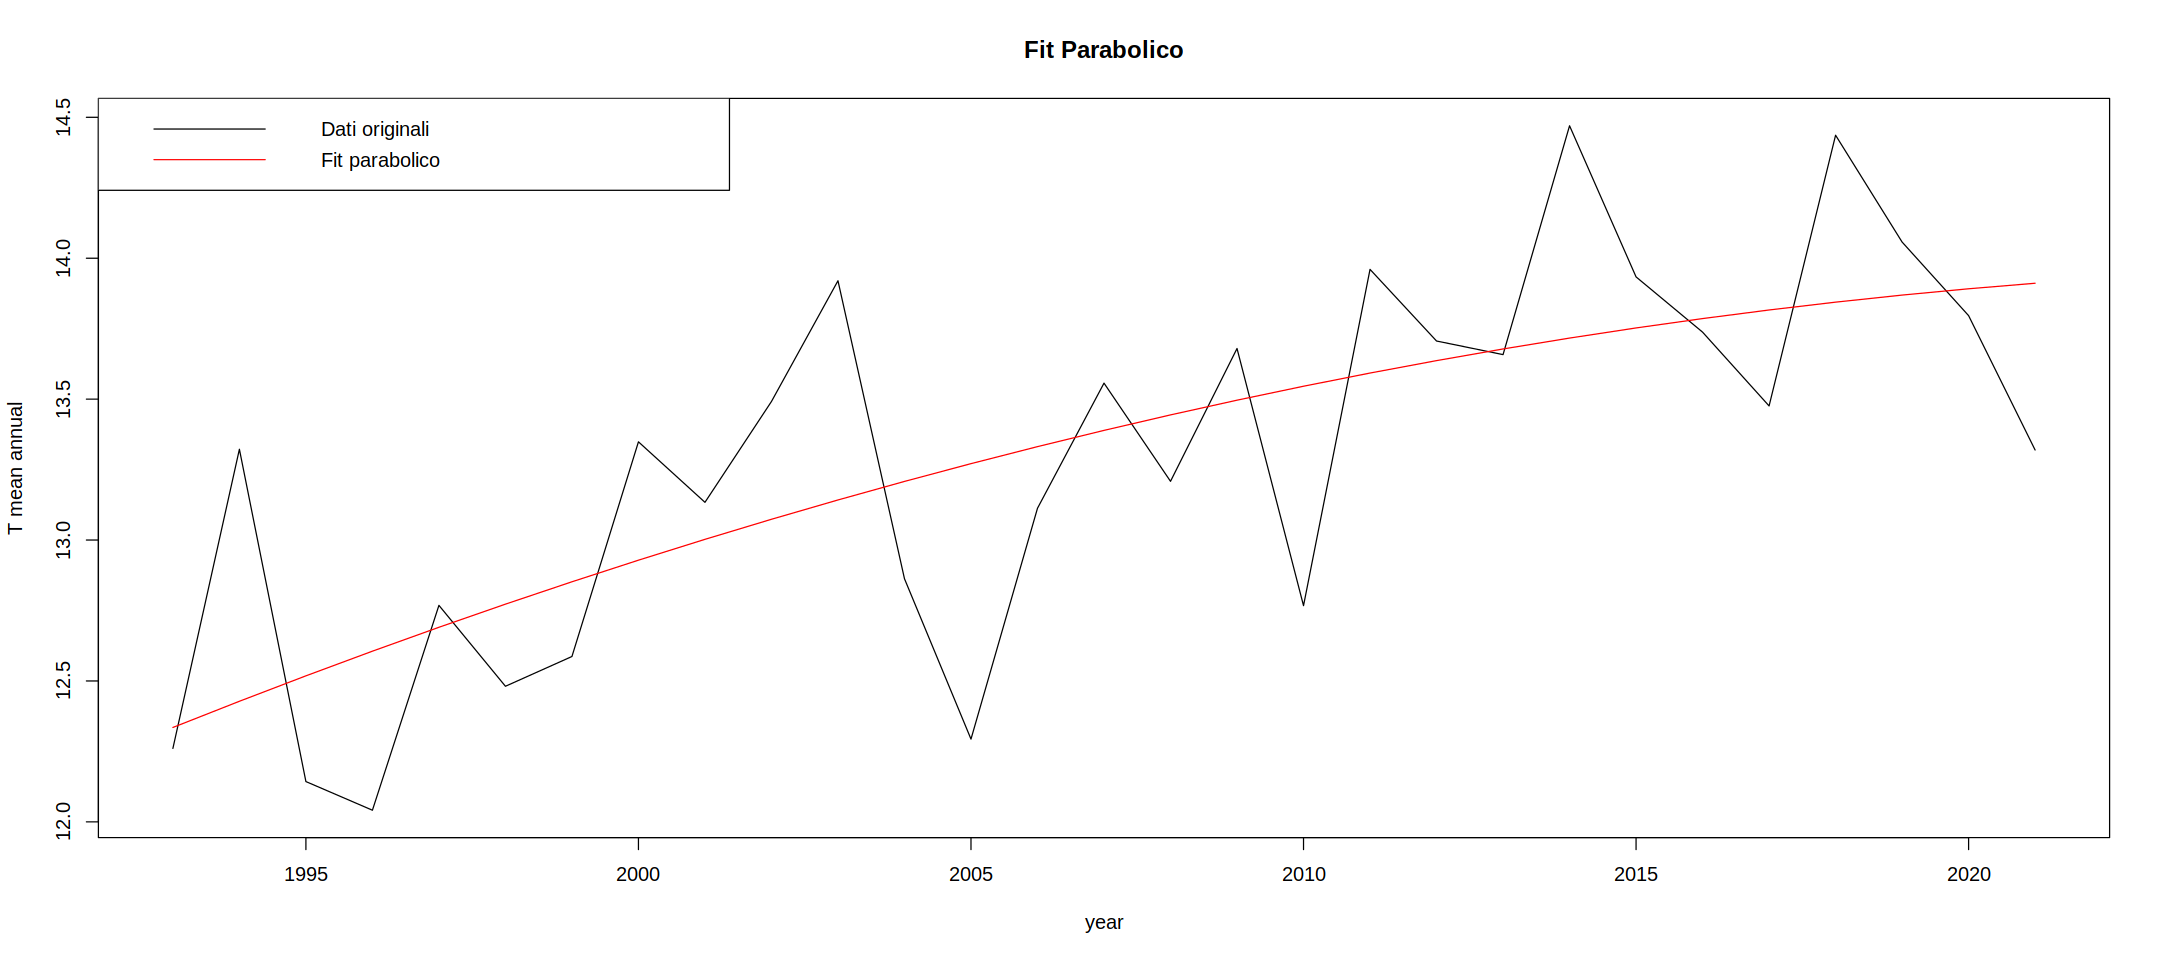

In [181]:
y = C_medio_annuale$tmean_annual_avg
X = C_medio_annuale$year
C_medio_annuale$year_quad <- C_medio_annuale$year**2

# lm parabolic fit
fit <- lm(tmean_annual_avg ~ year + year_quad, data = C_medio_annuale)

#trace prevision
new_data <- data.frame(year = seq(min(C_medio_annuale$year), max(C_medio_annuale$year), by = 1))
new_data$year_quad <- new_data$year**2

predictions <- predict(fit, newdata = new_data)

#plot
options(repr.plot.width = 18, repr.plot.height = 8)
plot(C_medio_annuale$year, C_medio_annuale$tmean_annual_avg, type = 'l', xlab = 'year', ylab = 'T mean annual', main = 'Fit Parabolico')
lines(new_data$year, predictions, col = 'red')
legend('topleft', legend = c('Dati originali', 'Fit parabolico'), col = c('black', 'red'), lty = 1)
par(cex.lab = 2, cex.main = 2, cex.axis=2)


In [180]:
# fit : linear model
fit_linear <- lm(tmean_annual_avg ~ year, data = C_medio_annuale)

# fit : linear + quadratic model
fit_quad <- lm(tmean_annual_avg ~ year + year_quad, data = C_medio_annuale)

# test ANOVA
anova_result <- anova(fit_linear, fit_quad)
anova_result


Res.Df RSS      Df Sum of Sq F         Pr(>F)   
1 27     6.057894 NA        NA        NA        NA
2 26     5.849255  1 0.2086386 0.9274007 0.3444111

The last column represent the p-value associated with the F-statistic. It indicates the probability of observing an F-statistic value as extreme as the calculated one, assuming the null hypothesis is true. In other words, it's an indicator of how significant the added parameter is in improving the model. The Pr(>F) column shows that the p-value is 0.34, suggesting that the addition of the parameter is not statistically significant, as it's greater than the significance value we have set (0.05).

Furthermore, the coefficient value in front of the quadratic term is orders of magnitude smaller than one, and therefore, it has little influence. We can conclude that the data is well approximated by a linear model.


#### 1.4.3 -  Are Castelfranco Veneto data compatible with a constant trend?

Is the trend of minimum, maximum, or average temperature over time compatible with a constant trend? The appropriate null and alternative hypotheses are specified as follows:

$
H_0: y = \alpha  \\
H_A: y = \alpha + \beta x 
$

The null hypotesis  refers to the hypothesis that adding the parameter doesn't provide a statistically significant enhancement to the model's ability to explain the variation in the data.
$
H_0: \beta=0 \\
H_A: \beta \neq 0
$

The test is performed using anova. The significance value is 0.05. 

In [208]:
# fit : linear model
fit_const <- lm(tmean_annual_avg ~ 1, data = C_medio_annuale)

# fit : linear + quadratic model
fit_linear <- lm(tmean_annual_avg ~ year, data = C_medio_annuale)


# test ANOVA
anova_result <- anova(fit_const, fit_linear)
anova_result

Res.Df RSS       Df Sum of Sq F        Pr(>F)      
1 28     12.490908 NA       NA        NA           NA
2 27      6.057894  1 6.433015  28.67191 1.176198e-05

In this case the p-value is 0.00001 (so we reject H0 and we favor the full model). We can conclude that there is a statistically significant linear association between the annual average of the mean temperature in Castelfranco Veneto and the Year. 

As a further confirmation of this hypothesis, the RSS -the amount of error associated with the model- is much higher in the first case (constant model) compared to the second one (linear model).

# 2 - Assessing Temperature Trends in Veneto: A Comparative Analysis with SNPA Data

In the previous analysis conducted on climatological data for the period 1993-2022, an increasing trend was observed in the average minimum and maximum temperatures of the 4 cities in Veneto that were considered. In this section, the aim is to estimate this trend by considering 4-year intervals and then compare the results with those presented in the SNPA (National System for Environmental Protection) data.

Instead of examining the temperature trends on a yearly basis as done before, consecutive groups of four years are taken, and the evolution of average minimum and maximum temperatures within each four-year group is analyzed. This approach can help identify longer-term trends and reduce the noise caused by annual fluctuations.

### 2.1 - Interval data processing

In [9]:
# List of city datasets
city_datasets <- list(C = C_medio_annuale, A = A_medio_annuale, P = P_medio_annuale, R = R_medio_annuale)

# list to store interval data for each city
interval_data_list <- list()

# Loop through each city's dataset
for (city_name in names(city_datasets)) { # city_name = {C,P,R,T}
  city_data <- city_datasets[[city_name]] # city_data = dataset
  num_rows <- nrow(city_data)
  interval_data <- data.frame() #to be filled

  for (i in seq(from = 1, to = (num_rows - 3), by = 4)) {
      interval <- paste(city_data$year[i], city_data$year[i + 3], sep = "-")
      avg_min <- mean(city_data$tmin_annual_avg[i:(i + 3)])
      avg_max <- mean(city_data$tmax_annual_avg[i:(i + 3)])
      avg_mean <- mean(city_data$tmean_annual_avg[i:(i + 3)])
      interval_data <- rbind(interval_data, data.frame(Interval = interval, Avg_min = avg_min, Avg_max = avg_max, Avg_mean = avg_mean))
  }
    
# Store the interval data in the list with a name based on city_name
  interval_data_list[[paste0(city_name, "_interval")]] <- interval_data
}

interval_data_list$C_interval
interval_data_list$A_interval
interval_data_list$P_interval
interval_data_list$R_interval

Interval  Avg_min  Avg_max  Avg_mean
1 1993-1996 6.942595 18.58802 12.44176
2 1997-2000 6.743878 19.96487 12.79616
3 2001-2004 7.831103 19.71252 13.35204
4 2005-2008 7.637175 19.15077 13.04288
5 2009-2012 8.050790 19.75882 13.52834
6 2013-2016 9.020260 19.42243 13.94981
7 2017-2020 8.681568 19.82636 13.94144

Interval  Avg_min  Avg_max  Avg_mean
1 1993-1996 1.468161 13.78820 6.882627
2 1997-2000 1.718009 14.29979 7.155270
3 2001-2004 1.777881 14.13704 7.161165
4 2005-2008 1.814361 13.71893 6.984139
5 2009-2012 1.920097 14.11897 7.207192
6 2013-2016 2.822804 14.20461 7.697228
7 2017-2020 2.626810 14.62181 7.771205

Interval  Avg_min   Avg_max  Avg_mean
1 1993-1996  8.660552 17.86049 13.17604
2 1997-2000  8.780353 18.56796 13.56148
3 2001-2004  9.304342 18.55519 13.86000
4 2005-2008  9.437738 18.83344 14.02496
5 2009-2012  9.569383 18.96756 14.13885
6 2013-2016 10.128762 19.05130 14.48033
7 2017-2020 10.151664 19.72833 14.72115

Interval  Avg_min  Avg_max  Avg_mean
1 1993-1996 7.162038 18.48930 12.52684
2 1997-2000 6.876515 19.13529 12.73298
3 2001-2004 7.810458 19.27725 13.35701
4 2005-2008 7.792755 19.01769 13.23858
5 2009-2012 8.118450 19.19811 13.52206
6 2013-2016 9.044415 19.47898 14.04135
7 2017-2020 8.538282 19.82346 13.98656

### 2.2 - Temperature trend analysis of interval data using STAN
The analysis is performed separately for different cities because the Stan model, in order to accurately predict the data trends, needs to be initialized with priors for the angular coefficient and intercept. These priors naturally vary from city to city.

#### Castelfranco veneto

In [263]:
modelString_Cmin = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal(-161.50134, 20.52187);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.08437, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Cmean = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model { 
  a ~ normal(-103.6, 70.52187);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.058, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Cmax = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal(-19.5, 39);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.01942, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

N = length(interval_data_list$C_interval$Avg_max)
x <- seq(from = 1994.5,to = 2018.5,by = 4) #centers of each interval as x variable
y_min <- interval_data_list$C_interval$Avg_min
y_max <- interval_data_list$C_interval$Avg_max
y_mean <- interval_data_list$C_interval$Avg_mean
modelStrings <- c(modelString_Cmin,modelString_Cmax,modelString_Cmean)
results_list <- list() # results

j<-1
for (i in list(y_min,y_max, y_mean)){
    dataList <- list(y = i , N = N, x = x)
    modelString <- modelStrings[j]
    stanDso <- stan_model(model_code = modelString)
    stanFit <- sampling(object = stanDso,
                    data = dataList,
                    chains = 3,
                    iter = 1000,
                    warmup = 200, 
                    thin = 10,
                    control = list(max_treedepth = 15))
    #save the results
    results_list[[j]] <- stanFit
    j <- j+1
}


SAMPLING FOR MODEL '74a17dff124c6de2966ce7a389707648' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 6e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.795737 seconds (Warm-up)
Chain 1:                0.381674 seconds (Sampling)
Chain 1

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”



SAMPLING FOR MODEL '0023122a1abc06d3b0c0ffbcbda8c69b' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.882377 seconds (Warm-up)
Chain 1:                0.224167 seconds (Sampling)
Chain 1

Warning message:
“There were 3 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”



SAMPLING FOR MODEL 'b2e810a42de62b7d99e6e73a44f53ea9' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.728628 seconds (Warm-up)
Chain 1:                0.463173 seconds (Sampling)
Chain 1

Warning message:
“There were 17 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”


In [264]:
summary(results_list[[1]])[2] #-164.494282092411 0.0858932523445449

$c_summary
, , chains = chain:1

         stats
parameter          mean           sd          2.5%           25%          50%
    a     -164.49428209 11.714020134 -186.70662206 -172.15061928 -164.2723959
    b        0.08589325  0.005834626    0.07497658    0.08250729    0.0857489
    sigma    0.42509671  0.137986936    0.26205864    0.31178098    0.3901815
    lp__     2.22122944  1.179218567   -0.84583506    1.74285380    2.5395845
         stats
parameter           75%         97.5%
    a     -157.29386926 -142.62446436
    b        0.08961263    0.09700993
    sigma    0.50179306    0.76866840
    lp__     3.07314989    3.67372629

, , chains = chain:2

         stats
parameter          mean           sd          2.5%           25%           50%
    a     -161.74409092 13.870085361 -191.39517234 -168.52206689 -162.40922411
    b        0.08451603  0.006907377    0.07190785    0.08038416    0.08487139
    sigma    0.40770911  0.146235327    0.22434015    0.30629665    0.36542109
    lp__     2.13005713  1.079842686   -0.12205325    1.46125948    2.25532149
         stats
parameter           75%         97.5%
    a     -153.39324537 -136.56904920
    b        0.08786973    0.09929286
    sigma    0.47136851    0.79021635
    lp__     3.04476968    3.54614337

, , chains = chain:3

         stats
parameter          mean           sd          2.5%           25%           50%
    a     -160.09655017 15.745257683 -189.37193899 -171.87701336 -159.57894736
    b        0.08369023  0.007848442    0.07162197    0.07696077    0.08341429
    sigma    0.41495934  0.158119374    0.21514043    0.30543993    0.37748849
    lp__     1.79692914  1.426334237   -2.01836828    1.27063081    2.04480654
         stats
parameter          75%         97.5%
    a     -146.4825674 -135.92947039
    b        0.0895679    0.09822496
    sigma    0.4979338    0.88750988
    lp__     2.7931691    3.56205777

In [265]:
summary(results_list[[2]])[2] #-19.5438886098867 0.0194551426705447

$c_summary
, , chains = chain:1

         stats
parameter         mean           sd          2.5%          25%          50%
    a     -19.54388861 20.085238979 -6.564564e+01 -29.78175772 -16.86830292
    b       0.01945514  0.009997673  3.756371e-05   0.01324685   0.01818264
    sigma   0.52289435  0.150697400  3.277324e-01   0.42098642   0.47861316
    lp__    0.28981839  1.520000245 -3.366323e+00  -0.21253097   0.71137278
         stats
parameter         75%       97.5%
    a     -6.87332891 19.39099796
    b      0.02446911  0.04223893
    sigma  0.60105314  0.88276195
    lp__   1.40865492  1.83046460

, , chains = chain:2

         stats
parameter        mean           sd          2.5%          25%         50%
    a     -15.9507821 17.891960081 -4.396293e+01 -30.68059314 -13.8374514
    b       0.0176900  0.008890158 -9.607528e-04   0.01159273   0.0167193
    sigma   0.5635491  0.189499491  3.114883e-01   0.45142479   0.5193631
    lp__    0.3366235  1.508789951 -4.193867e+00   0.04454015   0.7162512
         stats
parameter         75%       97.5%
    a     -3.86803223 21.83947542
    b      0.02496316  0.03155122
    sigma  0.65934005  0.95670450
    lp__   1.36450199  1.81177137

, , chains = chain:3

         stats
parameter         mean           sd          2.5%          25%          50%
    a     -19.71190325 17.973393892 -47.779517599 -35.43903983 -20.08851939
    b       0.01955908  0.008957648   0.003057338   0.01251531   0.01970073
    sigma   0.57276903  0.286303393   0.255758475   0.40967512   0.51903932
    lp__    0.13540085  1.518778483  -3.790127869  -0.69936788   0.72337216
         stats
parameter         75%       97.5%
    a     -5.74615187 13.40556287
    b      0.02742162  0.03359287
    sigma  0.63608944  1.52450321
    lp__   1.03828164  1.81964165

In [266]:
summary(results_list[[3]])[2] # -108.223370813876 0.0605679628708453

$c_summary
, , chains = chain:1

         stats
parameter          mean           sd          2.5%           25%           50%
    a     -108.22337081 14.147146035 -133.09802115 -116.77755137 -108.62427356
    b        0.06056796  0.007049789    0.04776948    0.05580873    0.06073674
    sigma    0.26689665  0.099928951    0.14823489    0.18436951    0.24454522
    lp__     5.26300977  1.605854848    1.14817544    4.73896781    5.63739984
         stats
parameter          75%        97.5%
    a     -98.64568369 -82.55748249
    b       0.06482366   0.07295336
    sigma   0.33543921   0.53199862
    lp__    6.45743511   7.03033826

, , chains = chain:2

         stats
parameter          mean           sd          2.5%          25%           50%
    a     -105.53437348 13.526126656 -126.74591901 -114.4997302 -105.50347135
    b        0.05922173  0.006746551    0.04594012    0.0549665    0.05922289
    sigma    0.28443324  0.104468067    0.18433679    0.2171233    0.24560901
    lp__     5.38364906  1.348137647    1.87046922    4.8235830    5.62841319
         stats
parameter          75%        97.5%
    a     -96.96872198 -79.01457195
    b       0.06368402   0.06973913
    sigma   0.31002809   0.59476449
    lp__    6.46561441   6.92076318

, , chains = chain:3

         stats
parameter          mean           sd          2.5%           25%           50%
    a     -105.55966130 14.753238937 -133.68076719 -115.14705449 -105.90412525
    b        0.05923593  0.007341884    0.04539809    0.05440663    0.05943591
    sigma    0.25540516  0.102693982    0.13465684    0.19487368    0.23600623
    lp__     5.41689444  1.288649164    1.73357903    4.73934717    5.77906040
         stats
parameter          75%        97.5%
    a     -95.90690023 -77.70852265
    b       0.06397281   0.07326001
    sigma   0.27785253   0.54559198
    lp__    6.32030027   7.02257468

### 2.3 - Results

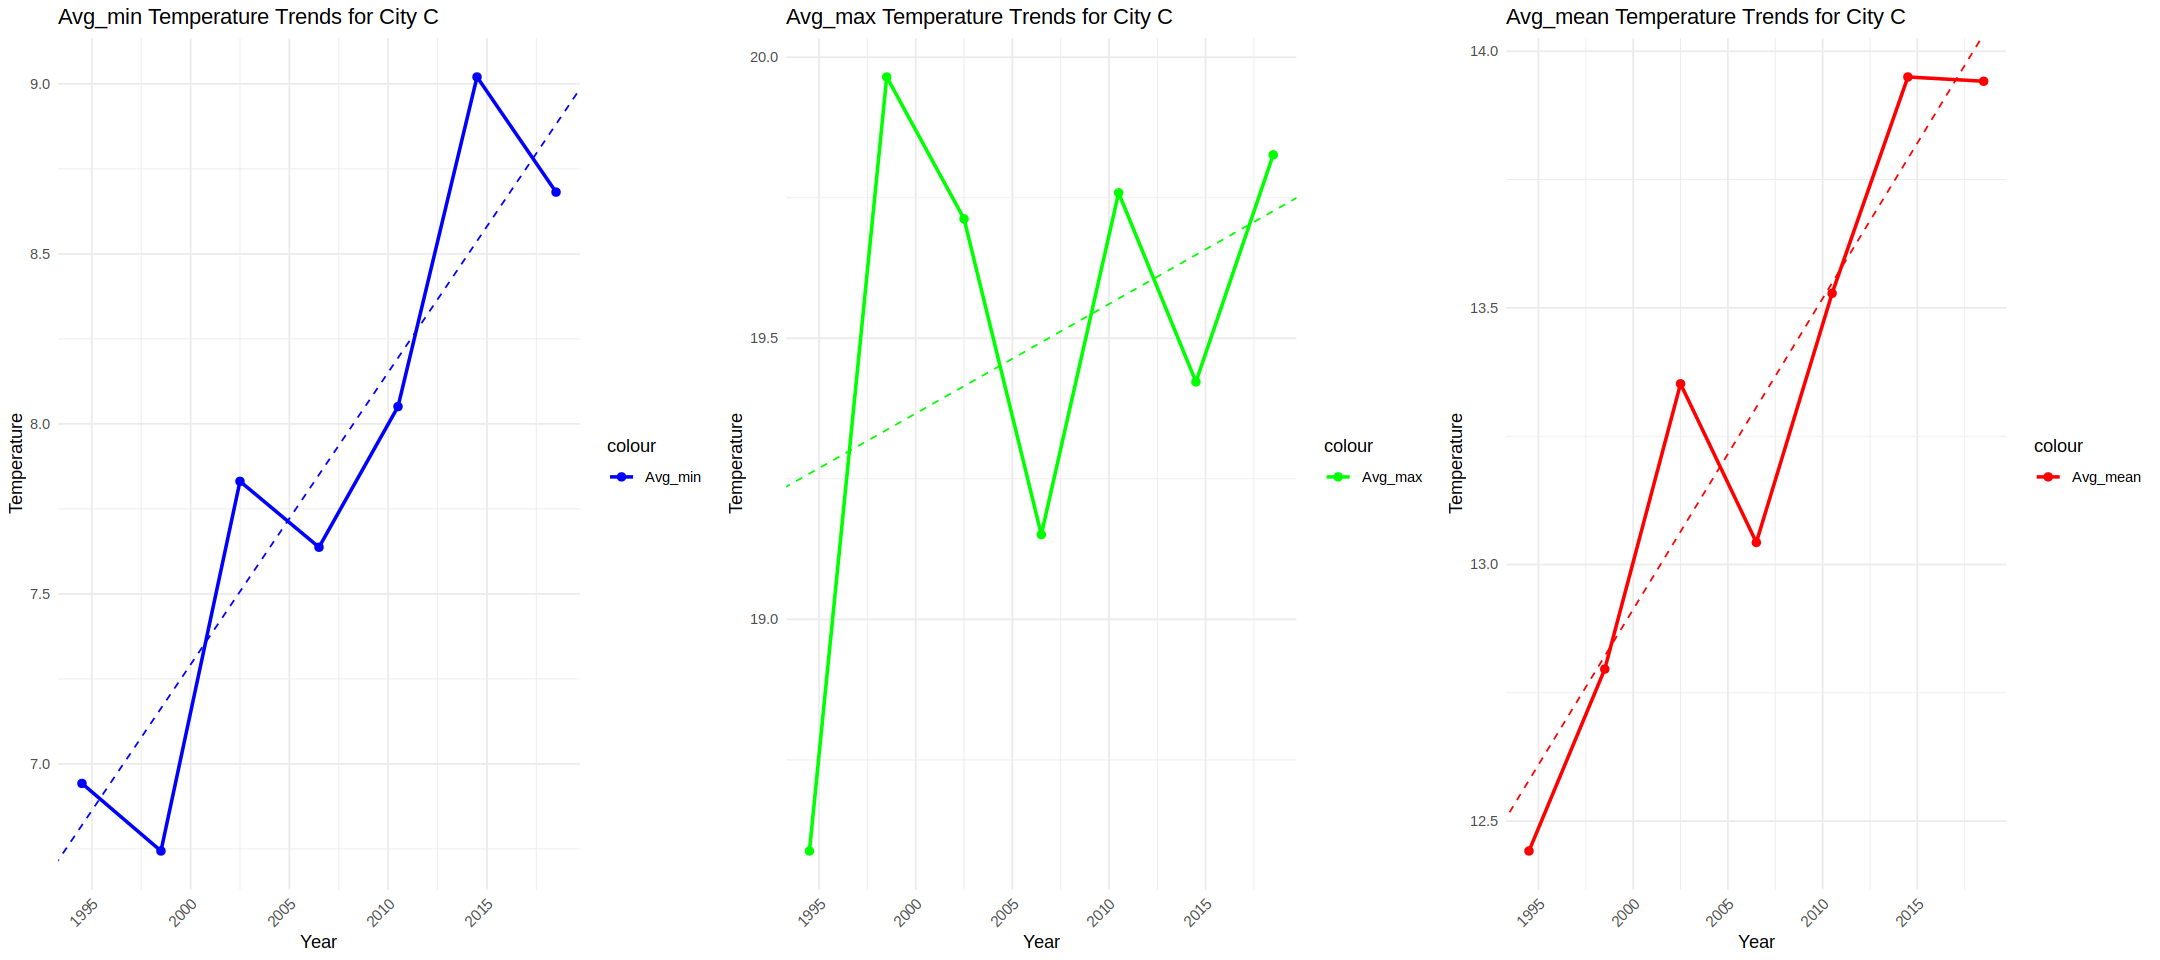

In [268]:
# Access the interval data for city C
interval_data <- interval_data_list$C_interval

# Create a ggplot line plot for Avg_min with points
plot_avg_min <- ggplot(data = interval_data, aes(x = x, group = 1)) +
  geom_line(aes(y = Avg_min, color = "Avg_min"), linewidth = 1) +
  geom_point(aes(y = Avg_min, color = "Avg_min"), size = 2) +
  geom_abline(slope = 0.0858932523445449, intercept = -164.494282092411, color = "blue", linetype = "dashed") +
  labs(title = "Avg_min Temperature Trends for City C",
       x = "Year", y = "Temperature") +
  scale_color_manual(values = c("Avg_min" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

                       
# Create a ggplot line plot for Avg_max with points
plot_avg_max <- ggplot(data = interval_data, aes(x = x, group = 1)) +
  geom_line(aes(y = Avg_max, color = "Avg_max"), linewidth = 1) +
  geom_point(aes(y = Avg_max, color = "Avg_max"), size = 2) +
  geom_abline(slope = 0.0194551426705447, intercept = -19.5438886098867 , color = "green", linetype = "dashed") +
  labs(title = "Avg_max Temperature Trends for City C",
       x = "Year", y = "Temperature") +
  scale_color_manual(values = c("Avg_max" = "green")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Create a ggplot line plot for Avg_mean with points
plot_avg_mean <- ggplot(data = interval_data, aes(x = x, group = 1)) +
  geom_line(aes(y = Avg_mean, color = "Avg_mean"), linewidth = 1) +
  geom_point(aes(y = Avg_mean, color = "Avg_mean"), size = 2) +
  geom_abline(slope = 0.0605679628708453, intercept = -108.223370813876 , color = "red", linetype = "dashed") +
  labs(title = "Avg_mean Temperature Trends for City C",
       x = "Year", y = "Temperature") +
  scale_color_manual(values = c("Avg_mean" = "red")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Combine the plots using grid.arrange
options(repr.plot.width = 18, repr.plot.height = 8)
grid.arrange(plot_avg_min, plot_avg_max, plot_avg_mean, ncol = 3)


#### Auronzo

In [277]:
modelString_Amin = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal( -95, 20);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.048, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Amean = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model { 
  a ~ normal(-53, 10);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.03, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Amax = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal(-18, 15);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.016, 0.010);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

N = length(interval_data_list$A_interval$Avg_max)
x <- seq(from = 1994.5,to = 2018.5,by = 4) #centers of each interval as x variable
y_min <- interval_data_list$A_interval$Avg_min
y_max <- interval_data_list$A_interval$Avg_max
y_mean <- interval_data_list$A_interval$Avg_mean
modelStrings <- c(modelString_Amin,modelString_Amax,modelString_Amean)
results_listA <- list() # results

j<-1
for (i in list(y_min,y_max, y_mean)){
    dataList <- list(y = i , N = N, x = x)
    modelString <- modelStrings[j]
    stanDso <- stan_model(model_code = modelString)
    stanFit <- sampling(object = stanDso,
                    data = dataList,
                    chains = 3,
                    iter = 1000,
                    warmup = 200, 
                    thin = 10,
                    control = list(max_treedepth = 15))
    #save the results
    results_listA[[j]] <- stanFit
    j <- j+1
}

recompiling to avoid crashing R session




SAMPLING FOR MODEL '836d833d023b4e9451c90c504293c40a' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.630381 seconds (Warm-up)
Chain 1:                0.439692 seconds (Sampling)
Chain 1

Warning message:
“There were 9 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”



SAMPLING FOR MODEL 'a7e017a20ea46e4f6fb7c0ca77941c37' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.07047 seconds (Warm-up)
Chain 1:                0.333818 seconds (Sampling)
Chain 1:

Warning message:
“There were 1 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”
recompiling to avoid crashing R session




SAMPLING FOR MODEL '8c158be0775c46a153fffa6fc114a1fc' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.809133 seconds (Warm-up)
Chain 1:                0.491078 seconds (Sampling)
Chain 1

Warning message:
“There were 7 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.08, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”


In [278]:
summary(results_listA[[1]])[2] #-98.3459823303303 0.0500170249164974

$c_summary
, , chains = chain:1

         stats
parameter         mean          sd          2.5%           25%          50%
    a     -98.34598233 12.18523720 -124.13063755 -105.60059608 -97.04499848
    b       0.05001702  0.00606734    0.03935908    0.04674894   0.04932704
    sigma   0.28765875  0.09240134    0.16082036    0.22060239   0.26924616
    lp__    4.35497464  1.28924883    0.93391628    4.01069959   4.64756741
         stats
parameter          75%        97.5%
    a     -91.74101657 -76.84743452
    b       0.05369056   0.06288992
    sigma   0.35143070   0.51669068
    lp__    5.26062698   5.80352490

, , chains = chain:2

         stats
parameter         mean          sd          2.5%           25%          50%
    a     -94.65858879 14.74416152 -122.78763826 -104.65386749 -93.28380595
    b       0.04819179  0.00734913    0.03779595    0.04244959   0.04751612
    sigma   0.30707329  0.09565079    0.20305442    0.24721701   0.27876028
    lp__    4.03251923  1.51630378    0.34515610    3.26401674   4.40019484
         stats
parameter         75%        97.5%
    a     -83.1657828 -73.82631990
    b       0.0532041   0.06221564
    sigma   0.3527546   0.50960252
    lp__    5.1660174   5.70357289

, , chains = chain:3

         stats
parameter         mean           sd          2.5%           25%          50%
    a     -98.34513913 12.859764098 -120.41359652 -105.71801220 -97.88866353
    b       0.05002705  0.006402645    0.04042206    0.04492471   0.04981692
    sigma   0.31375561  0.124411681    0.19258644    0.22897503   0.28205866
    lp__    4.25085815  1.321359233    0.58969225    3.49194236   4.57723647
         stats
parameter         75%        97.5%
    a     -88.1261429 -79.08435994
    b       0.0537109   0.06110155
    sigma   0.3597121   0.55999204
    lp__    5.2237485   5.73680083

In [279]:
summary(results_listA[[2]])[2] #-19.9462948543419  0.0169711922973649

$c_summary
, , chains = chain:1

         stats
parameter         mean          sd          2.5%         25%          50%
    a     -19.94629485 9.840821931 -37.544601649 -27.0035166 -20.71960038
    b       0.01697119 0.004912957   0.008452238   0.0132575   0.01737235
    sigma   0.34138586 0.120793735   0.171947794   0.2673860   0.32364889
    lp__    3.54793416 1.259646580   0.056794429   3.0689586   3.83822266
         stats
parameter          75%       97.5%
    a     -12.47641972 -2.87872318
    b       0.02040096  0.02575061
    sigma   0.38486839  0.58203920
    lp__    4.39675408  5.13874438

, , chains = chain:2

         stats
parameter         mean          sd          2.5%          25%          50%
    a     -19.92469627 10.80728195 -36.102518711 -27.01335454 -20.82178710
    b       0.01697935  0.00539315   0.006555049   0.01282871   0.01743995
    sigma   0.34725670  0.14460719   0.209812388   0.26308895   0.30831428
    lp__    3.63246587  1.44786335  -0.369674093   3.12558930   4.07570788
         stats
parameter          75%      97.5%
    a     -11.63610726 0.96849449
    b       0.02053088 0.02502555
    sigma   0.39661662 0.64374148
    lp__    4.56040344 5.16777473

, , chains = chain:3

         stats
parameter         mean           sd          2.5%          25%         50%
    a     -20.43502775 11.468904015 -36.410256902 -29.26598916 -22.0181327
    b       0.01723638  0.005707031   0.005538223   0.01346103   0.0180199
    sigma   0.33126240  0.135630736   0.162197928   0.25163802   0.2946372
    lp__    3.60522295  1.293163170   0.405675023   2.96218428   3.9248525
         stats
parameter          75%      97.5%
    a     -12.97748815 3.07253451
    b       0.02161625 0.02516874
    sigma   0.37910510 0.68745171
    lp__    4.49376381 5.11305131

In [280]:
summary(results_listA[[3]])[2] # -52.5474977535363 0.0312988349315937

$c_summary
, , chains = chain:1

         stats
parameter         mean          sd         2.5%          25%          50%
    a     -55.54749775 7.454755816 -66.88995365 -61.08309879 -56.05212197
    b       0.03129883 0.003715384   0.02465391   0.02908291   0.03152227
    sigma   0.23343204 0.096294807   0.13035847   0.17058109   0.20492599
    lp__    5.78580184 1.368886766   3.01233852   5.03004939   6.27506135
         stats
parameter          75%        97.5%
    a     -51.26147320 -42.05338333
    b       0.03404976   0.03697828
    sigma   0.26437553   0.45667335
    lp__    6.58674423   7.30456275

, , chains = chain:2

         stats
parameter         mean          sd         2.5%          25%         50%
    a     -55.81016052 8.075771919 -69.36546887 -61.73489840 -56.2349124
    b       0.03142738 0.004016455   0.02459339   0.02843842   0.0316643
    sigma   0.21558723 0.068732131   0.13665136   0.16683898   0.1995092
    lp__    5.84863291 1.294520883   2.96539330   5.26812326   6.1905391
         stats
parameter          75%        97.5%
    a     -49.90533637 -42.10600283
    b       0.03435291   0.03828303
    sigma   0.24716757   0.33533946
    lp__    6.86324748   7.27141536

, , chains = chain:3

         stats
parameter         mean          sd         2.5%          25%          50%
    a     -54.22472388 9.502715816 -72.57130085 -60.00937785 -54.66205972
    b       0.03063642 0.004727437   0.02175116   0.02774803   0.03083181
    sigma   0.27772620 0.118166148   0.18057863   0.19806149   0.24390517
    lp__    5.29119928 1.726550104  -0.01504739   4.38976678   5.49486375
         stats
parameter          75%        97.5%
    a     -48.46879412 -36.56934414
    b       0.03350321   0.03977227
    sigma   0.32037570   0.55728892
    lp__    6.57544665   7.38130382

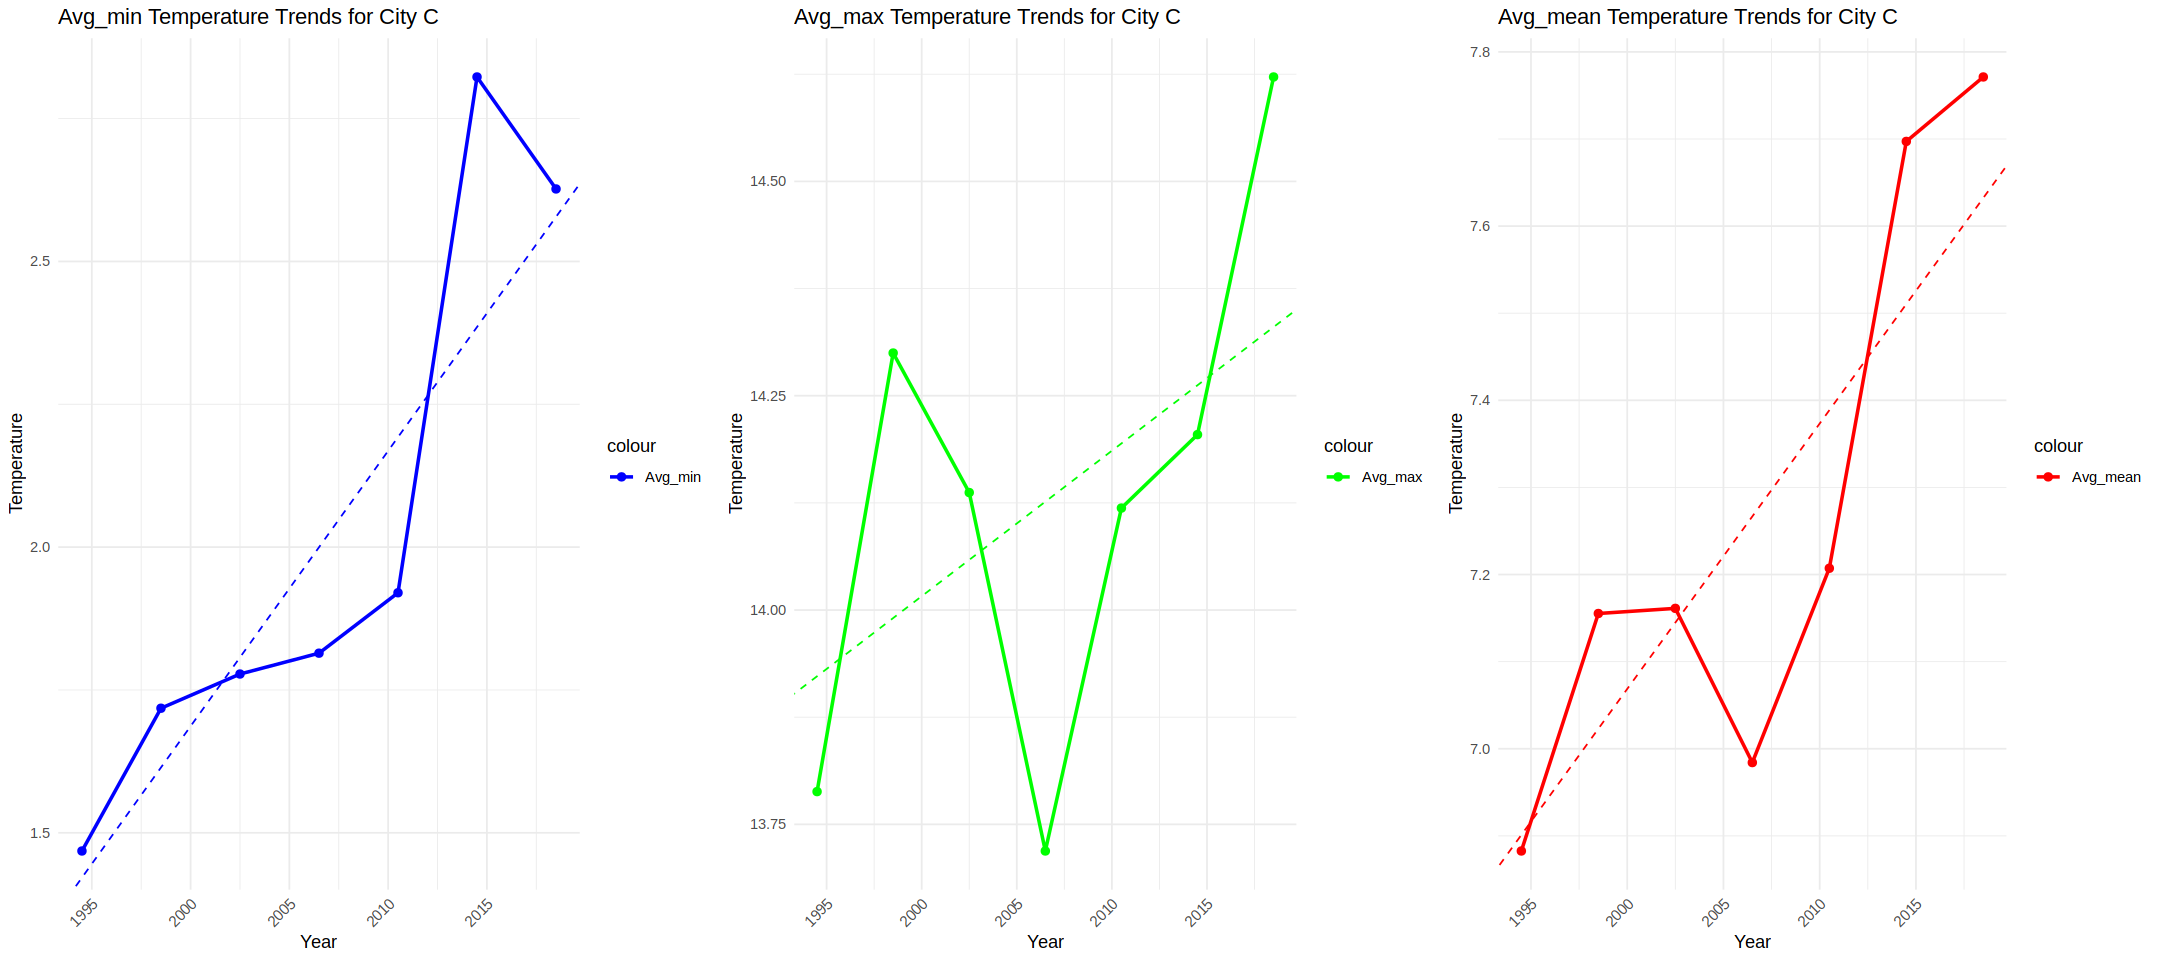

In [281]:
# Access the interval data for city A
interval_data <- interval_data_list$A_interval

# Create a ggplot line plot for Avg_min with points
plot_avg_min <- ggplot(data = interval_data, aes(x = x, group = 1)) +
  geom_line(aes(y = Avg_min, color = "Avg_min"), size = 1) +
  geom_point(aes(y = Avg_min, color = "Avg_min"), size = 2) +
  geom_abline(slope = 0.0500170249164974, intercept = -98.3459823303303, color = "blue", linetype = "dashed") +
  labs(title = "Avg_min Temperature Trends for City C",
       x = "Year", y = "Temperature") +
  scale_color_manual(values = c("Avg_min" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

                       
# Create a ggplot line plot for Avg_max with points
plot_avg_max <- ggplot(data = interval_data, aes(x = x, group = 1)) +
  geom_line(aes(y = Avg_max, color = "Avg_max"), size = 1) +
  geom_point(aes(y = Avg_max, color = "Avg_max"), size = 2) +
  geom_abline(slope = 0.0169722271633233, intercept = -19.9462948543419 , color = "green", linetype = "dashed") +
  labs(title = "Avg_max Temperature Trends for City C",
       x = "Year", y = "Temperature") +
  scale_color_manual(values = c("Avg_max" = "green")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Create a ggplot line plot for Avg_mean with points
plot_avg_mean <- ggplot(data = interval_data, aes(x = x, group = 1)) +
  geom_line(aes(y = Avg_mean, color = "Avg_mean"), size = 1) +
  geom_point(aes(y = Avg_mean, color = "Avg_mean"), size = 2) +
  geom_abline(slope = 0.0312988349315937, intercept = -55.5474977535363 , color = "red", linetype = "dashed") +
  labs(title = "Avg_mean Temperature Trends for City C",
       x = "Year", y = "Temperature") +
  scale_color_manual(values =
                     c("Avg_mean" = "red")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Combine the plots using grid.arrange
options(repr.plot.width = 18, repr.plot.height = 8)
grid.arrange(plot_avg_min, plot_avg_max, plot_avg_mean, ncol = 3)


#### Porto Tolle

In [13]:
modelString_Pmin = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal( -100, 20);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.05, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Pmean = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model { 
  a ~ normal(-90, 10);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.05, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Pmax = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal(-100, 15);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.05, 0.010);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

N = length(interval_data_list$P_interval$Avg_max)
x <- seq(from = 1994.5,to = 2018.5,by = 4) #centers of each interval as x variable
y_min <- interval_data_list$P_interval$Avg_min
y_max <- interval_data_list$P_interval$Avg_max
y_mean <- interval_data_list$P_interval$Avg_mean
modelStrings <- c(modelString_Pmin,modelString_Pmax,modelString_Pmean)
results_listP <- list() # results

j<-1
for (i in list(y_min,y_max, y_mean)){
    dataList <- list(y = i , N = N, x = x)
    modelString <- modelStrings[j]
    stanDso <- stan_model(model_code = modelString)
    stanFit <- sampling(object = stanDso,
                    data = dataList,
                    chains = 3,
                    iter = 1000,
                    warmup = 200, 
                    thin = 10,
                    control = list(max_treedepth = 15))
    #save the results
    results_listP[[j]] <- stanFit
    j <- j+1
}


SAMPLING FOR MODEL 'f9fcc21ad7da516152f545154c5e26b1' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.32058 seconds (Warm-up)
Chain 1:                0.686135 seconds (Sampling)
Chain 

Warning message:
“There were 5 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”



SAMPLING FOR MODEL 'eceb39cdb7fecc390d3b8162856c0d9d' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 7e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.38857 seconds (Warm-up)
Chain 1:                0.47548 seconds (Sampling)
Chain 1: 

Warning message:
“There were 4 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.06, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”



SAMPLING FOR MODEL '87dfb5b2de1383ffba54235fea726093' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 6e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.01778 seconds (Warm-up)
Chain 1:                0.679503 seconds (Sampling)
Chain 1:

Warning message:
“There were 15 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.06, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”


In [15]:
summary(results_listP[[1]])[2] #-109.593566289179 0.0593200281985062

$c_summary
, , chains = chain:1

         stats
parameter          mean           sd          2.5%           25%           50%
    a     -109.59356629 12.033163380 -131.99215017 -117.94819717 -109.75148175
    b        0.05932003  0.005996222    0.04925171    0.05639889    0.05942812
    sigma    0.18699413  0.071652973    0.09535031    0.13476541    0.16978549
    lp__     6.90892169  1.255987222    3.73616046    6.46950645    7.12139732
         stats
parameter           75%        97.5%
    a     -103.70758861 -89.45100979
    b        0.06349187   0.07046984
    sigma    0.23778598   0.36350105
    lp__     7.78384457   8.27597251

, , chains = chain:2

         stats
parameter          mean           sd          2.5%           25%           50%
    a     -107.26707443 12.075432963 -129.93237665 -115.51905943 -107.73856376
    b        0.05816058  0.006013195    0.04709505    0.05427396    0.05838361
    sigma    0.18696097  0.079159285    0.09816188    0.12945578    0.16298270
    lp__     6.69934052  1.489047826    3.02627393    6.00417816    6.95395848
         stats
parameter         75%        97.5%
    a     -99.3778337 -85.13995018
    b       0.0622815   0.06944523
    sigma   0.2190775   0.42932719
    lp__    7.8591106   8.47282152

, , chains = chain:3

         stats
parameter          mean           sd          2.5%           25%           50%
    a     -108.93184595 11.502768451 -127.55141184 -117.62283734 -109.40728890
    b        0.05898954  0.005742177    0.04502351    0.05656656    0.05926393
    sigma    0.18547071  0.084441845    0.09485483    0.12219211    0.16785403
    lp__     6.80138279  1.477346040    2.63420479    6.00750009    7.20995497
         stats
parameter           75%        97.5%
    a     -104.01871466 -80.94147471
    b        0.06333506   0.06830927
    sigma    0.21903137   0.35594918
    lp__     7.86881567   8.41226054

In [16]:
summary(results_listP[[2]])[2] # -96.9236707743128 0.0576737810513849

$c_summary
, , chains = chain:1

         stats
parameter         mean          sd          2.5%           25%          50%
    a     -96.92367077 8.963146625 -112.62685885 -103.61571786 -97.65289917
    b       0.05767378 0.004468454    0.04775177    0.05452128   0.05805544
    sigma   0.26452553 0.099164835    0.14760104    0.19714010   0.23598320
    lp__    4.98884788 1.273595041    1.98107824    4.16455730   5.27243515
         stats
parameter          75%        97.5%
    a     -90.56730949 -77.05472615
    b       0.06098717   0.06549864
    sigma   0.31185793   0.48846502
    lp__    6.02729841   6.50169618

, , chains = chain:2

         stats
parameter         mean          sd          2.5%           25%          50%
    a     -94.61326373 9.763621125 -113.94901125 -100.70028343 -94.93045092
    b       0.05651907 0.004864562    0.04654059    0.05362154   0.05670665
    sigma   0.31070792 0.125168766    0.20589137    0.24047916   0.26945000
    lp__    4.80718436 1.563465983    0.70276325    4.27637229   5.40750356
         stats
parameter         75%        97.5%
    a     -88.7749523 -74.61119022
    b       0.0596078   0.06615482
    sigma   0.3238800   0.72620976
    lp__    5.8856047   6.42579893

, , chains = chain:3

         stats
parameter         mean          sd          2.5%           25%          50%
    a     -97.24099833 9.692307082 -114.83132773 -103.12559442 -97.68405688
    b       0.05782922 0.004829106    0.04977889    0.05403164   0.05807911
    sigma   0.24966200 0.079341693    0.14243053    0.19585257   0.22831253
    lp__    5.01545892 1.457643627    1.12391285    4.82968457   5.29233143
         stats
parameter          75%        97.5%
    a     -89.58844185 -81.16747095
    b       0.06077703   0.06660223
    sigma   0.27779762   0.43716440
    lp__    5.98066651   6.54666411

In [17]:
summary(results_listP[[3]])[2] # -97.0427814802305 0.0553404072641993

$c_summary
, , chains = chain:1

         stats
parameter         mean          sd          2.5%           25%         50%
    a     -97.04278148 7.180887696 -109.78802345 -102.72578632 -97.2622619
    b       0.05534041 0.003575331    0.04699697    0.05297194   0.0554498
    sigma   0.12289676 0.064264037    0.06810655    0.08074867   0.0984534
    lp__    9.67186284 1.448080937    6.61757738    8.96372531  10.0651761
         stats
parameter          75%        97.5%
    a     -92.25975288 -80.31310391
    b       0.05817675   0.06171318
    sigma   0.14538501   0.26119154
    lp__   10.72825158  11.27810378

, , chains = chain:2

         stats
parameter         mean          sd          2.5%          25%          50%
    a     -94.09323339 7.944718333 -107.21393554 -99.68115254 -93.04819586
    b       0.05387745 0.003956717    0.04658504   0.05101946   0.05333395
    sigma   0.14704299 0.065728483    0.08643520   0.10014678   0.12658508
    lp__    9.16118086 1.804203016    4.32366606   8.14129140   9.65853012
         stats
parameter          75%       97.5%
    a     -88.31157765 -79.3905666
    b       0.05666557   0.0604308
    sigma   0.17135125   0.3162215
    lp__   10.51981514  11.1674700

, , chains = chain:3

         stats
parameter         mean          sd          2.5%           25%          50%
    a     -96.41282871 7.228426147 -109.57815717 -102.18206481 -95.98521994
    b       0.05502138 0.003604105    0.04998573    0.05243625   0.05480565
    sigma   0.13424206 0.057617250    0.09048719    0.09726951   0.11640079
    lp__    9.34614515 1.399133490    5.31375846    8.79966431   9.69399015
         stats
parameter          75%        97.5%
    a     -91.25605413 -86.35440072
    b       0.05792012   0.06156051
    sigma   0.14893342   0.34016032
    lp__   10.32757815  11.08078475

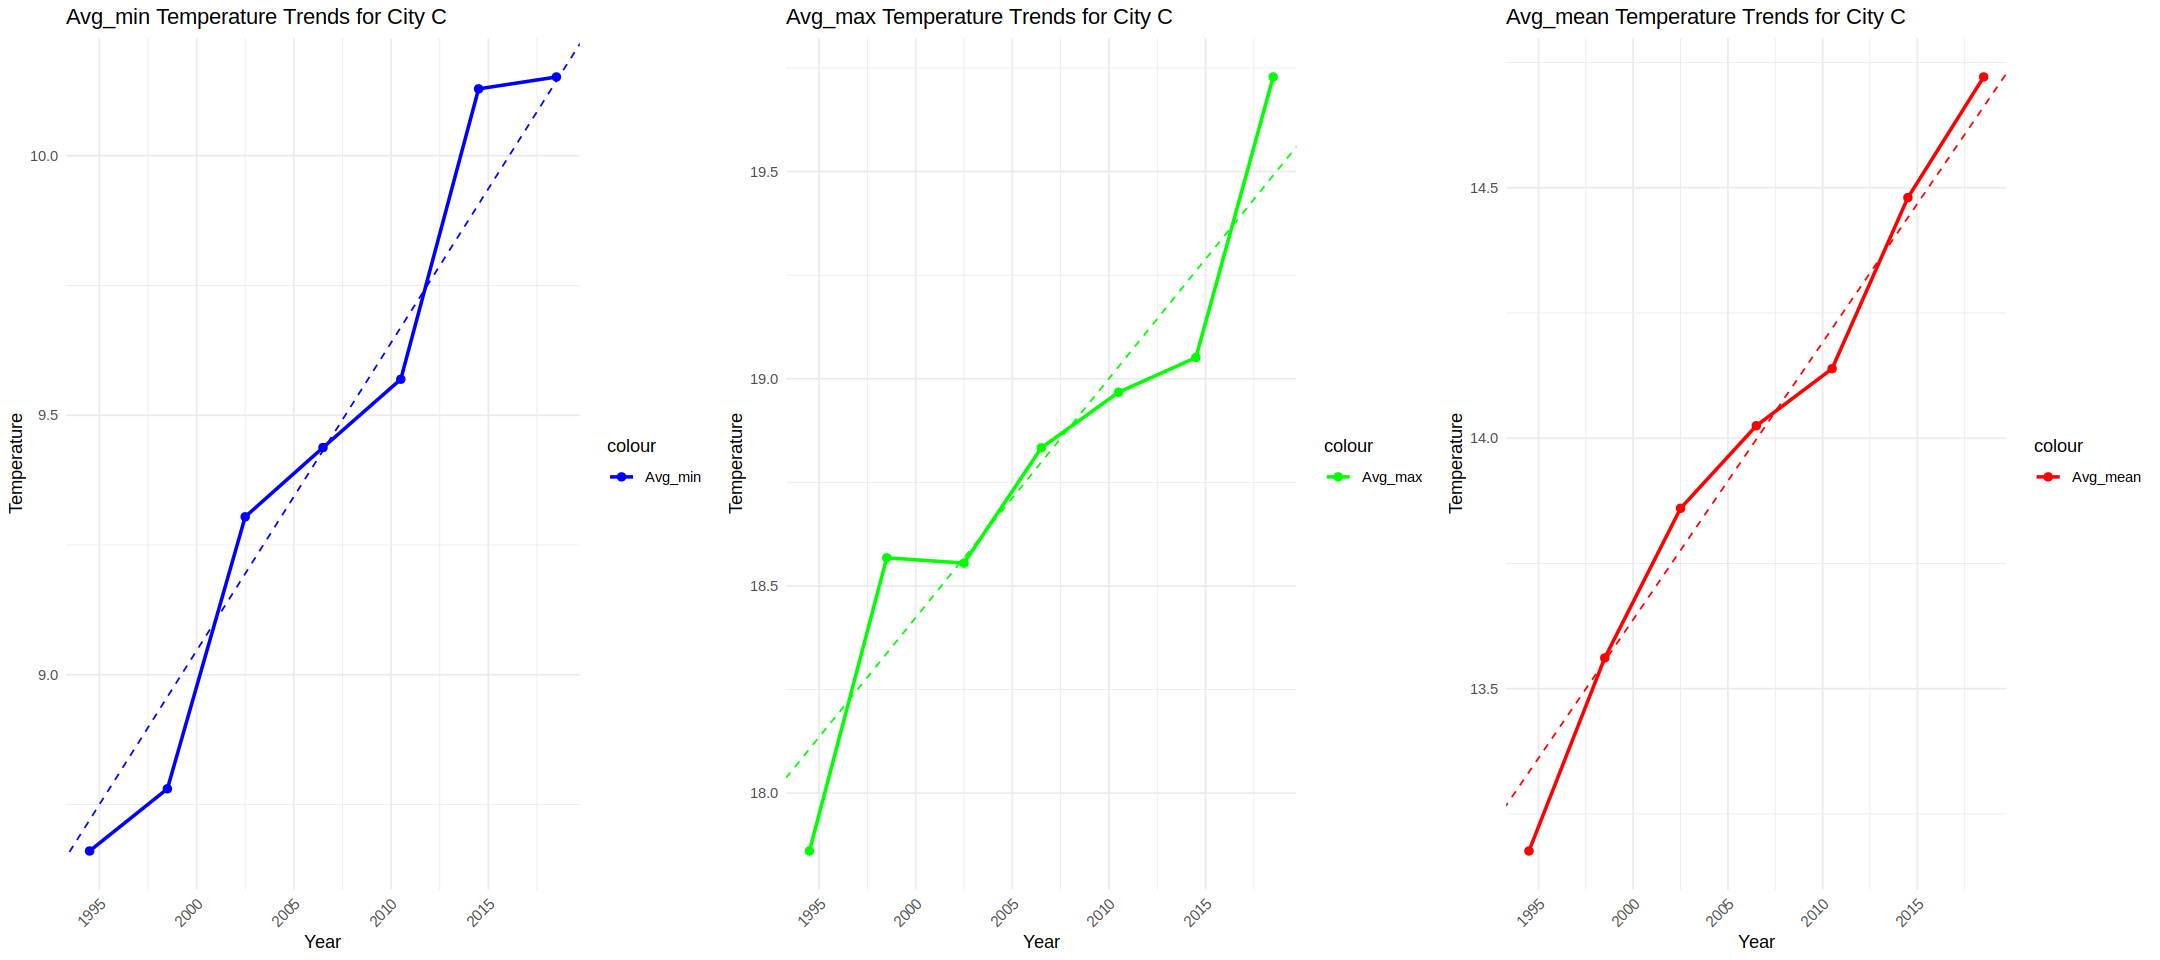

In [19]:
# Access the interval data for city P
interval_data <- interval_data_list$P_interval

# Create a ggplot line plot for Avg_min with points
plot_avg_min <- ggplot(data = interval_data, aes(x = x, group = 1)) +
  geom_line(aes(y = Avg_min, color = "Avg_min"), linewidth = 1) +
  geom_point(aes(y = Avg_min, color = "Avg_min"), size = 2) +
  geom_abline(slope = 0.0593200281985062, intercept = -109.593566289179, color = "blue", linetype = "dashed") +
  labs(title = "Avg_min Temperature Trends for City C",
       x = "Year", y = "Temperature") +
  scale_color_manual(values = c("Avg_min" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

                       
# Create a ggplot line plot for Avg_max with points
plot_avg_max <- ggplot(data = interval_data, aes(x = x, group = 1)) +
  geom_line(aes(y = Avg_max, color = "Avg_max"), linewidth = 1) +
  geom_point(aes(y = Avg_max, color = "Avg_max"), size = 2) +
  geom_abline(slope = 0.0576737810513849, intercept = -96.9236707743128 , color = "green", linetype = "dashed") +
  labs(title = "Avg_max Temperature Trends for City C",
       x = "Year", y = "Temperature") +
  scale_color_manual(values = c("Avg_max" = "green")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Create a ggplot line plot for Avg_mean with points
plot_avg_mean <- ggplot(data = interval_data, aes(x = x, group = 1)) +
  geom_line(aes(y = Avg_mean, color = "Avg_mean"), linewidth = 1) +
  geom_point(aes(y = Avg_mean, color = "Avg_mean"), size = 2) +
  geom_abline(slope = 0.0553404072641993, intercept = -97.0427814802305 , color = "red", linetype = "dashed") +
  labs(title = "Avg_mean Temperature Trends for City C",
       x = "Year", y = "Temperature") +
  scale_color_manual(values = c("Avg_mean" = "red")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Combine the plots using grid.arrange
options(repr.plot.width = 18, repr.plot.height = 8)
grid.arrange(plot_avg_min, plot_avg_max, plot_avg_mean, ncol = 3)


#### Roverchiara

In [28]:
modelString_Rmin = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal( -100, 20);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.05, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Rmean = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model { 
  a ~ normal(-90, 10);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.05, 0.01023);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

modelString_Rmax = "

data {
  int<lower=0> N;  // Number of data points
  vector[N] x;     // predictor
  vector[N] y;     // outcome
}

parameters {
  real a;           // intercept
  real b;           // slope
  real<lower=0> sigma;
}

model {
  a ~ normal(-100, 15);  // prior for intercept a using correct estimate and std. error
  b ~ normal(0.05, 0.010);      // prior for slope b using correct estimate and std. error
  y ~ normal(a + b * x, sigma);      // Likelihood: normal distribution for the response variable
}
"

N = length(interval_data_list$R_interval$Avg_max)
x <- seq(from = 1994.5,to = 2018.5,by = 4) #centers of each interval as x variable
y_min <- interval_data_list$R_interval$Avg_min
y_max <- interval_data_list$R_interval$Avg_max
y_mean <- interval_data_list$R_interval$Avg_mean
modelStrings <- c(modelString_Rmin,modelString_Rmax,modelString_Rmean)
results_listR <- list() # results

j<-1
for (i in list(y_min,y_max, y_mean)){
    dataList <- list(y = i , N = N, x = x)
    modelString <- modelStrings[j]
    stanDso <- stan_model(model_code = modelString)
    stanFit <- sampling(object = stanDso, 
                    data = dataList,
                    chains = 4,
                    iter = 2000,
                    warmup = 200, 
                    thin = 10,
                    control = list(max_treedepth = 20))
    #save the results
    results_listR[[j]] <- stanFit
    j <- j+1
}

recompiling to avoid crashing R session




SAMPLING FOR MODEL 'f9fcc21ad7da516152f545154c5e26b1' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  201 / 2000 [ 10%]  (Sampling)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Sampling)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Sampling)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Sampling)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 2.69126 seconds (Warm-up)
Chain 1:                0.459961 seconds (Sampl

Warning message:
“There were 4 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”



SAMPLING FOR MODEL 'eceb39cdb7fecc390d3b8162856c0d9d' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 6e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  201 / 2000 [ 10%]  (Sampling)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Sampling)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Sampling)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Sampling)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 5.17967 seconds (Warm-up)
Chain 1:                0.777984 seconds (Sampl

Warning message:
“There were 14 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
recompiling to avoid crashing R session




SAMPLING FOR MODEL '87dfb5b2de1383ffba54235fea726093' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  201 / 2000 [ 10%]  (Sampling)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Sampling)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Sampling)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Sampling)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 7.0058 seconds (Warm-up)
Chain 1:                0.994272 seconds (Sampli

Warning message:
“There were 10 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


In [29]:
summary(results_listR[[1]])[2] #-100.921878055023 0.0542463893587587

$c_summary
, , chains = chain:1

         stats
parameter          mean           sd          2.5%           25%           50%
    a     -100.92187806 13.350046680 -128.35442854 -109.79933296 -100.65084755
    b        0.05424639  0.006658236    0.04265481    0.05003639    0.05413979
    sigma    0.52453919  0.300374226    0.29560675    0.37056575    0.45581317
    lp__     0.93819551  1.534077419   -2.06469629    0.41722101    1.32948665
         stats
parameter          75%        97.5%
    a     -92.30506533 -77.77050942
    b       0.05866627   0.06788413
    sigma   0.57537080   1.04851053
    lp__    2.00704477   2.44463656

, , chains = chain:2

         stats
parameter          mean           sd          2.5%           25%          50%
    a     -101.84544102 12.947162665 -127.03398790 -110.90574700 -102.6752252
    b        0.05469929  0.006445802    0.04183449    0.05022122    0.0551476
    sigma    0.52182433  0.196829532    0.29288170    0.38380739    0.4682437
    lp__     1.01736775  1.180598997   -1.75525549    0.22390838    1.2146032
         stats
parameter          75%        97.5%
    a     -92.95804027 -75.91887269
    b       0.05923827   0.06726107
    sigma   0.59980048   1.01069257
    lp__    2.04650601   2.56331138

, , chains = chain:3

         stats
parameter          mean           sd          2.5%           25%           50%
    a     -101.44935139 14.286851122 -125.18648412 -111.73271811 -100.83422798
    b        0.05450503  0.007110762    0.04062548    0.05007166    0.05416105
    sigma    0.50052876  0.206776886    0.27590868    0.36843263    0.47340065
    lp__     1.03602738  1.373305440   -2.75111641    0.49895384    1.30941705
         stats
parameter          75%        97.5%
    a     -92.45872486 -73.35000979
    b       0.05961427   0.06630251
    sigma   0.56609883   0.90225423
    lp__    2.02080723   2.50088895

, , chains = chain:4

         stats
parameter          mean           sd          2.5%           25%           50%
    a     -101.01204064 14.839195300 -130.06751935 -110.31454182 -100.73777708
    b        0.05428719  0.007401571    0.04129436    0.04959545    0.05422735
    sigma    0.51625288  0.202672883    0.26099858    0.36593619    0.46706951
    lp__     0.86879929  1.492478089   -2.40798441    0.19474495    1.25262697
         stats
parameter         75%        97.5%
    a     -91.3789207 -74.87172877
    b       0.0589246   0.06886739
    sigma   0.6236224   1.00415909
    lp__    1.9908593   2.44829629

In [30]:
summary(results_listR[[2]])[2] #-88.4660341704935  0.0536534595556477

$c_summary
, , chains = chain:1

         stats
parameter         mean           sd          2.5%          25%          50%
    a     -88.46603417 10.937285128 -111.81050483 -95.54735593 -88.63411635
    b       0.05365346  0.005453312    0.04422009   0.04995532   0.05367157
    sigma   0.30078866  0.123089642    0.18291020   0.22010775   0.26479158
    lp__    3.78310519  1.358282794    0.50617666   3.28215494   4.11042661
         stats
parameter          75%        97.5%
    a     -81.09577843 -69.56662610
    b       0.05727286   0.06535942
    sigma   0.35097862   0.59751666
    lp__    4.84300060   5.31920562

, , chains = chain:2

         stats
parameter         mean           sd          2.5%          25%          50%
    a     -87.26988468 11.852891877 -111.08139661 -95.28406103 -85.86596439
    b       0.05306719  0.005907177    0.04248097   0.04938632   0.05244181
    sigma   0.28553165  0.098773017    0.15305286   0.21477886   0.26617775
    lp__    3.71955565  1.174962160    0.56111587   3.20026883   3.84151542
         stats
parameter          75%        97.5%
    a     -79.97752112 -65.97622495
    b       0.05703106   0.06496203
    sigma   0.33423489   0.49300774
    lp__    4.66189098   5.23928398

, , chains = chain:3

         stats
parameter         mean           sd          2.5%          25%          50%
    a     -87.46649640 11.797063630 -111.24780746 -94.77928224 -87.87275516
    b       0.05315229  0.005876964    0.04268673   0.04872132   0.05327607
    sigma   0.30541846  0.112658519    0.16702324   0.22138752   0.26874970
    lp__    3.63808609  1.404333654    0.68580999   2.82497773   3.95709959
         stats
parameter          75%        97.5%
    a     -78.53430347 -66.34778103
    b       0.05668298   0.06500934
    sigma   0.36673954   0.58821397
    lp__    4.70812723   5.28327848

, , chains = chain:4

         stats
parameter        mean           sd          2.5%         25%          50%
    a     -87.5336384 11.760493763 -112.77090131 -94.5791313 -87.64534046
    b       0.0531969  0.005855356    0.04237428   0.0494386   0.05324562
    sigma   0.3129374  0.144062143    0.15994127   0.2164479   0.26924552
    lp__    3.6919920  1.458719774   -0.24423214   3.1795640   4.06214624
         stats
parameter          75%        97.5%
    a     -80.00615135 -65.85033017
    b       0.05667696   0.06568663
    sigma   0.36708852   0.67041915
    lp__    4.77974168   5.29292828

In [31]:
summary(results_listR[[3]])[2] # -93.2807241507832 0.0531394032698562

$c_summary
, , chains = chain:1

         stats
parameter        mean          sd          2.5%          25%         50%
    a     -93.2807242 7.954359734 -107.30450229 -98.77524744 -93.2253192
    b       0.0531394 0.003962244    0.04496661   0.05041262   0.0531182
    sigma   0.2447736 0.091829691    0.13224238   0.17635350   0.2213696
    lp__    5.4365401 1.231444532    2.25995379   4.65565399   5.7965796
         stats
parameter          75%        97.5%
    a     -87.82242326 -76.84376183
    b       0.05591209   0.06015507
    sigma   0.28585813   0.48100537
    lp__    6.35539664   6.93050596

, , chains = chain:2

         stats
parameter         mean          sd          2.5%           25%          50%
    a     -94.77897794 9.008652705 -109.43555832 -101.58399041 -94.80596298
    b       0.05389183 0.004493968    0.04520012    0.05058466   0.05389426
    sigma   0.22774361 0.082892561    0.11907647    0.17082711   0.21266694
    lp__    5.38259587 1.230628586    2.41306429    4.92055839   5.67106649
         stats
parameter          75%        97.5%
    a     -88.13733883 -77.35212571
    b       0.05731139   0.06115555
    sigma   0.26284283   0.43450141
    lp__    6.28441406   6.83429389

, , chains = chain:3

         stats
parameter         mean          sd          2.5%          25%         50%
    a     -93.05117277 9.109576523 -109.31486995 -99.71752779 -92.3980954
    b       0.05302018 0.004541177    0.04455215   0.05004341   0.0527609
    sigma   0.24529491 0.090325517    0.13548266   0.18096879   0.2247073
    lp__    5.41790730 1.226940456    2.39594840   4.74987200   5.7619838
         stats
parameter          75%        97.5%
    a     -87.09283640 -76.13951780
    b       0.05631471   0.06110655
    sigma   0.28545013   0.47563899
    lp__    6.32971962   6.88666477

, , chains = chain:4

         stats
parameter         mean          sd          2.5%          25%          50%
    a     -93.47514555 8.572402921 -107.99150476 -99.87871061 -93.80904697
    b       0.05324032 0.004263516    0.04507267   0.05049377   0.05340988
    sigma   0.25339419 0.118881519    0.15047366   0.17971667   0.22811882
    lp__    5.39044430 1.539192484    0.98971311   4.90740561   5.88193530
         stats
parameter          75%        97.5%
    a     -88.02111936 -77.05869785
    b       0.05643781   0.06045777
    sigma   0.27535448   0.57704551
    lp__    6.43126129   6.89193274

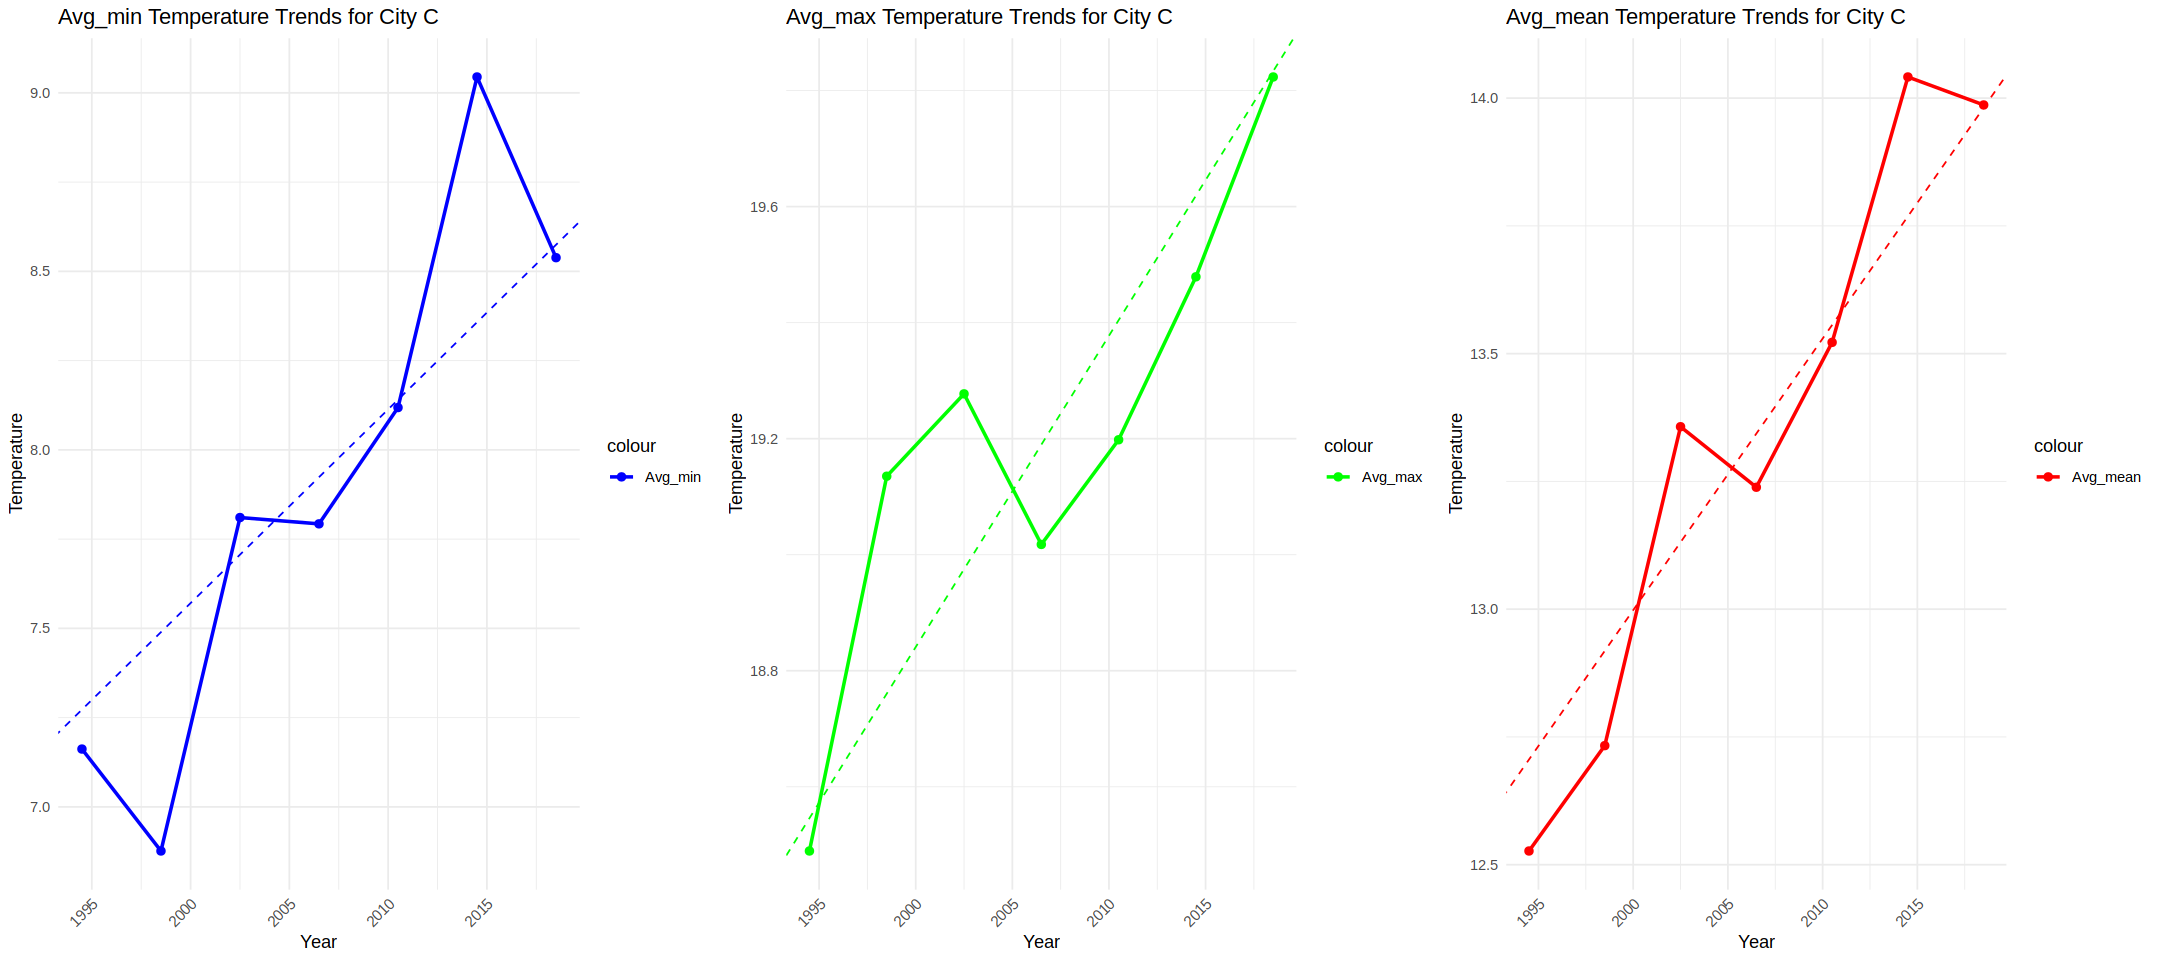

In [32]:
# Access the interval data for city C
interval_data <- interval_data_list$R_interval

# Create a ggplot line plot for Avg_min with points
plot_avg_min <- ggplot(data = interval_data, aes(x = x, group = 1)) +
  geom_line(aes(y = Avg_min, color = "Avg_min"), size = 1) +
  geom_point(aes(y = Avg_min, color = "Avg_min"), size = 2) +
  geom_abline(slope = 0.0542463893587587, intercept = -100.921878055023, color = "blue", linetype = "dashed") +
  labs(title = "Avg_min Temperature Trends for City C",
       x = "Year", y = "Temperature") +
  scale_color_manual(values = c("Avg_min" = "blue")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

                       
# Create a ggplot line plot for Avg_max with points
plot_avg_max <- ggplot(data = interval_data, aes(x = x, group = 1)) +
  geom_line(aes(y = Avg_max, color = "Avg_max"), size = 1) +
  geom_point(aes(y = Avg_max, color = "Avg_max"), size = 2) +
  geom_abline(slope = 0.0536534595556477, intercept = -88.4660341704935 , color = "green", linetype = "dashed") +
  labs(title = "Avg_max Temperature Trends for City C",
       x = "Year", y = "Temperature") +
  scale_color_manual(values = c("Avg_max" = "green")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Create a ggplot line plot for Avg_mean with points
plot_avg_mean <- ggplot(data = interval_data, aes(x = x, group = 1)) +
  geom_line(aes(y = Avg_mean, color = "Avg_mean"), size = 1) +
  geom_point(aes(y = Avg_mean, color = "Avg_mean"), size = 2) +
  geom_abline(slope = 0.0531394032698562, intercept = -93.2807241507832 , color = "red", linetype = "dashed") +
  labs(title = "Avg_mean Temperature Trends for City C",
       x = "Year", y = "Temperature") +
  scale_color_manual(values = c("Avg_mean" = "red")) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Combine the plots using grid.arrange
options(repr.plot.width = 18, repr.plot.height = 8)
grid.arrange(plot_avg_min, plot_avg_max, plot_avg_mean, ncol = 3)


# 3 - Time Series Forecasting for Future Temperature Evolution

An analysis of historical temperature data is performed using time series forecasting techniques to predict future trends. In the analysis the R library "forecast" is used, providing a significant tool for anticipating upcoming events. In particular, t he data have been analyzed using two different methods:
- ARIMA Models (AutoRegressive Integrated Moving Average);
- Holt-Winters Method: forecasting method based on the combination of exponential smoothing and components of trend and seasonality. It is a method specifically designed for time series data that exhibit trends and seasonality. 

**Data preprocessing** <br>
A series of historical temperature data spanning from 1994 to 2022 is considered. The process begins by selecting the city to be studied using the forecast library, followed by structuring the dataset for analysis. The data is formatted into a two-column dataframe structure. In the first column, the year and month are recorded in the 'YYYY-MM' format. The second column contains the temperature values, representing annual mean 'max,' 'min,' or 'mean' temperatures. <br>
The data is converted into a timeseries object.This conversion is a requisite step for seamless interaction with the forecast package in R, facilitating efficient time series analysis and forecasting.

**Forecast with Holt-Winters** <br>
Triple Exponential Smoothing (Holt Winters Method) method is appropriate when trend and seasonality are present in the time series. It decomposes and disentangles the times series down into three components ([1]):

   - Trend: long-term trends embedded within the data.
   - Seasonal: the recurring seasonal patterns contributing to the overall behavior.
   - Random: residual components that deviate from anticipated seasonality or trend patterns.

\begin{align}
F_t &= \alpha \left( \frac{Y_t}{S_{t-p}} \right) + (1 - \alpha) \left( F_{t-1} + T_{t-1} \right) \label{eq:01} \\
S_t &= \gamma \left( \frac{Y_t}{F_t} \right) + (1 - \gamma) S_{t-p} \label{eq:02} \\
T_t &= \beta \left( F_t - F_{t-1} \right) + (1 - \beta) T_{t-1} \label{eq:03} \\
W_{t+m} &= \left( F_{t+m} + T_{t+m} \right) S_{t+m-p} \label{eq:04}
\end{align}
Where,

$F_t = \text{smoothed value of the level of series for period } t \\
F_{t-1} = \text{smoothed value for period } t-1 \\
Y_t = \text{actual value in period } t \\
T_t = \text{Trend estimate} \\
S_t = \text{Seasonality estimate} \\
\alpha = \text{Smoothing constant for the data} \quad (0 < \alpha < 1) \\
\beta = \text{Smoothing constant for the trend estimate} \quad (0 < \beta < 1) \\
\gamma = \text{Smoothing constant for seasonality estimate} \quad (0 < \gamma < 1) \\
p = \text{Number of periods in seasonal cycle} \\
m = \text{Number of periods ahead to be forecast} \\
W_{t+m} = \text{Winters' forecast for } m \text{ periods into the future}.$

**Forecast with Arima** <br>
The temperature forecasting was repeated using the ARIMA method. ARIMA is a more general forecasting method that can handle a wider range of time series data, including those without strong trends or seasonality. It's a combination of autoregressive (AR) and moving average (MA) components, and it includes differencing to make the data stationary.
The Seasonal ARIMA model is defined by three key parameters:

   - P (Seasonal Autoregressive Terms):
    number of seasonal autoregressive terms included in the model. Autoregressive terms indicates how many previous observations from the same season are considered in predicting the current value.

   - D (Seasonal Differences):
    number of seasonal differences applied to the time series. Differences are used to make the data stationary, which can simplify the modeling process. 

   - Q (Seasonal Moving-Average Terms):
    number of seasonal moving-average terms incorporated into the model. Q indicates how many past forecast errors from the same season are considered in predicting the current value.
    
The function auto.arima() is used to dedect these parameters automatically.

**Goodness of Fit** <br>
Forecast package also allows us to calculate the quality of our predictions, by computing the residuals, meaning the observed values minus the predicted values for each data point. In order to evaluate our model we check for correlations between forecast errors. If forecast errors are correlated, it indicates that the model is not capturing certain patterns or dependencies in the data, which could lead to biased or inefficient forecasts. 
In order to evaluate the correlation between residuals one can use the Ljung-Box test.
The Ljung-Box test is a diagnostic tool that helps determine if the residuals (errors) from a time series model exhibit significant autocorrelation at different lags.  As long as we score a p-value > 0.05, there is a 95% chance the residuals are independent. Finally, it’s useful to check the histogram of the residuals to ensure a normal distribution. If the residuals are heavily skewed, then our model may be consistently overshooting in one direction.

[1]: Gundalia, M. J., & Dholakia, M. B. (Year). Prediction of maximum/minimum temperatures using Holt Winters Method with Excel Spread Sheet for Junagadh Region. 


In [8]:
library(forecast)
library(dplyr)
library(tsibble)
library(tidyr)
library(htmltools) #interactive widget
library(IRdisplay)
library(shiny)
source("foo.R")

### 4.0 Choiche of the city

In [9]:
# visualize widget
choices <- c("Castelfranco veneto", "Porto Tolle", "Roverchiara", "Agordo")
create_radio_widget(choices)

Seleziona una città: 
 
 
 
 
 Castelfranco veneto 
 
 
 
 
 
 Porto Tolle 
 
 
 
 
 
 Roverchiara 
 
 
 
 
 
 Agordo

In [39]:
selected_option

[1] "Porto Tolle"

### 4.1 Data Setup

In [40]:
dictionary <- c("Castelfranco veneto"="C", "Porto Tolle"="P", "Roverchiara"="R", "Agordo"="A")
dataset_name <- dictionary[selected_option] #dataset name
dataset <- drop_na(get(dataset_name))        #get the dataset
dataset[1:4,]

Date       tmin tmean   tmax
1 1993-01-01 -0.3  2.6604 4.7 
2 1993-01-02 -2.3 -1.1208 0.7 
3 1993-01-03 -1.5 -0.4698 1.2 
4 1993-01-04 -4.4 -1.1708 2.0

### 4.2 Converting to a time series
The chosen dataset is first subjected to preprocessing, which will make the transformation into a time series easier, and consequently the application of the library. In particular, the monthly means of all three indicators are calculated. Additionally, a time index of the 'year-month' date format is created, encapsulating the data related to that specific month of the given year.

Then the selected data is converted to a time series, meaning a sequence of data points collected at successive, equally spaced time intervals. This will make it easier to predict future outcomes via forecasting package.

In [41]:
#preprocessing: average data over a month
process_data <- function(data) {
    "this function average data in a month and prepare
       them to be processed into timeseries"
    processed_data <- data %>%
    filter(!is.na(Date)) %>%
    mutate(year = lubridate::year(Date),
           month = lubridate::month(Date)) %>%
    group_by(year, month) %>%
    summarize(tmin_media_mensile = mean(tmin, na.rm = TRUE), #compute monthly means
              tmean_media_mensile = mean(tmean, na.rm = TRUE),
              tmax_media_mensile = mean(tmax, na.rm = TRUE),
              .groups = "drop") %>%
    mutate(year = as.integer(year), month = as.integer(month)) %>%
    mutate(yearmonth = as.Date(paste(year, month, '01', sep="-"), format="%Y-%m-%d")) #time index
  
  return(processed_data)
}

# Call the function with the selected dataset
dataset_processed <- process_data(dataset)

#for simplicity filter out the last (incomplete) year
dataset_processed <- dataset_processed[as.numeric(dataset_processed$year) != 2022, , , , , ]
dataset_processed

year month tmin_media_mensile tmean_media_mensile tmax_media_mensile
1   1993  1    -0.7870968          1.982635            5.500000         
2   1993  2    -3.6337821          1.947561            8.909075         
3   1993  3     1.4129032          6.085652           11.470968         
4   1993  4     6.4600000         11.445513           16.250000         
5   1993  5    11.8612903         18.055177           24.045161         
6   1993  6    15.8866667         21.331813           26.313333         
7   1993  7    15.4419355         21.708077           27.638710         
8   1993  8    17.7903226         23.742274           29.841935         
9   1993  9    13.1800000         18.368537           23.543333         
10  1993 10    10.3193548         14.217490           18.409677         
11  1993 11     4.2091833          7.188293           10.347527         
12  1993 12     0.1225806          3.330477            7.590323         
13  1994  1     0.7903226          4.556184            8.638710         
14  1994  2     1.0071429          4.687171            8.532143         
15  1994  3     4.9612903         10.456794           16.748387         
16  1994  4     7.4133333         11.822913           16.446667         
17  1994  5    11.7193548         17.157365           21.906452         
18  1994  6    15.8333333         21.040527           25.990000         
19  1994  7    19.3032258         25.285897           30.800000         
20  1994  8    19.9354839         25.295332           30.848387         
21  1994  9    15.2000000         19.702300           24.720000         
22  1994 10     9.2419355         13.441339           18.216129         
23  1994 11     8.2100000         10.363163           12.726667         
24  1994 12     2.6483871          5.080342            7.593548         
25  1995  1    -1.0064516          2.966200            7.190323         
26  1995  2     1.7245821          5.696868           10.105375         
27  1995  3     2.5677419          7.469090           12.306452         
28  1995  4     6.4900000         11.403267           16.270000         
29  1995  5    11.7193548         16.625339           21.483871         
30  1995  6    14.2300000         19.088890           24.003333         
⋮   ⋮    ⋮     ⋮                  ⋮                   ⋮                 
319 2019  7    19.78122581        25.342910           30.876845         
320 2019  8    20.38670000        25.124316           30.454290         
321 2019  9    15.39000000        20.031670           25.506667         
322 2019 10    12.58064516        16.658706           21.551613         
323 2019 11     8.22333333        11.693093           14.956667         
324 2019 12     2.82903226         6.577400           10.803226         
325 2020  1     0.82580645         4.229213            9.022581         
326 2020  2     2.58965517         7.676438           13.486207         
327 2020  3     4.65483871         9.541271           14.396774         
328 2020  4     7.51666667        14.029527           20.713333         
329 2020  5    12.94838710        18.523858           23.638710         
330 2020  6    16.59333333        21.842680           27.410000         
331 2020  7    18.39354839        24.185558           29.832258         
332 2020  8    19.75468387        24.862565           30.511555         
333 2020  9    15.31666667        20.521570           26.330000         
334 2020 10     9.50322581        13.886565           18.883871         
335 2020 11     6.26666667         9.572020           13.720000         
336 2020 12     4.04838710         6.911461           10.029032         
337 2021  1    -0.01290323         3.705216            7.793548         
338 2021  2     3.31785714         7.295393           12.028571         
339 2021  3     2.37096774         8.647752           14.674194         
340 2021  4     6.16333333        11.457747           16.696667         
341 2021  5    11.62258065        16.803161           21.79032

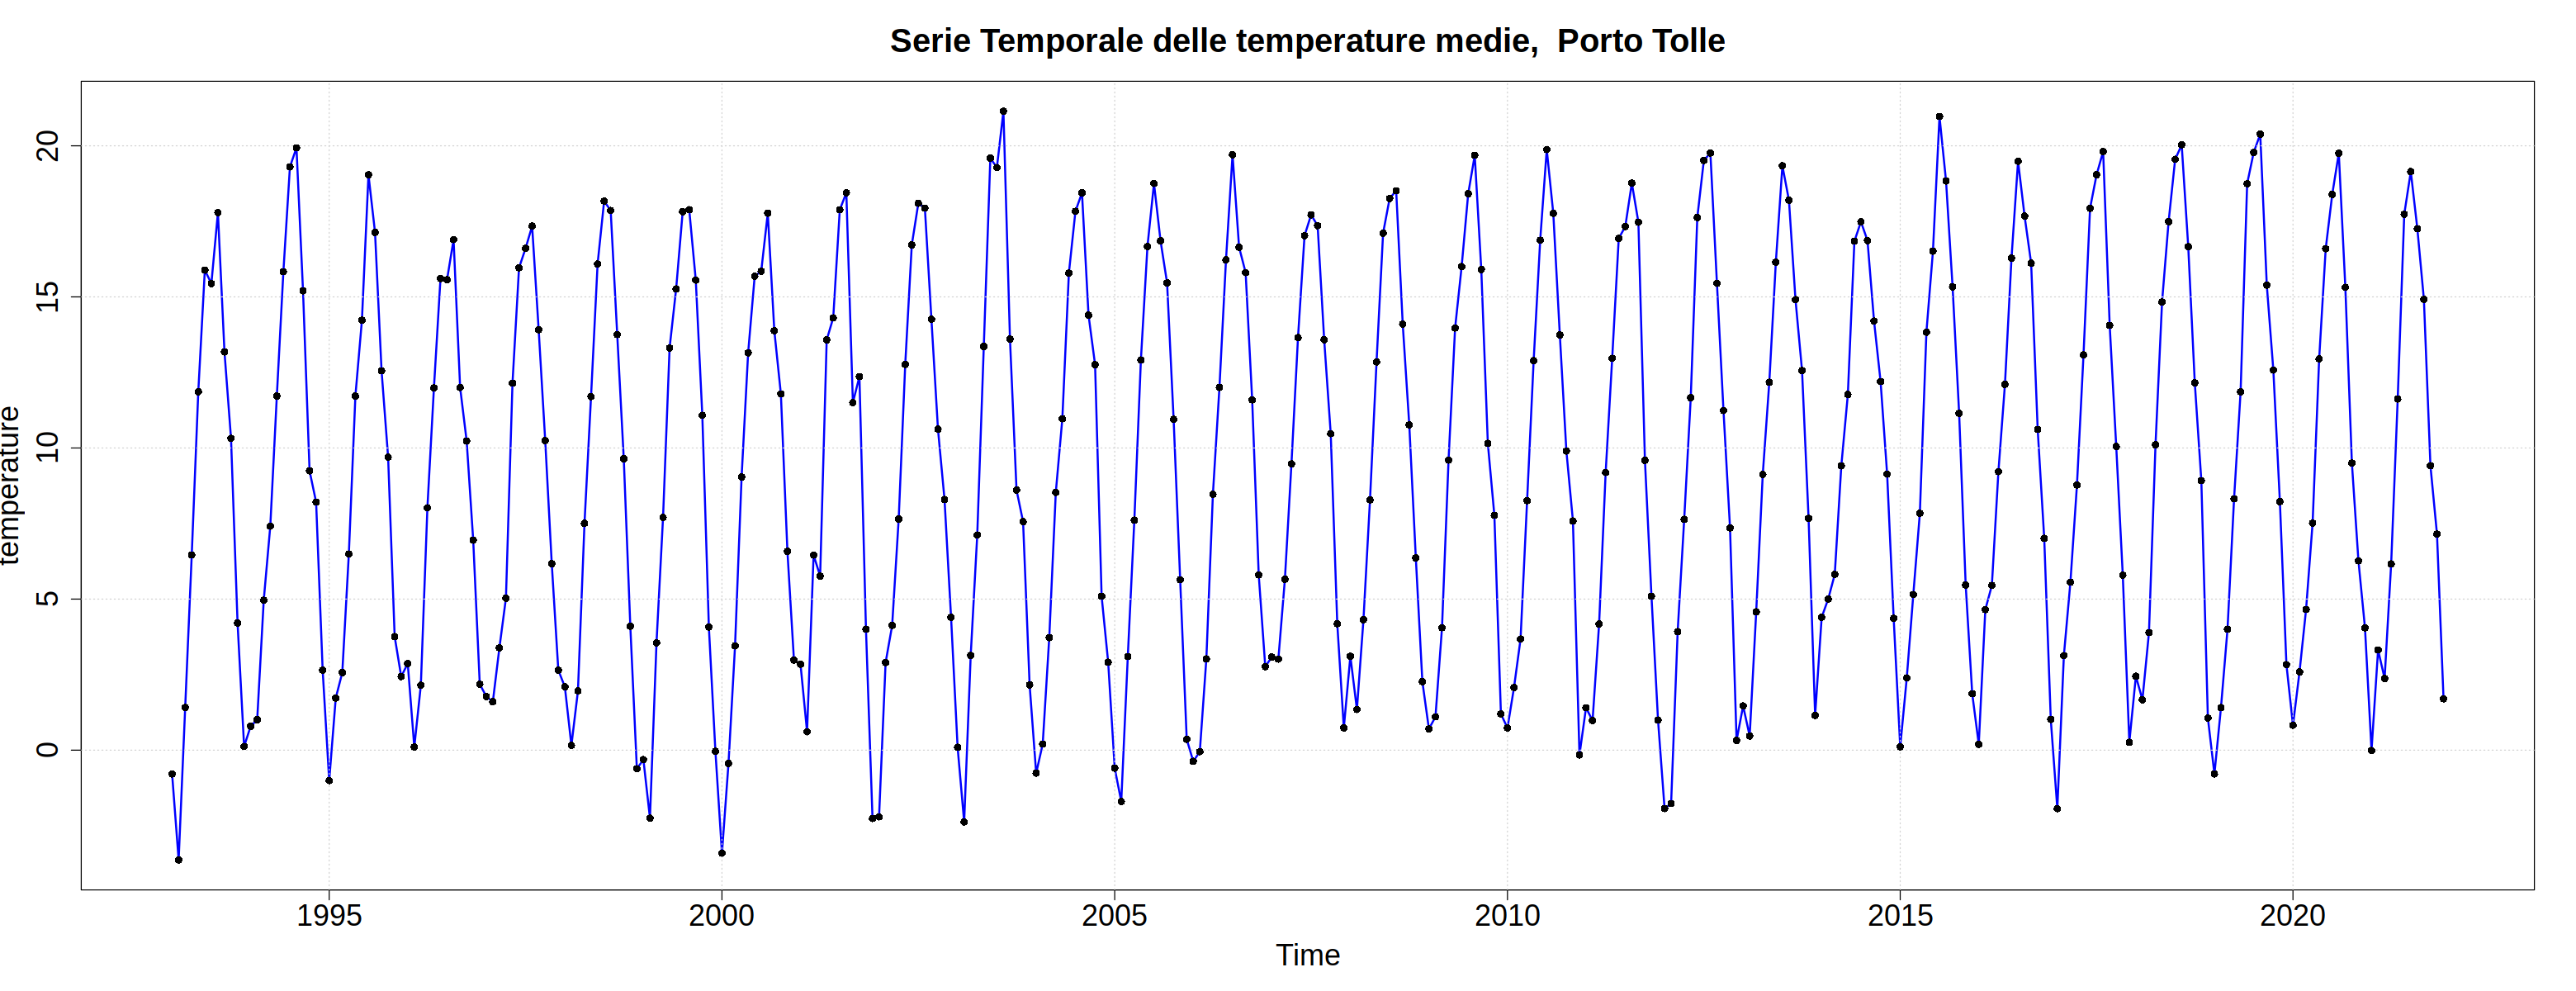

In [42]:
# Convert data_processed to a ts object
time_series <- ts(dataset_processed$tmin_media_mensile, frequency = 12, start = c(1993,1))

# time series plot
options(repr.plot.width = 26, repr.plot.height = 10)
par(cex.lab = 1.8, cex.main = 2, cex.axis=1.8)
plot(time_series, type = "l",
     xlab = "Time", ylab = "temperature", main = paste("Serie Temporale delle temperature medie, ",selected_option), 
     col = "blue", lwd = 2)  
grid()
lines(time_series, type = "p", col = "black", pch = 16)  

### 4.3 Decomposing
The time series is decomposed into its components of trend, seasonality, and residuals.

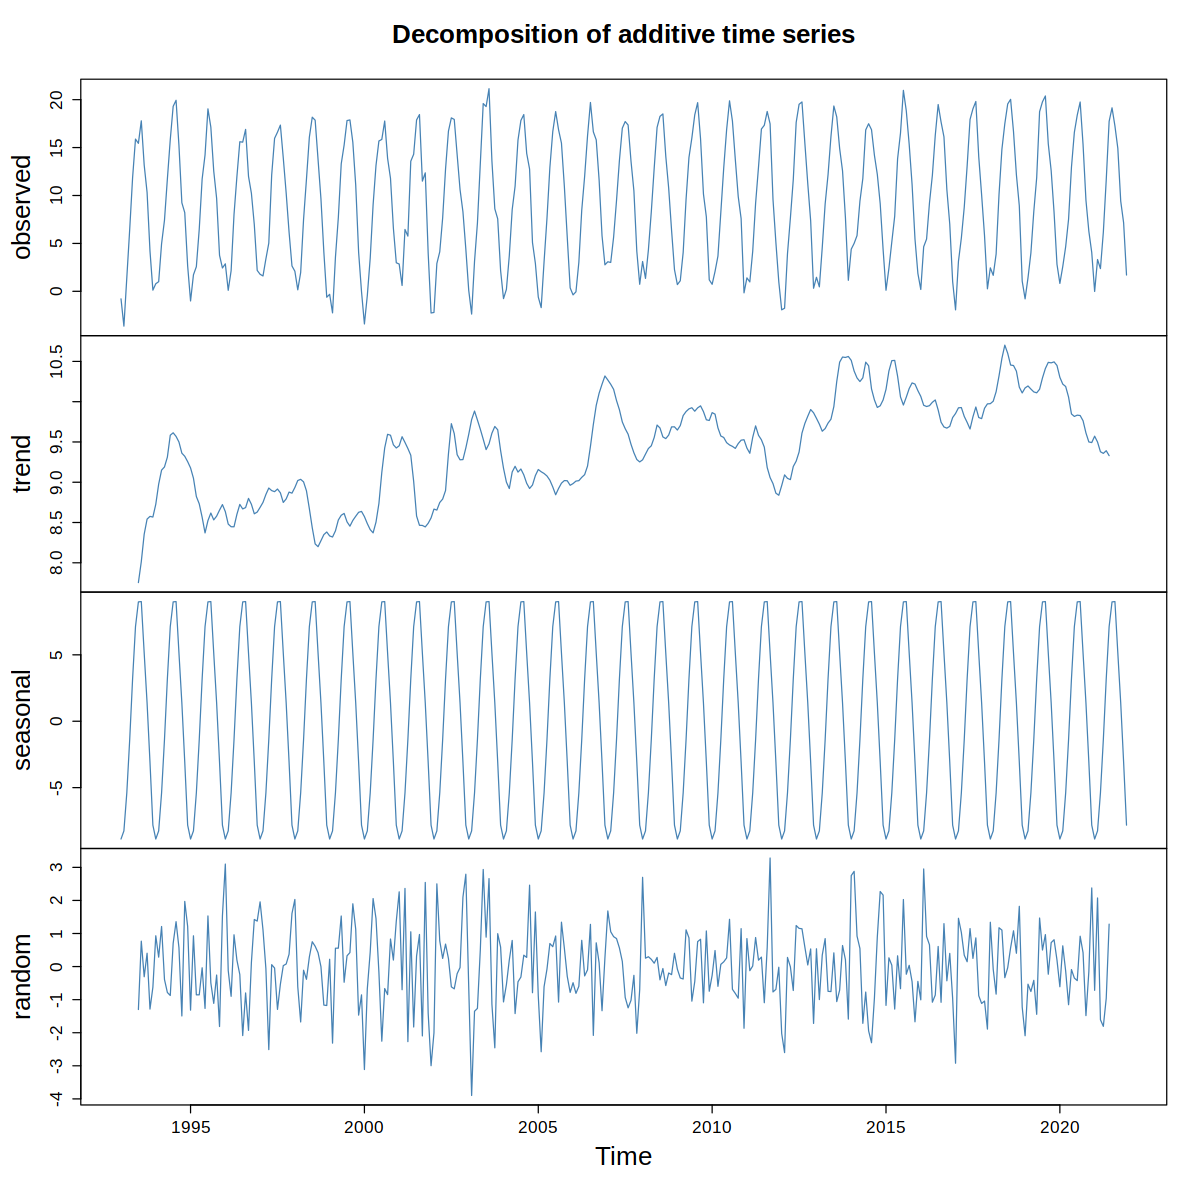

In [43]:
time_series_ts <- as.ts(time_series)
Ctimeseriescomponents <- decompose(time_series_ts)

options(repr.plot.width = 10, repr.plot.height = 10)
par(cex.lab = 1.3, cex.main = 1.3, cex.axis=1.3)
plot(Ctimeseriescomponents, col='steelblue')

### 4.4 Fitting with Holt-Winters

In [15]:
modello_hw <- hw(time_series, seasonal= "additive", seasonal.periods = 12,  h = 6 * 12)
fit <- forecast(modello_hw)

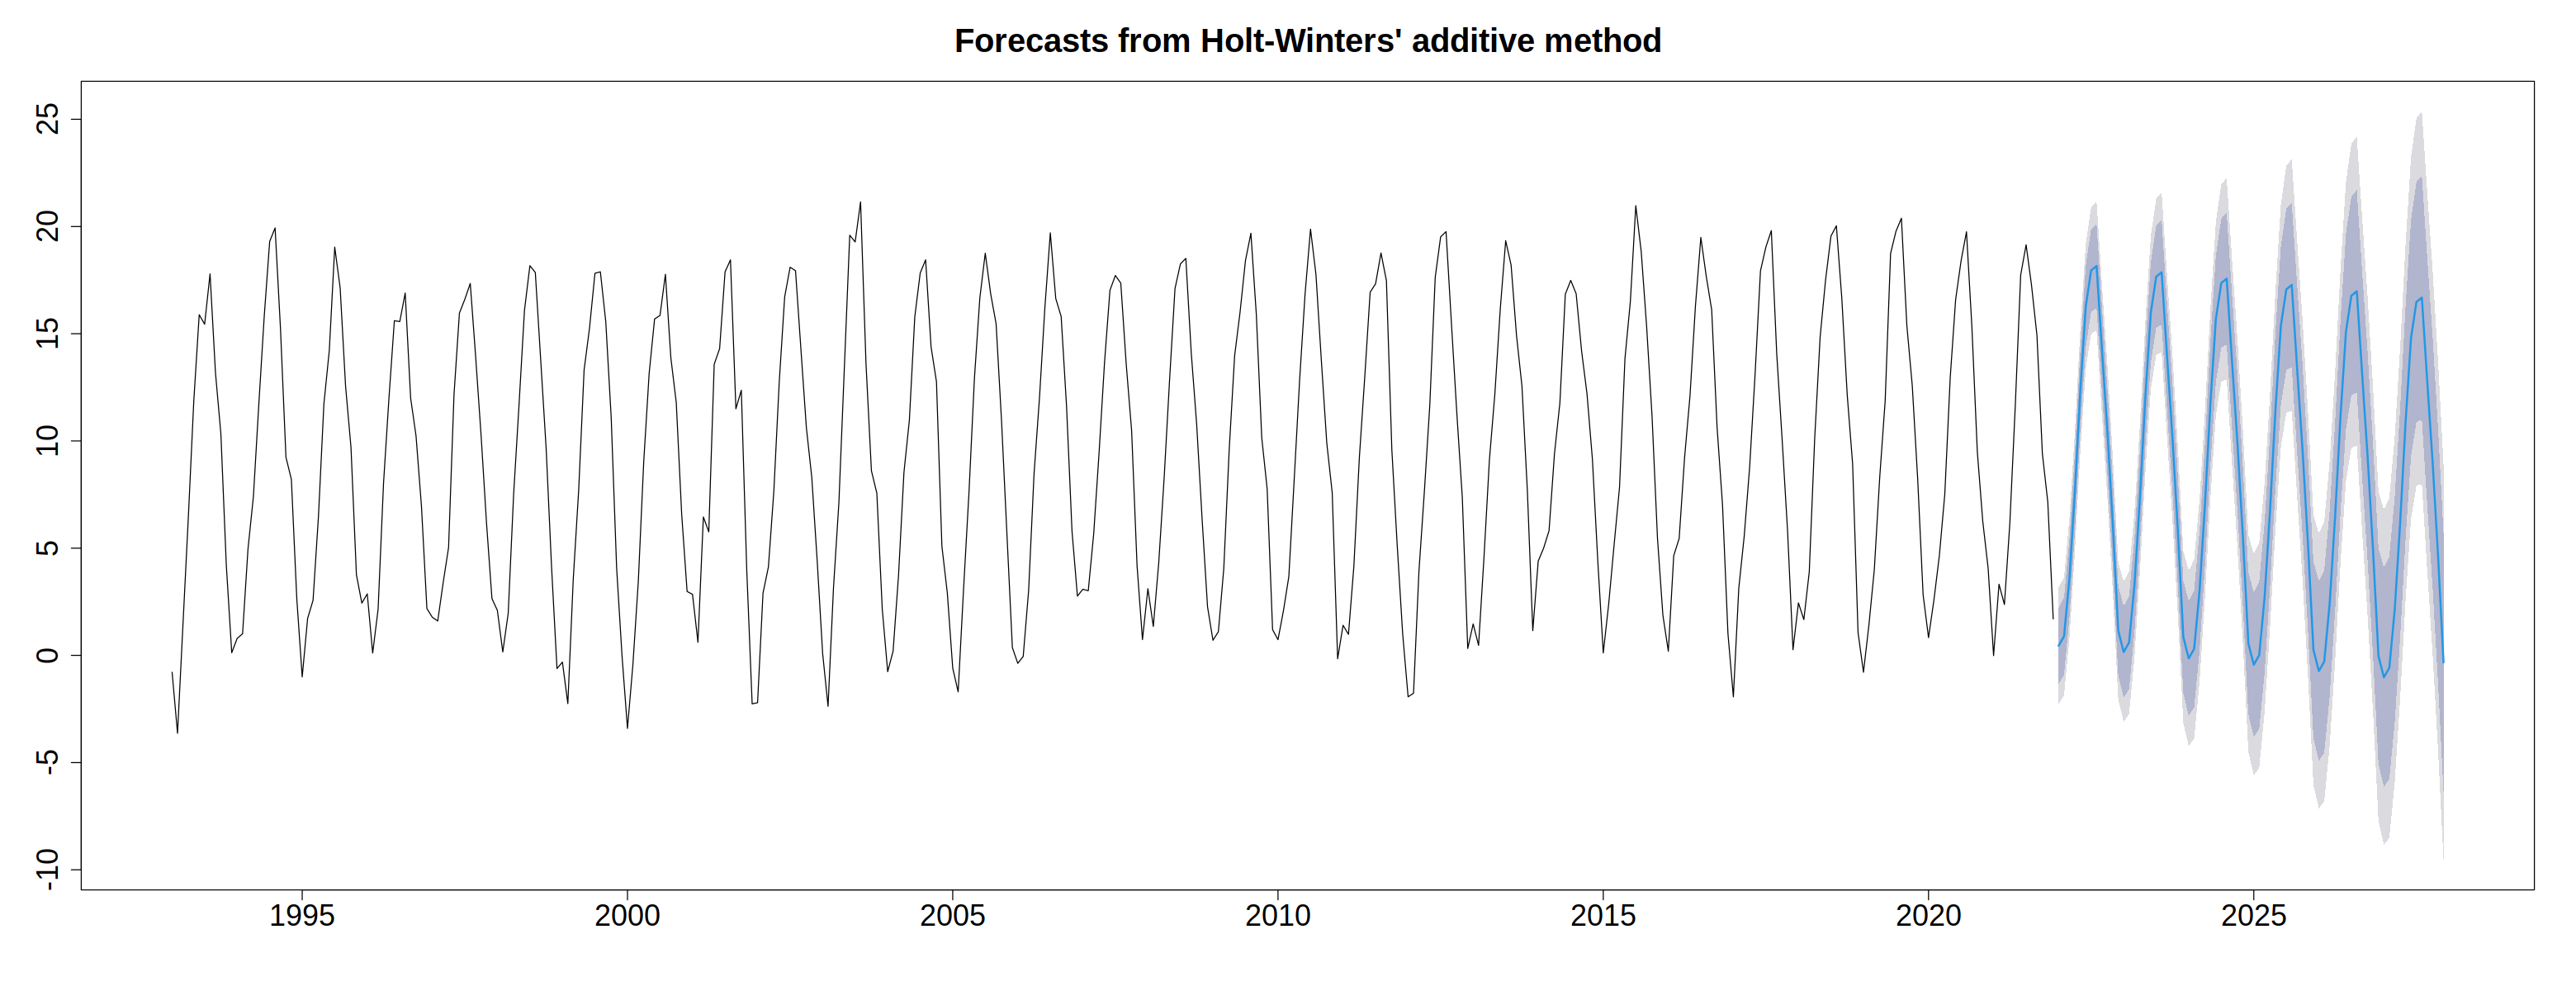

In [29]:
options(repr.plot.width = 26, repr.plot.height = 10)
par(cex.lab = 1.8, cex.main = 2, cex.axis=1.8)
souvenirtimeseriesforecasts <- forecast::hw(time_series, h=12*6,seasonal= "additive",)
plot(souvenirtimeseriesforecasts)

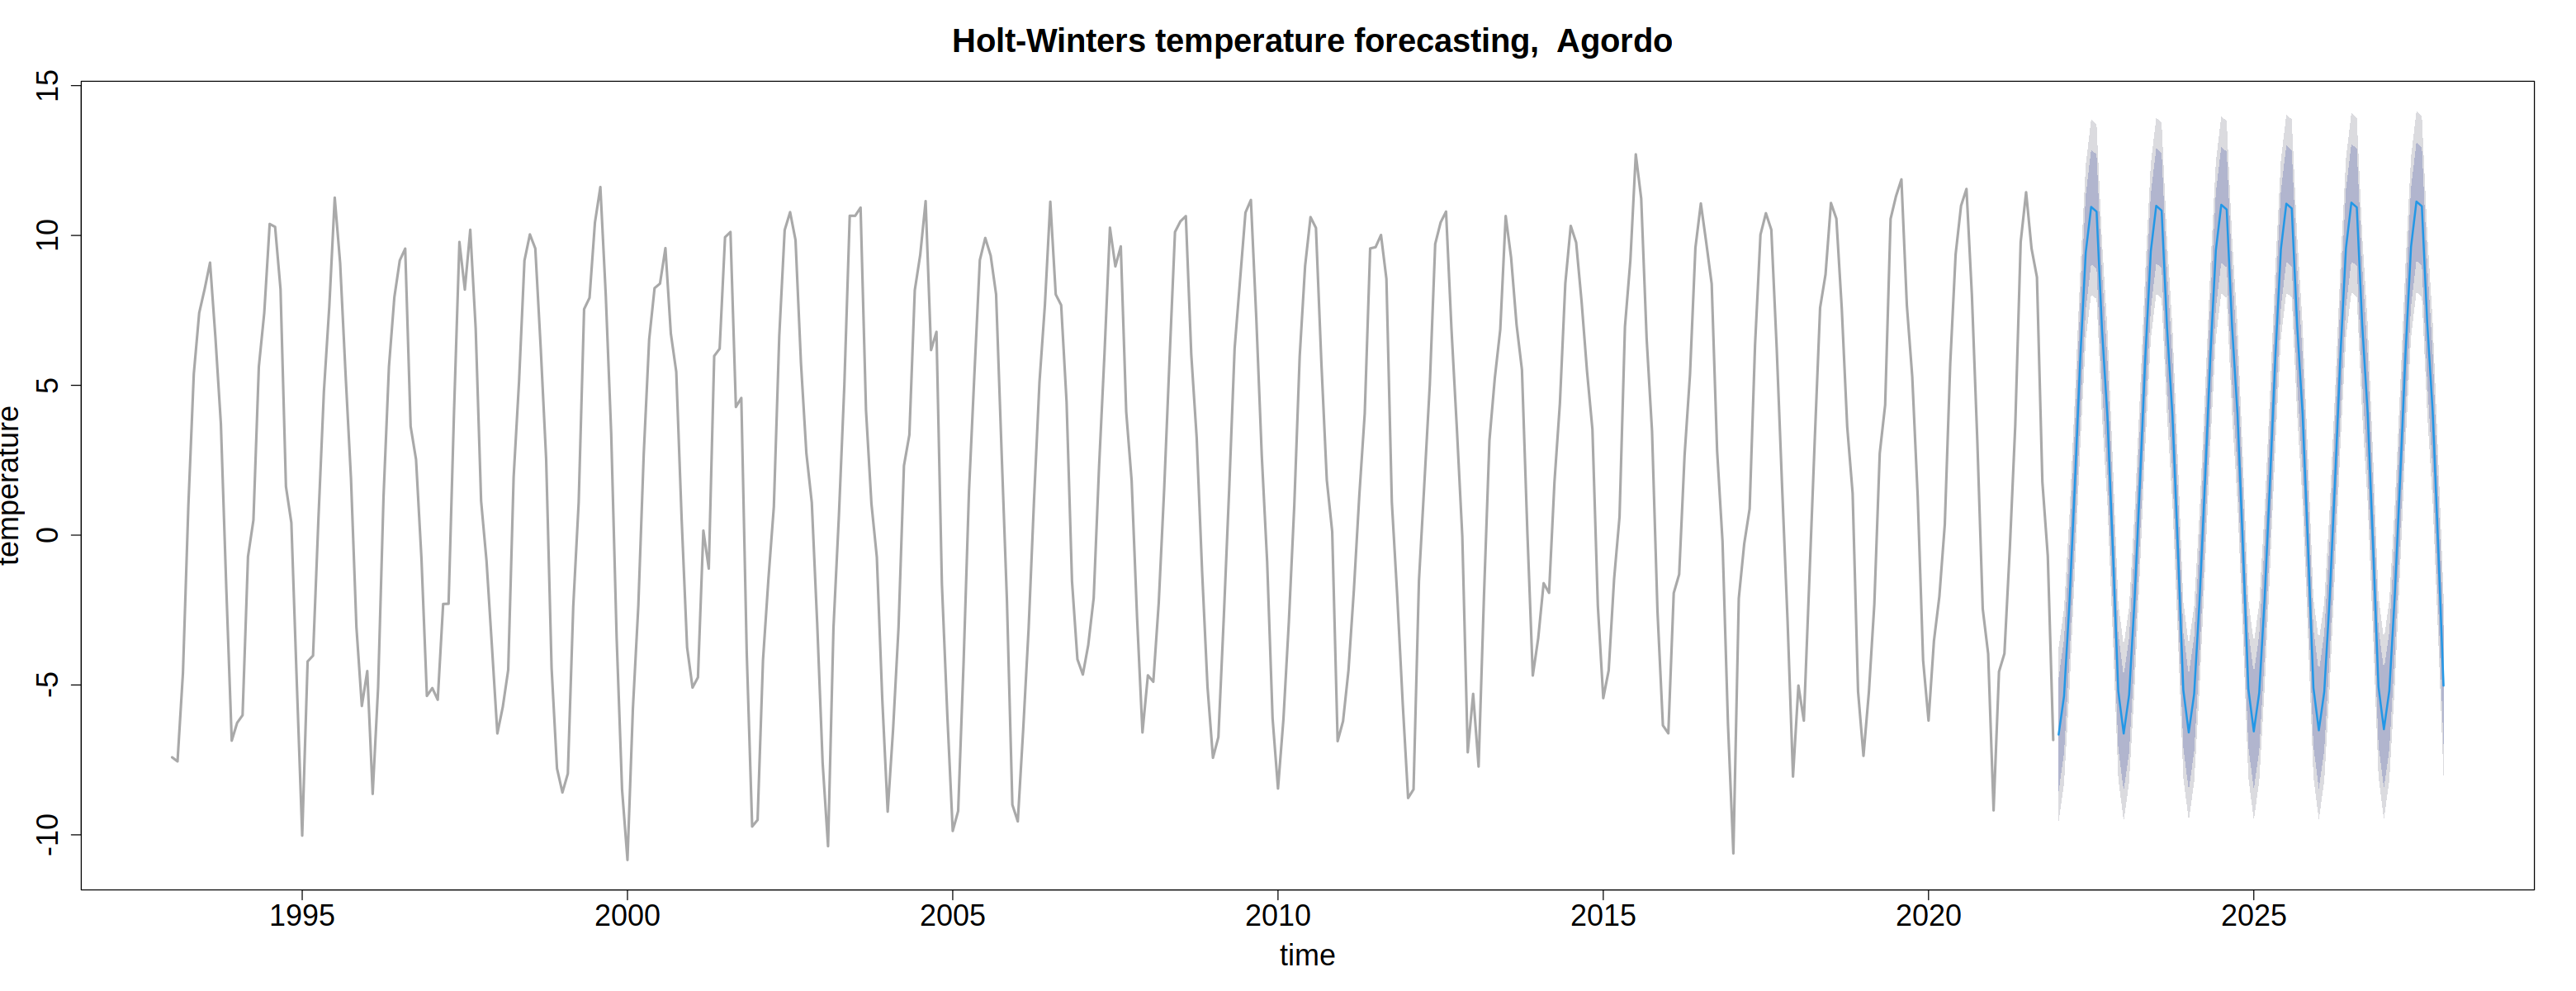

In [22]:
#plot
options(repr.plot.width = 26, repr.plot.height = 10)
par(cex.lab = 1.8, cex.main = 2, cex.axis=1.8)
plot(fit, xlab = "time", ylab = "temperature", 
     main = paste(" Holt-Winters temperature forecasting, ",selected_option), 
     col = "darkgrey", lwd = 2.5) 

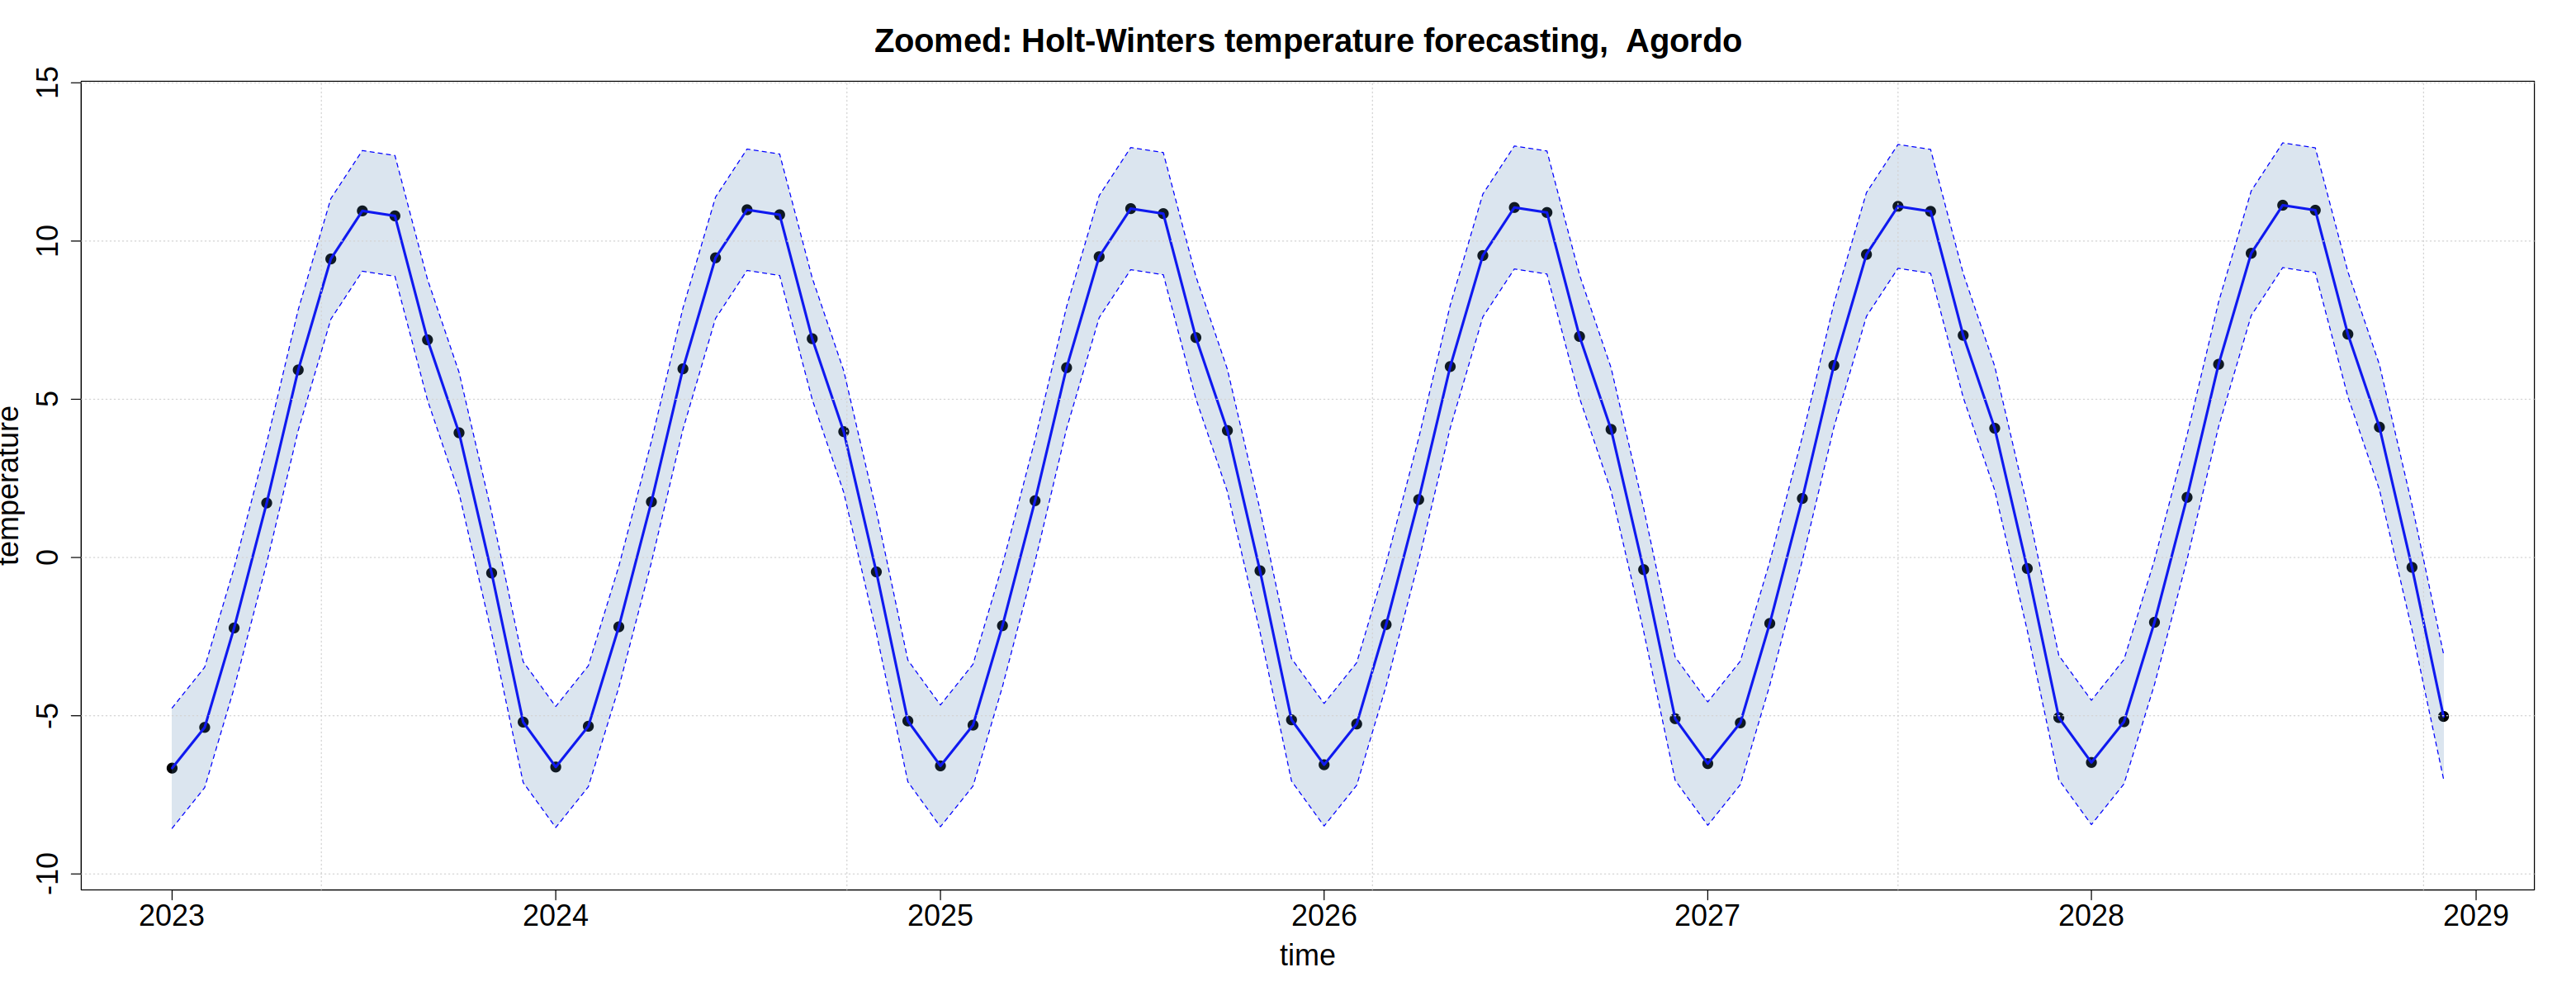

In [23]:
#zoomed plot
start_date <- as.Date("2023-01-01")
end_date <- as.Date("2028-12-01")
time_sequence <- seq(start_date, end_date, by = "months")

point_forecasts <- fit$mean
lower_intervals <- fit$lower[, "80%"]
upper_intervals <- fit$upper[, "80%"]

x_limits <- c(start_date, end_date)
y_limits <- c(min(lower_intervals)-1, max(upper_intervals)+1)  # You might want to adjust this based on your data

# Plot the zoomed point forecasts
options(repr.plot.width = 26, repr.plot.height = 10)
par(cex.lab = 1.8, cex.main = 2, cex.axis=1.8)
plot(time_sequence, point_forecasts, type = 'p',pch=20, cex=2, xlab = "time", ylab = "temperature", 
     main = paste("Zoomed: Holt-Winters temperature forecasting, ",selected_option),
     xlim = x_limits, ylim = y_limits)

lines(time_sequence, point_forecasts, col = "blue", lwd = 2.5)

# Add shaded area for the 80% prediction interval
polygon(c(time_sequence, rev(time_sequence)),
        c(lower_intervals, rev(upper_intervals)),
        col = rgb(0.3, 0.5, 0.7, alpha = 0.2), border = NA)

grid()

#add the lower and upper intervals as lines 
lines(time_sequence, lower_intervals, col = "blue", lty = 2)
lines(time_sequence, upper_intervals, col = "blue", lty = 2)

In [24]:
#compute annual mean of forecast temperature
forecast_mean_temp <- data.frame(year = as.numeric(floor(time(point_forecasts))),
                      month = rep(1:12, length.out = length(point_forecasts)),
                      tmin_media_mensile = as.vector(point_forecasts))

forecast_mean_temp <- forecast_mean_temp %>% mutate(year = as.integer(year), month = as.integer(month)) %>%
                      mutate(yearmonth = as.Date(paste(year, month, '01', sep="-"), format="%Y-%m-%d")) #time index

forecast_mean_temp <- forecast_mean_temp %>%               
                      group_by(year) %>%
                      summarize(tmin_media_annuale = mean(tmin_media_mensile, na.rm = TRUE))
                         

In [25]:
#compute annual mean of dataset temperature
data_mean_annual <- dataset_processed %>%               
                      group_by(year) %>%
                      summarize(tmin_media_annuale = mean(tmin_media_mensile, na.rm = TRUE))                   

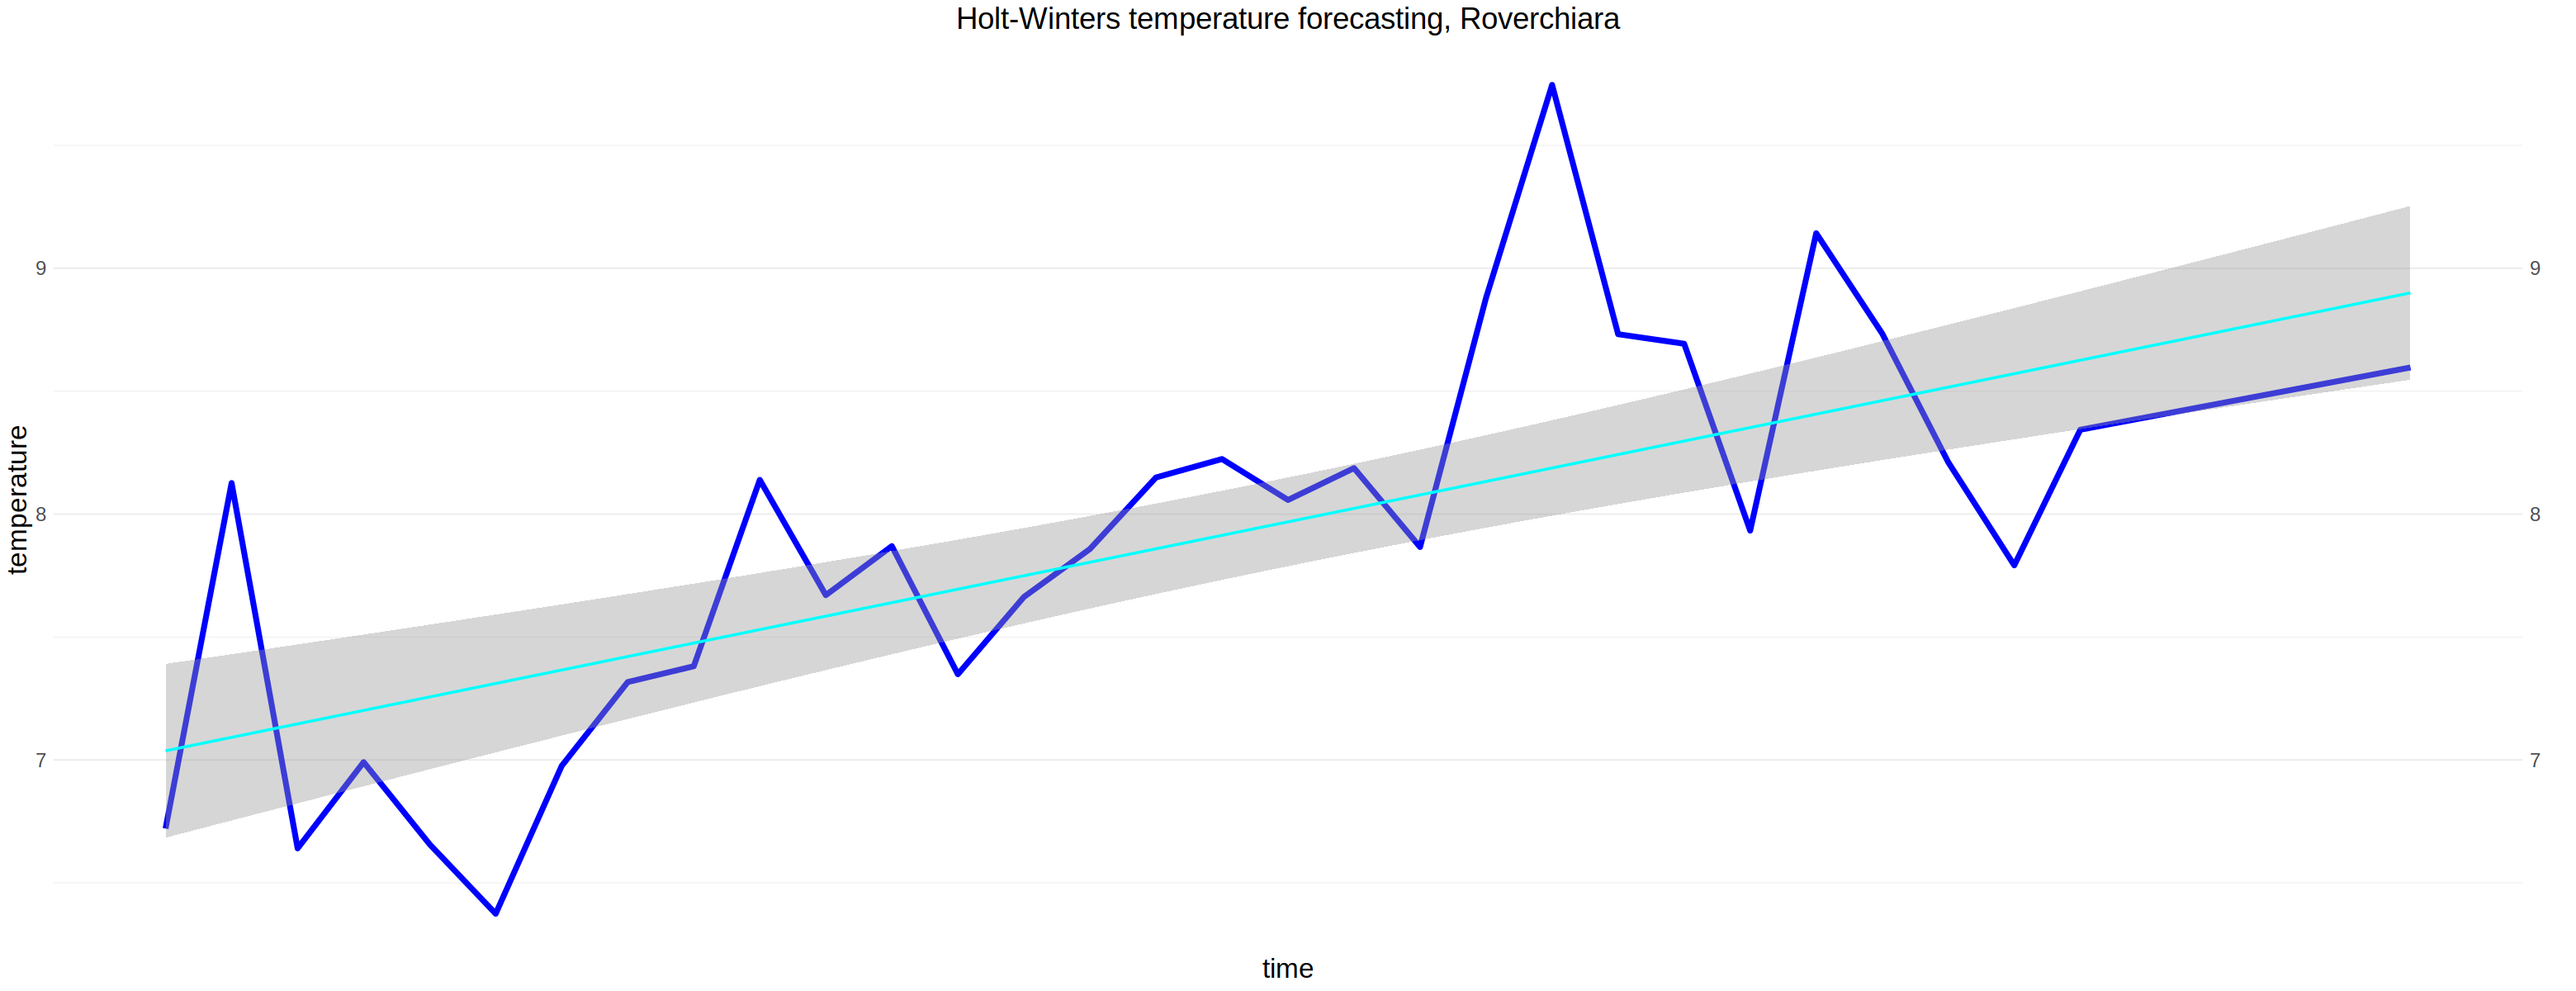

In [47]:
#concatenate annual temperatures (with forecast added)
concatenated_df <- rbind(data_mean_annual, forecast_mean_temp)

#plot
options(repr.plot.width = 26, repr.plot.height = 10)
ggplot(concatenated_df, aes(x = year)) +
  geom_line(aes(y = tmin_media_annuale), color = "blue", linewidth = 2) +
  geom_smooth(aes(y = tmin_media_annuale), method = 'lm', formula = y ~ x, color = "cyan") +
  labs(x = "time", y = "temperature",
       title = paste("Holt-Winters temperature forecasting,", selected_option)) +
  theme_minimal() +
  theme(text = element_text(size = 18),
        plot.title = element_text(size = 22, hjust = 0.5),
        axis.title = element_text(size = 20),
        legend.position = "bottom") +
  scale_x_continuous(breaks = time) +
  scale_y_continuous(sec.axis = sec_axis(~., name = ""))


### 4.5 Forecast Evaluation


	Box-Ljung test

data:  souvenirtimeseriesforecasts$residuals
X-squared = 34.843, df = 20, p-value = 0.02095


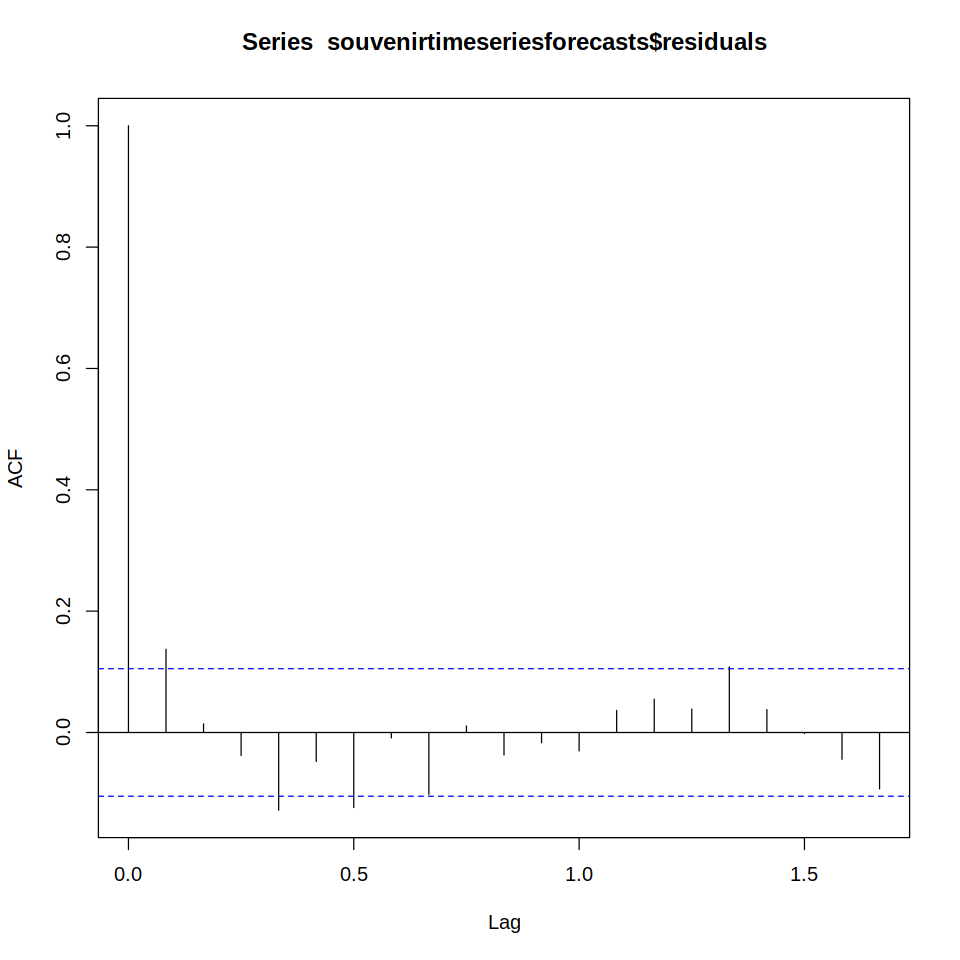

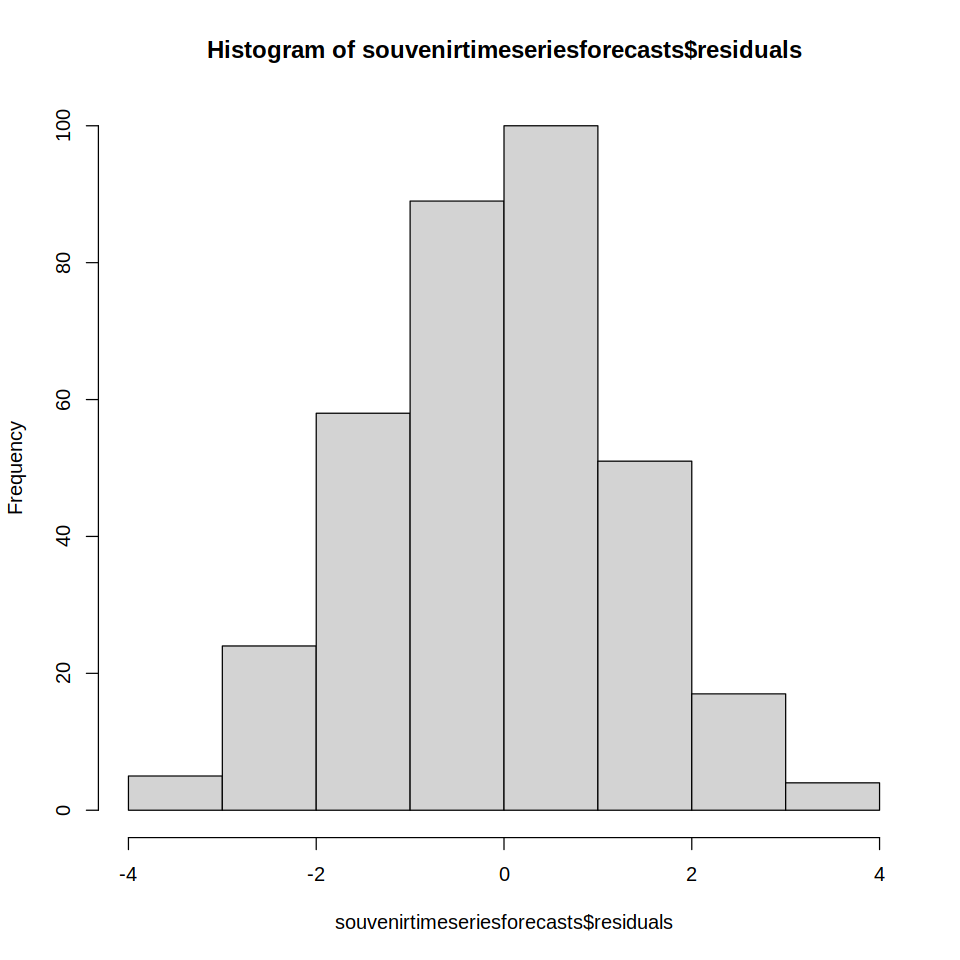

In [30]:
options(repr.plot.width = 8, repr.plot.height = 8)
acf(souvenirtimeseriesforecasts$residuals, lag.max=20, na.action=na.pass)
Box.test(souvenirtimeseriesforecasts$residuals, lag=20, type="Ljung-Box")
hist(souvenirtimeseriesforecasts$residuals)

froma a site
Interpretation: The Box-Ljung test is a statistical test used to determine whether a set of autocorrelations of a time series are significantly different from zero.

Null hypothesis: The autocorrelations of the residuals up to a certain lag are not significantly different from zero.

Alternative hypothesis: At least one of the autocorrelations is different from zero.

The output shows that the test statistic X-squared is 17.53 and the degrees of freedom is 20. The p-value is 0.09319, which is lower than the commonly used significance level of 0.05. This means that we fail to reject the null hypothesis, and we can conclude that the autocorrelations of the residuals up to a certain lag are not significantly different from zero. Therefore, we can assume that the residuals are independent and identically distributed, which is one of the assumptions of the Holt-Winters forecast model.

The correlogram shows that the sample autocorrelation for the forecast errors exceeds the significance bounds at certain lags (R plots 95% significance boundaries as blue dotted lines). Ideally, for non-zero lag, the ACF bars are within the blue range bars shown below. 
When we carry out the Ljung-Box test, the p-value is always of order $10^{-2}$, indicating that there is significant evidence for non-zero correlations at lags 1-20.
 
Finally the histogram indicates that the forecast error distribution is centered around zero and approximately follows a normal distribution. Although there is a slight rightward skew compared to a standard normal curve, this skew is minimal. Consequently, it is reasonable to assume that the forecast errors are normally distributed with a mean of zero.

Thus, the ACF plot shows that there is little evidence of autocorrelations in the forecast errors, while the Ljung-Box test and histogram of forecast errors show that it is plausible that the forecast errors are normally distributed with mean zero and constant variance. Therefore, we can conclude that Holt’s smoothing provides an adequate predictive model for temperatures in Veneto.

### 4.6 Forecast with ARIMA

In [31]:
#compute annual mean of dataset temperature
data_mean_annual <- dataset_processed %>%               
                      group_by(year) %>%
                      summarize(tmin_media_annuale = mean(tmin_media_mensile, na.rm = TRUE),
                               tmean_media_annuale = mean(tmean_media_mensile, na.rm = TRUE),
                               tmax_media_annuale = mean(tmax_media_mensile, na.rm = TRUE))
data_mean_annual

year tmin_media_annuale tmean_media_annuale tmax_media_annuale
1  1993  7.688613          12.45029            17.48834          
2  1994  9.688651          14.07411            18.59726          
3  1995  8.362159          12.91925            17.71375          
4  1996  8.713962          13.06473            17.44643          
5  1997  8.902376          13.57392            18.42766          
6  1998  8.535274          13.37342            18.42778          
7  1999  8.636953          13.28208            18.22610          
8  2000  8.861319          13.84493            19.05075          
9  2001  8.791022          13.66842            18.92120          
10 2002  9.630986          13.94193            18.45249          
11 2003  9.441008          14.13606            18.76742          
12 2004  9.157203          13.49138            17.87745          
13 2005  8.835170          13.05334            17.47679          
14 2006  9.301034          13.85609            18.67137          
15 2007  9.663466          14.51695            19.59597          
16 2008  9.773424          14.49448            19.41436          
17 2009  9.880351          14.44947            19.21531          
18 2010  9.434742          13.64846            18.01336          
19 2011  9.575046          14.27933            19.33153          
20 2012  9.233537          14.00811            19.13379          
21 2013  9.816829          14.02813            18.48728          
22 2014 10.624195          14.93625            19.39924          
23 2015  9.955124          14.47440            19.26705          
24 2016  9.985843          14.34333            18.90531          
25 2017  9.629415          14.26898            19.35493          
26 2018 10.735268          14.97508            19.66622          
27 2019 10.227921          14.83701            19.90430          
28 2020  9.867655          14.64856            19.83119          
29 2021  9.232321          14.14552            19.25965

In [32]:
time_series <- ts(data_mean_annual$tmin_media_annuale, frequency = 1, start = 1993)
time_series

A Time Series:
 [1]  7.688613  9.688651  8.362159  8.713962  8.902376  8.535274  8.636953
 [8]  8.861319  8.791022  9.630986  9.441008  9.157203  8.835170  9.301034
[15]  9.663466  9.773424  9.880351  9.434742  9.575046  9.233537  9.816829
[22] 10.624195  9.955124  9.985843  9.629415 10.735268 10.227921  9.867655
[29]  9.232321

In [31]:
auto.arima(time_series, trace=TRUE) 


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2)(1,1,1)[12] with drift         : 1259.012
 ARIMA(0,0,0)(0,1,0)[12] with drift         : 1433.953
 ARIMA(1,0,0)(1,1,0)[12] with drift         : 1328.613
 ARIMA(0,0,1)(0,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(0,1,0)[12]                    : 1431.954
 ARIMA(2,0,2)(0,1,1)[12] with drift         : Inf
 ARIMA(2,0,2)(1,1,0)[12] with drift         : 1330.362
 ARIMA(2,0,2)(2,1,1)[12] with drift         : 1241.754
 ARIMA(2,0,2)(2,1,0)[12] with drift         : 1293.276
 ARIMA(2,0,2)(2,1,2)[12] with drift         : 1228.324
 ARIMA(2,0,2)(1,1,2)[12] with drift         : Inf
 ARIMA(1,0,2)(2,1,2)[12] with drift         : Inf
 ARIMA(2,0,1)(2,1,2)[12] with drift         : 1228.474
 ARIMA(3,0,2)(2,1,2)[12] with drift         : 1230.998
 ARIMA(2,0,3)(2,1,2)[12] with drift         : 1230.461
 ARIMA(1,0,1)(2,1,2)[12] with drift         : Inf
 ARIMA(1,0,3)(2,1,2)[12] with drift         : Inf
 ARIMA(3,0,1)(2,1,2)[12] with drif

Series: time_series 
ARIMA(2,0,2)(2,1,0)[12] with drift 

Coefficients:
         ar1      ar2      ma1     ma2     sar1     sar2  drift
      0.8097  -0.4701  -0.5827  0.4064  -0.6571  -0.3019  0.002
s.e.  0.7615   0.1801   0.7370  0.2416   0.0545   0.0536  0.005

sigma^2 = 2.884:  log likelihood = -654.11
AIC=1324.22   AICc=1324.66   BIC=1354.76

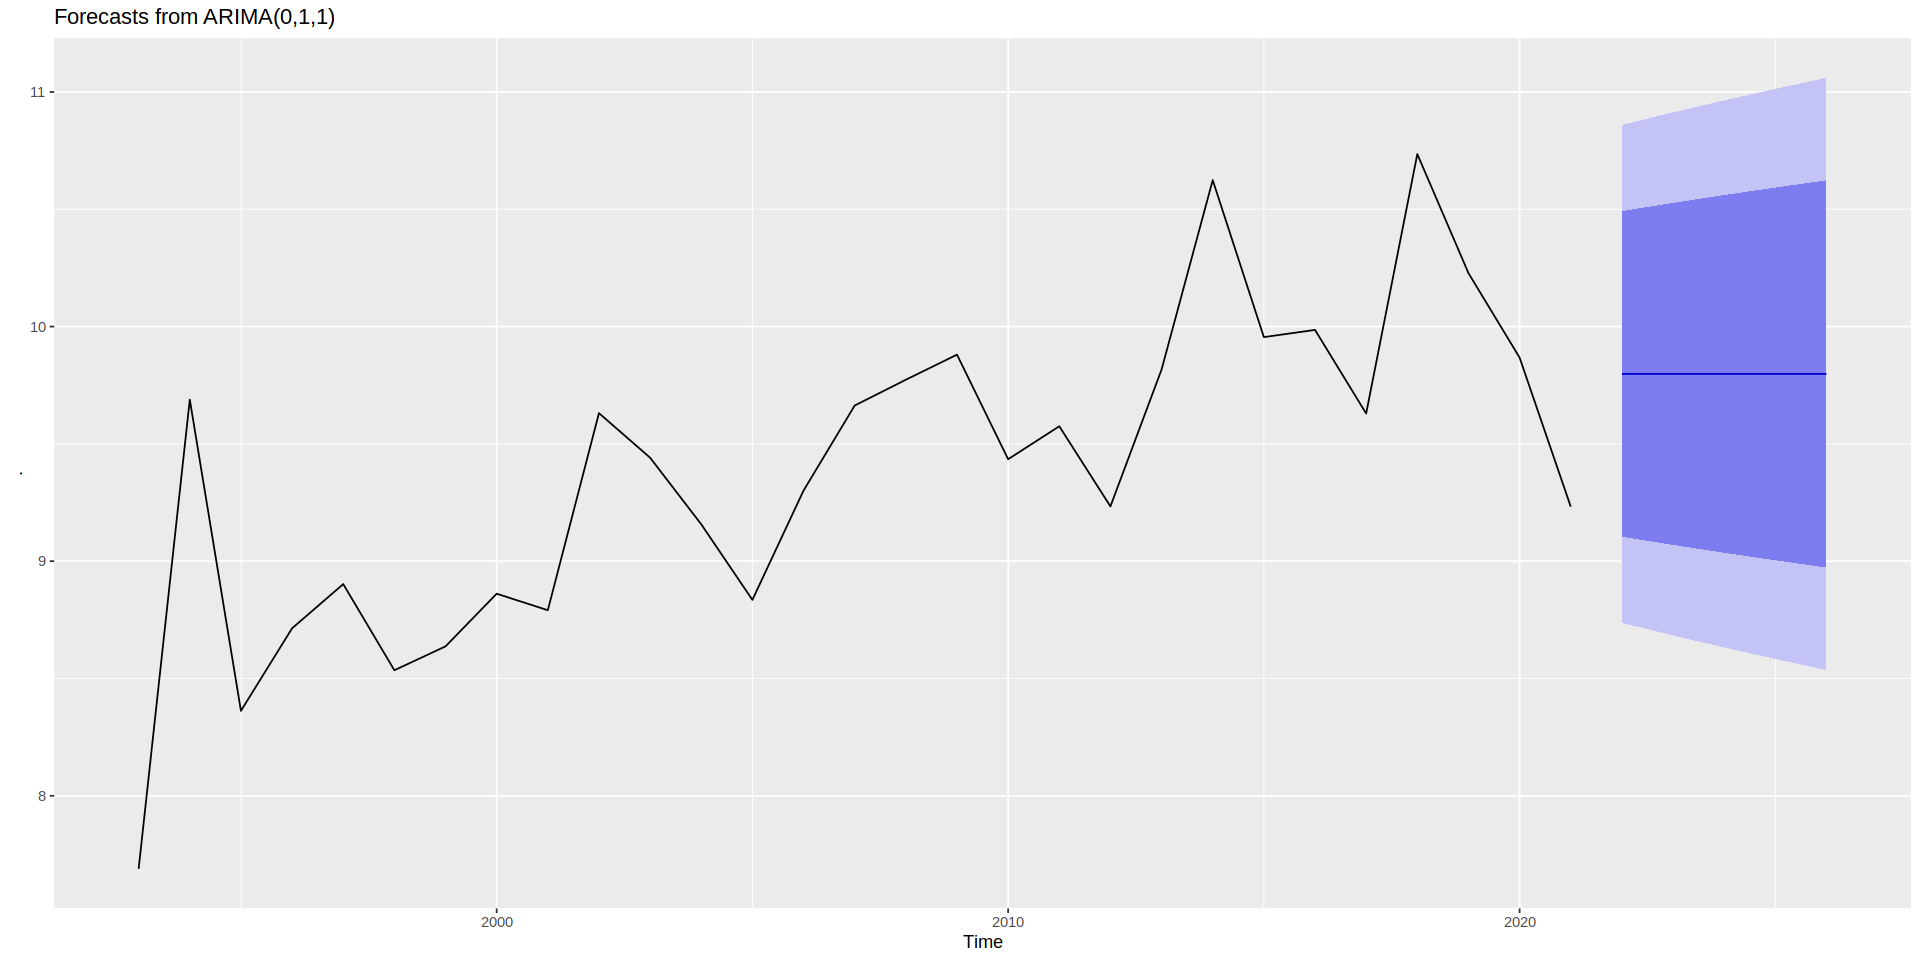

In [38]:
options(repr.plot.width = 16, repr.plot.height = 8)
  time_series %>%
  auto.arima() %>%
  forecast(h=5) %>%
  autoplot()


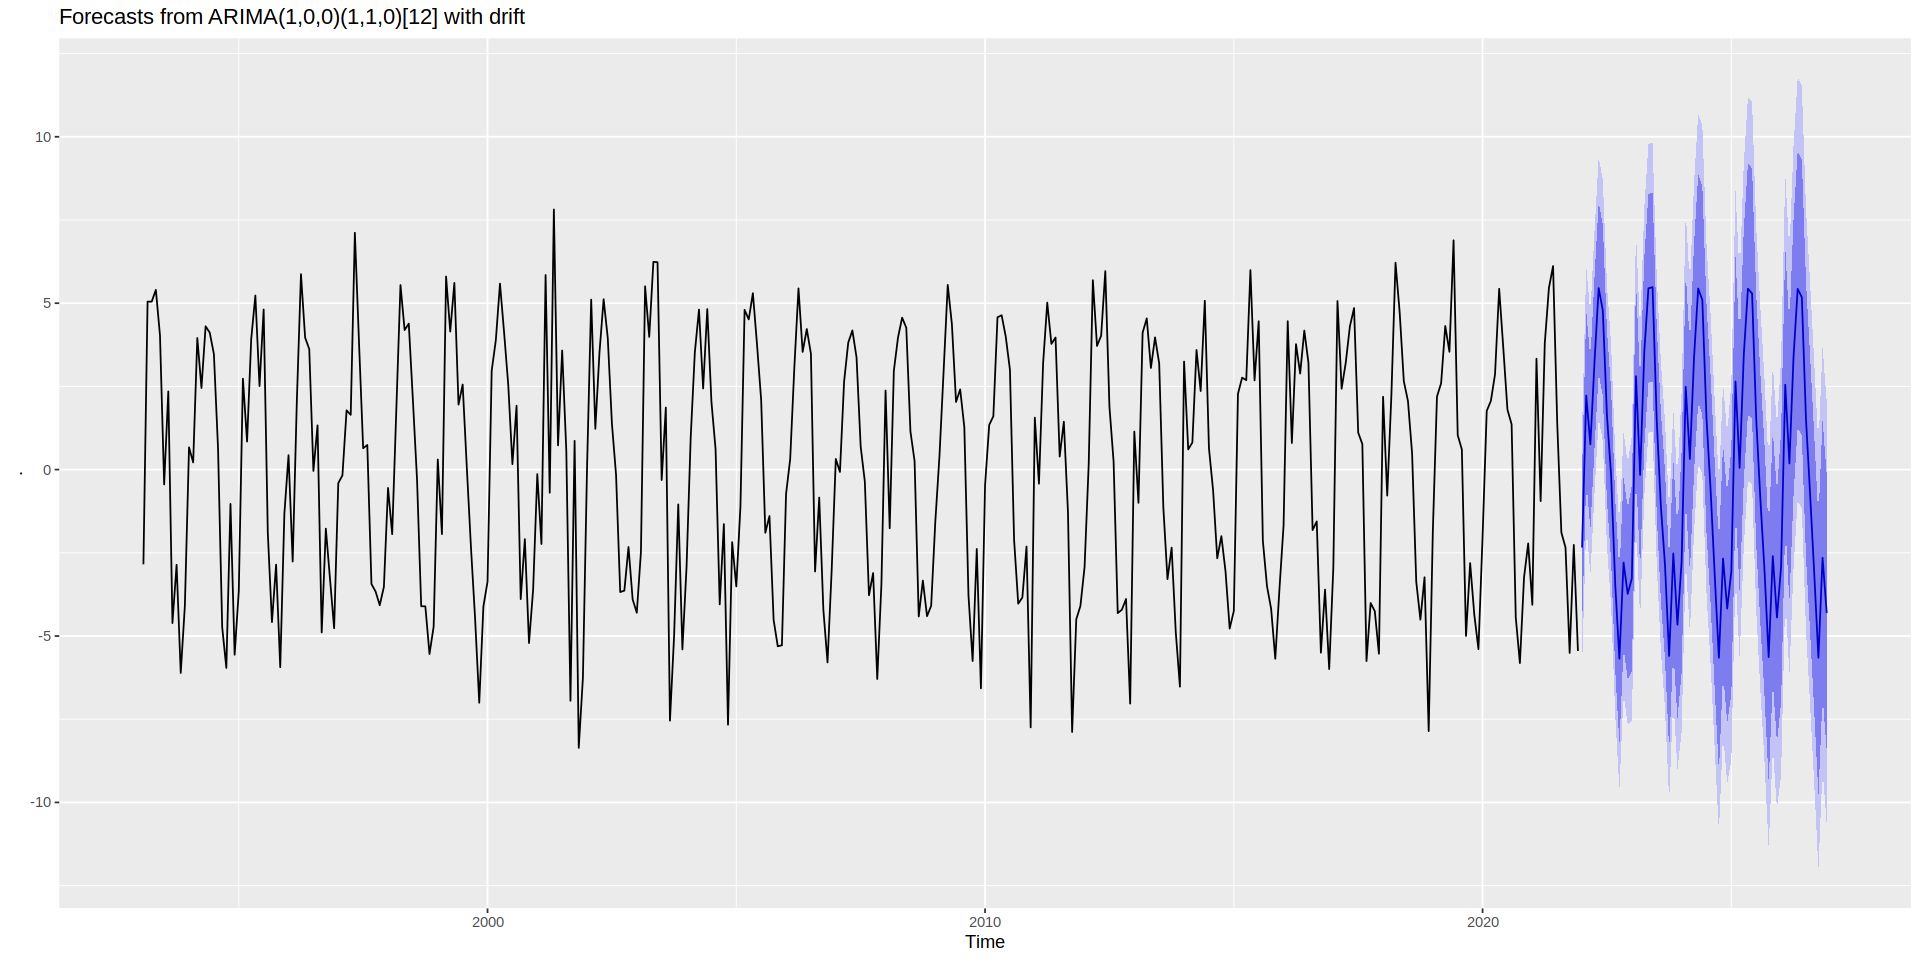

In [46]:
options(repr.plot.width = 16, repr.plot.height = 8)
  time_series %>%
  diff() %>%
  auto.arima() %>%
  forecast(h=5*12) %>%
  autoplot()